In [5]:
source(file = "R/merge-decision.R")

library(doMC)
registerDoMC(num.processes)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'doMC' was built under R version 3.4.3"Loading required package: iterators
Loading required package: parallel


In [6]:
# Loading data files
all <- load.data_new()

In [223]:
nrow(all)/4

[1] 229016.2

In [4]:
cases1 <- c(1000, 10000, floor(nrow(df)/4), floor(nrow(df)/2), nrow(df))
cases2 = c(1000, 10000,floor(nrow(df)/4), floor(nrow(df)/2), nrow(df))




In [11]:
cases1

[1]  1000 10000

In [15]:
## Function for running regressions
run.mergedecision.classifiers <- function(df, cases = c(1000, 10000, 50000),
                                          suffix = "")
{
  for (i in cases) {
    cvResult <- cross.validation(merge.decision.model,
                                 run.classifiers.mergedecision,
                                 prepare.data.mergedecision, df, i, 10)

   printf("Outputing Restuls")

    write.csv(cvResult, file = sprintf("merge-decision-2-cv-%d%s.csv", i, suffix))
    cross.validation.plot(cvResult,
                          sprintf("Merge decision task cross validation (%d items)", i),
                          sprintf("merge-decision-2-cv-%d%s.pdf", i, suffix))
  }
}



# Running regression


[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.847778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1140749
                    % Var explained: 11.6
                           %IncMSE IncNodePurity
team_size                 3.461785      8.698113
num_commits               6.370825      4.099911
files_changed             4.613694      4.056092
perc_external_contribs    4.643135     11.040370
sloc                      3.406685     11.559513
src_churn                 7.351359      8.490074
test_churn                2.036056      3.322346
num_comments              9.218633      5.634638
commits_on_files_touched  2.260279      7.448072
test_lines_per_kloc       5.327837     11.011369
prev_pullreqs            17.014383      7.829299
requester_succ_rate      33.033200     14.589259
main_team_member          5.231016      3.422498
conflict         

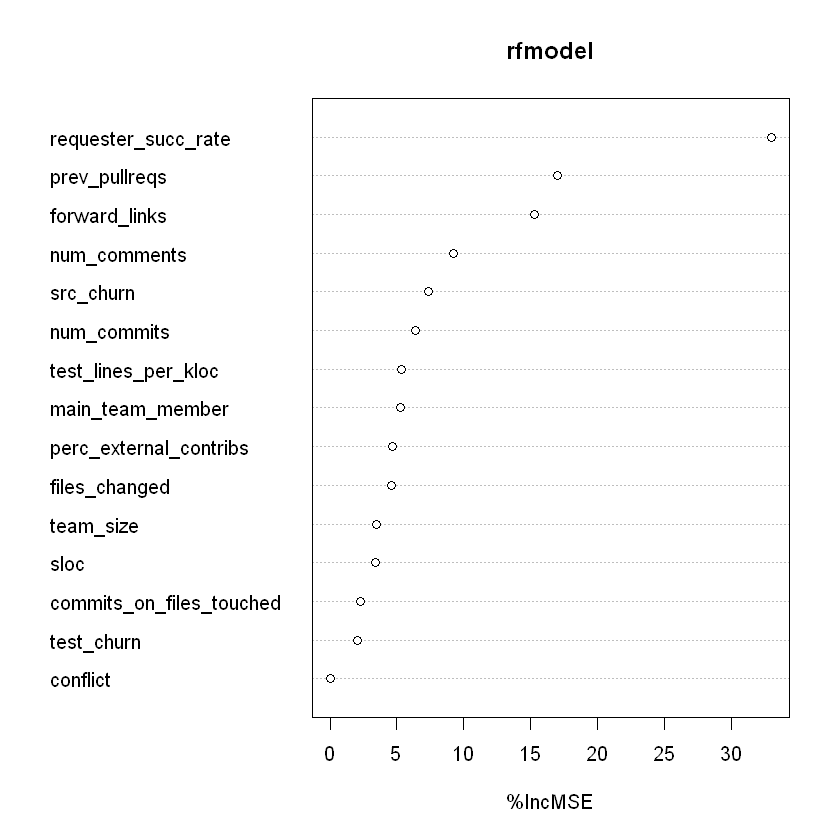

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.818182, ACC 0.610000, PREC 1.000000, REC 0.561798"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.843333"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

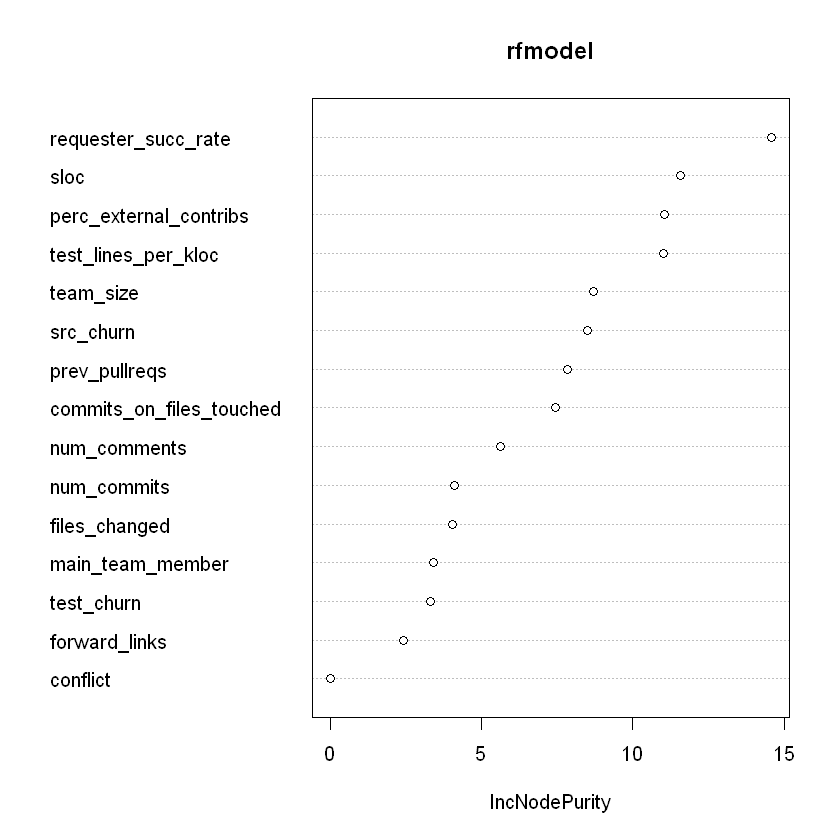


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1257807
                    % Var explained: 4.8
                            %IncMSE IncNodePurity
team_size                 0.2796533      8.672713
num_commits              10.7002613      4.565643
files_changed             2.1963083      4.368790
perc_external_contribs    9.9415576     12.942771
sloc                      2.2021458     11.952148
src_churn                 6.3651505      7.800148
test_churn                2.6609989      4.245935
num_comments             10.8808655      6.753326
commits_on_files_touched  5.6139495      8.330475
test_lines_per_kloc       4.8004714     12.054401
prev_pullreqs            14.8745505      8.220855
requester_succ_rate      34.1512432     11.017802
main_team_member         -1.2608360      2.363850
conf

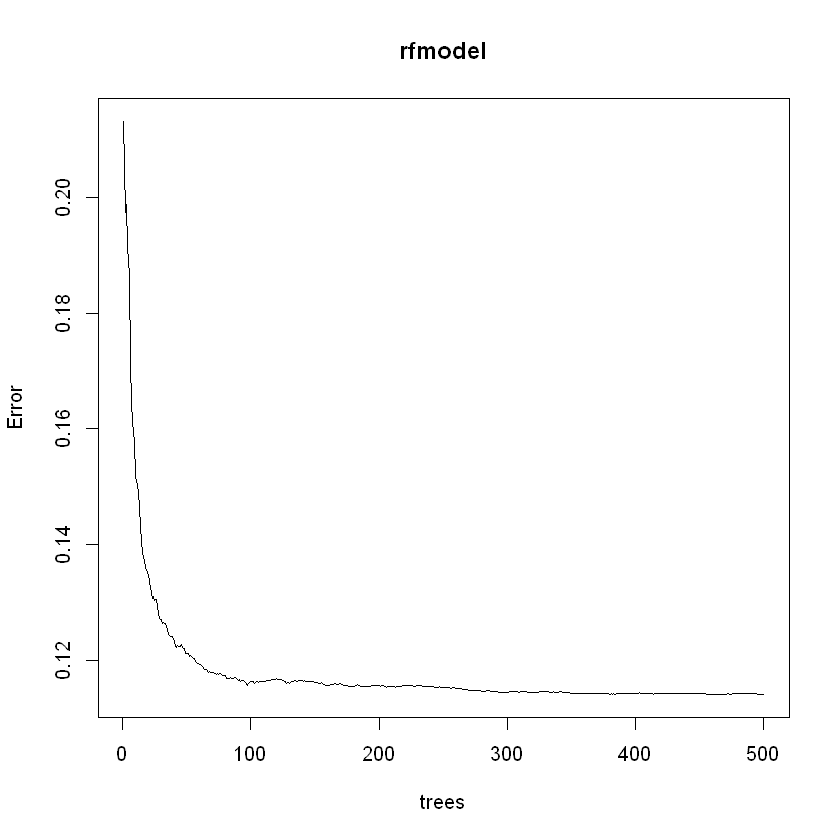

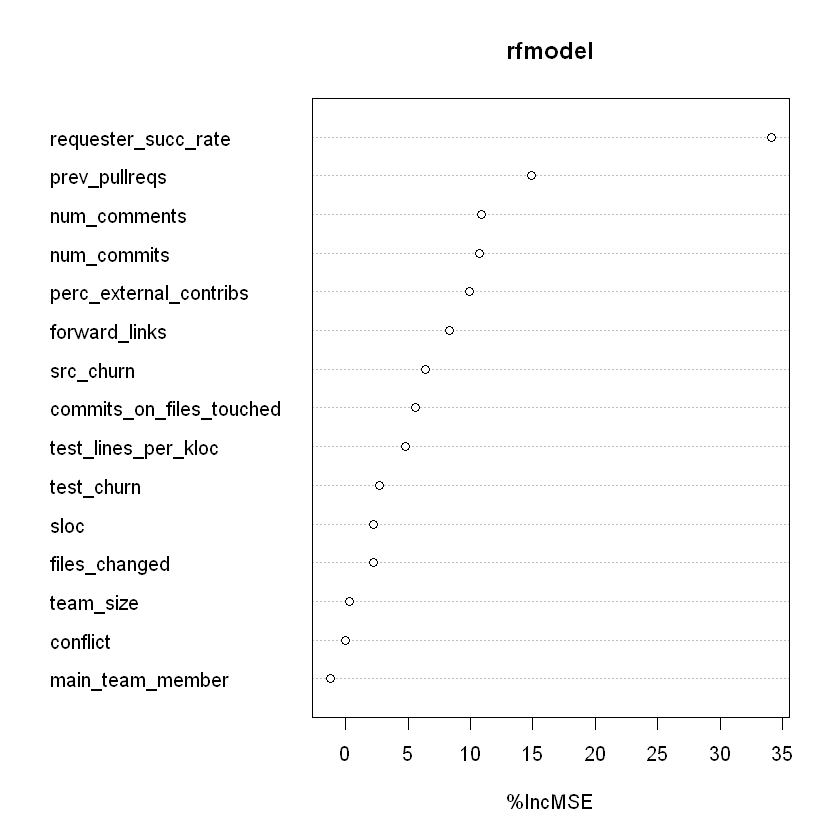

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.766832, ACC 0.630000, PREC 0.943651, REC 0.578313"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.854444"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

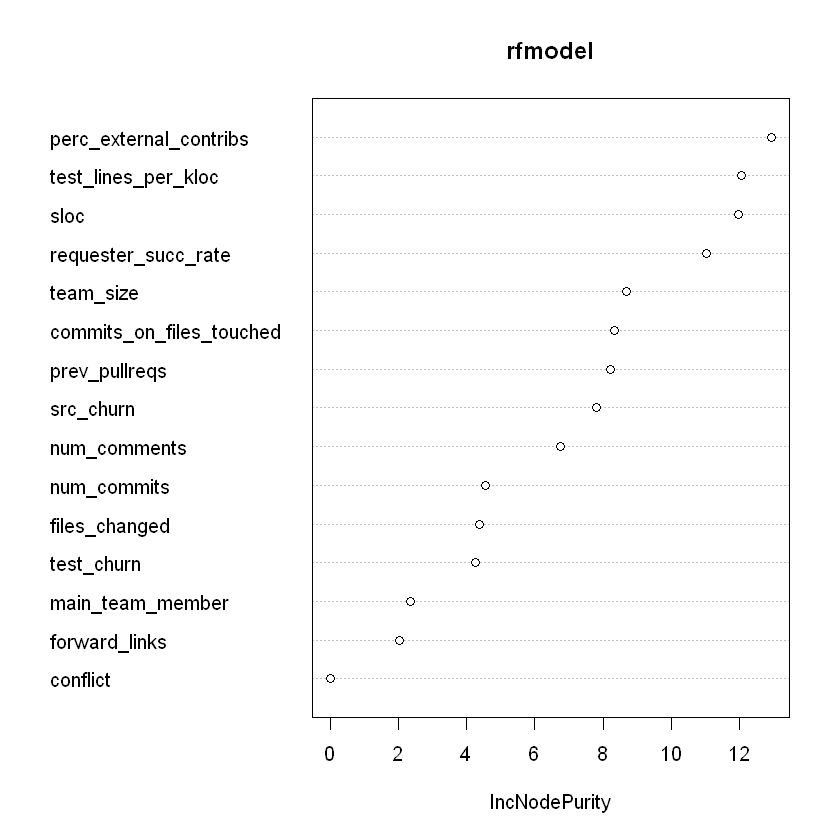


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1137144
                    % Var explained: 8.57
                           %IncMSE IncNodePurity
team_size                 2.268968      7.695347
num_commits               9.401917      3.420157
files_changed             5.221865      4.435097
perc_external_contribs    6.664792     13.065773
sloc                      5.611277     12.043530
src_churn                 8.029020      7.202039
test_churn                5.964206      3.786637
num_comments              6.346765      5.542284
commits_on_files_touched  2.628323      7.038863
test_lines_per_kloc       4.732112      9.506246
prev_pullreqs            26.093234      9.007596
requester_succ_rate      35.679374     12.717153
main_team_member          3.618897      1.605160
conflict         

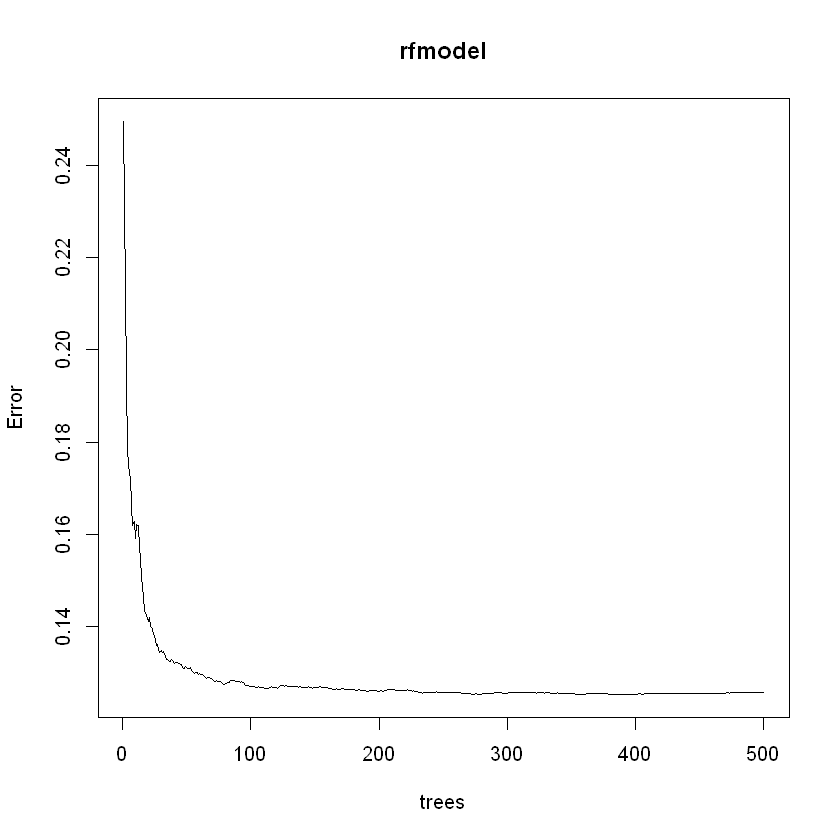

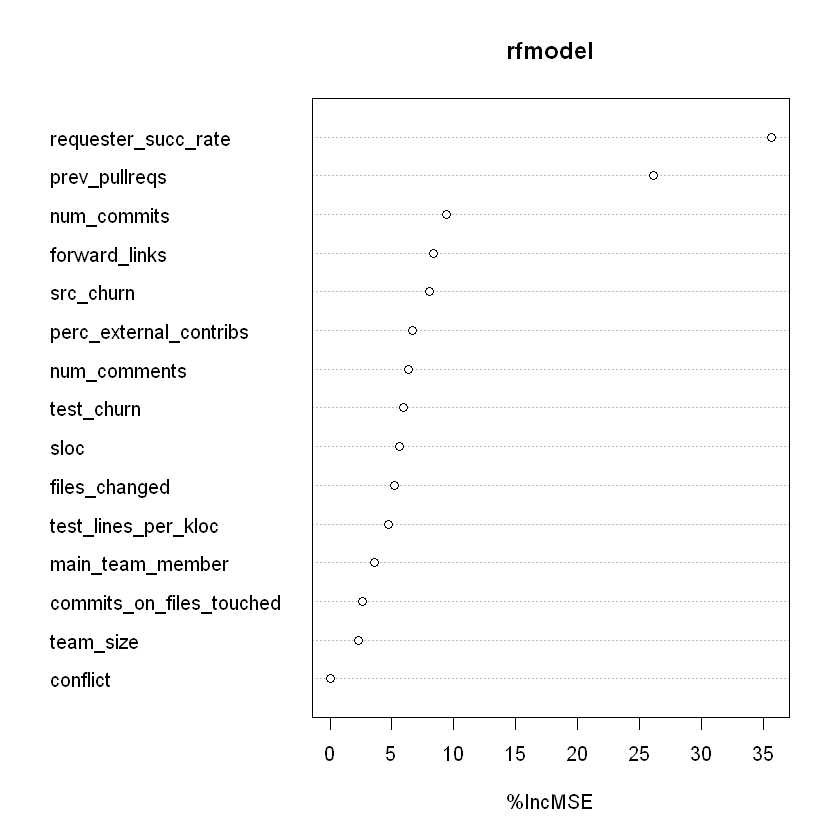

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.784884, ACC 0.590000, PREC 0.951389, REC 0.558140"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.840000"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

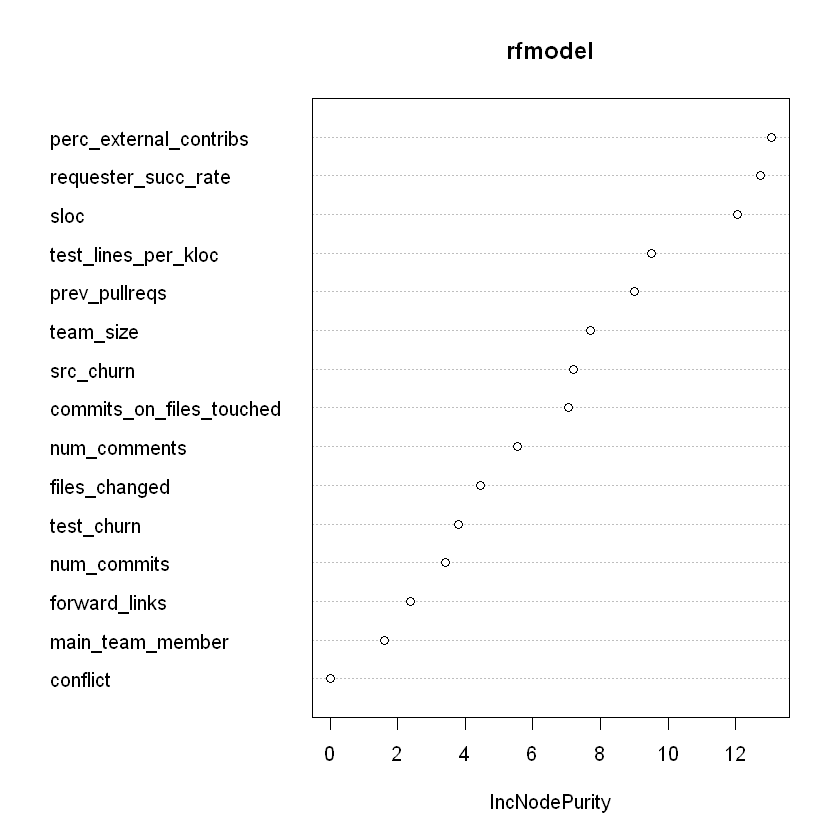


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1238096
                    % Var explained: 7.88
                            %IncMSE IncNodePurity
team_size                 5.6309212      9.352835
num_commits               6.3884339      4.495531
files_changed             8.4048512      5.199620
perc_external_contribs   12.5251141     13.064623
sloc                      6.0301386     11.834005
src_churn                15.0837447     10.319907
test_churn                6.7767084      3.908088
num_comments              7.2075107      5.320512
commits_on_files_touched  0.0722486      8.334609
test_lines_per_kloc       2.1513118     10.273991
prev_pullreqs            15.9418563      7.221288
requester_succ_rate      27.4921520     13.340297
main_team_member         11.3996515      3.203619
con

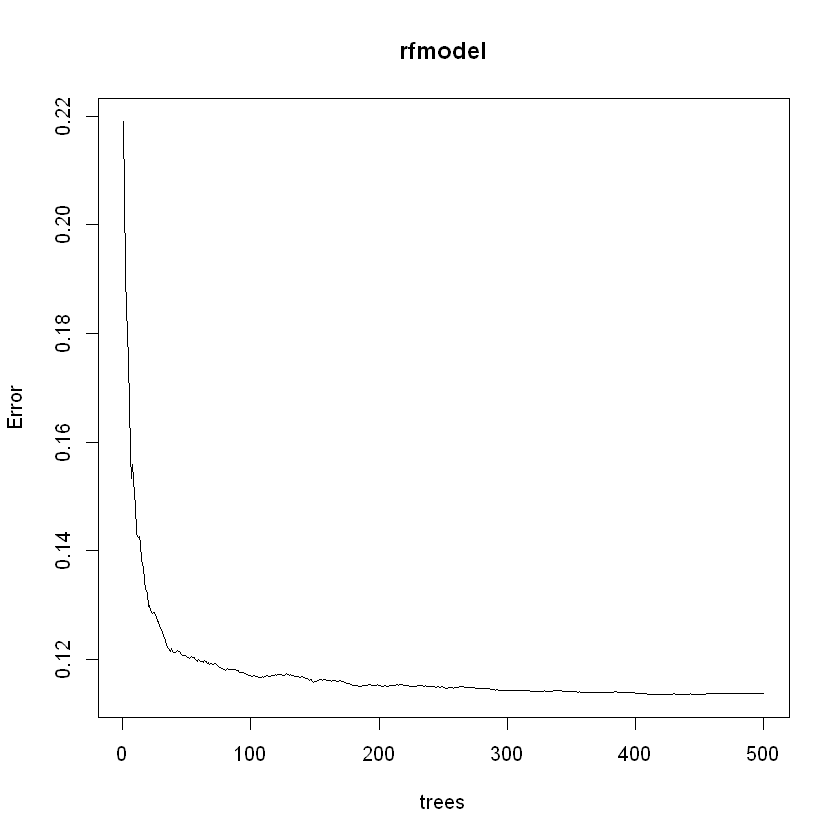

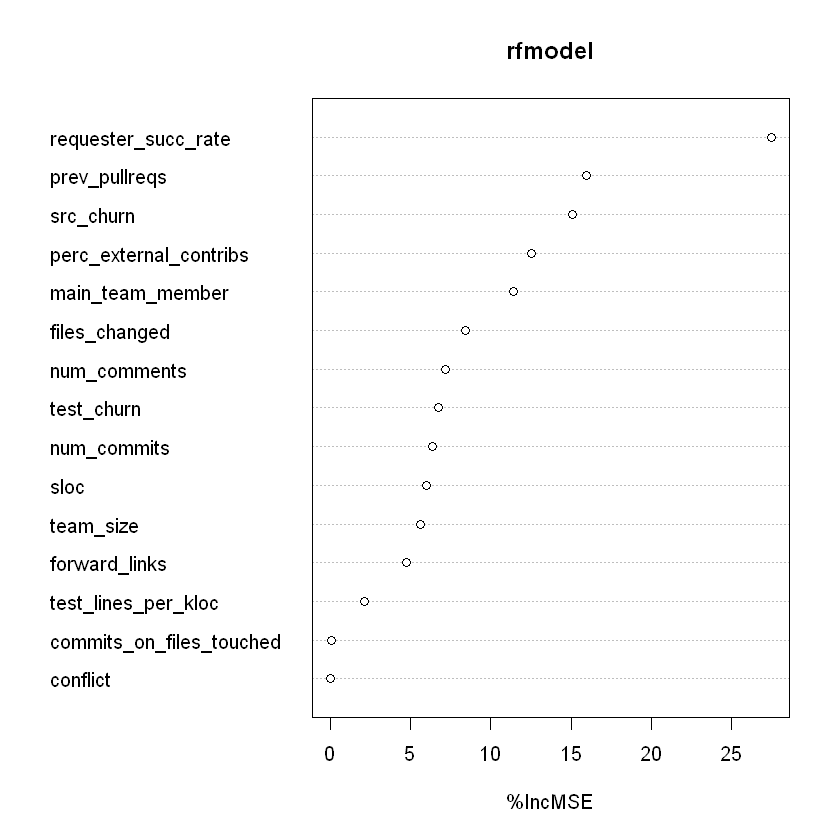

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.672114, ACC 0.540000, PREC 0.931028, REC 0.528090"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.843333"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

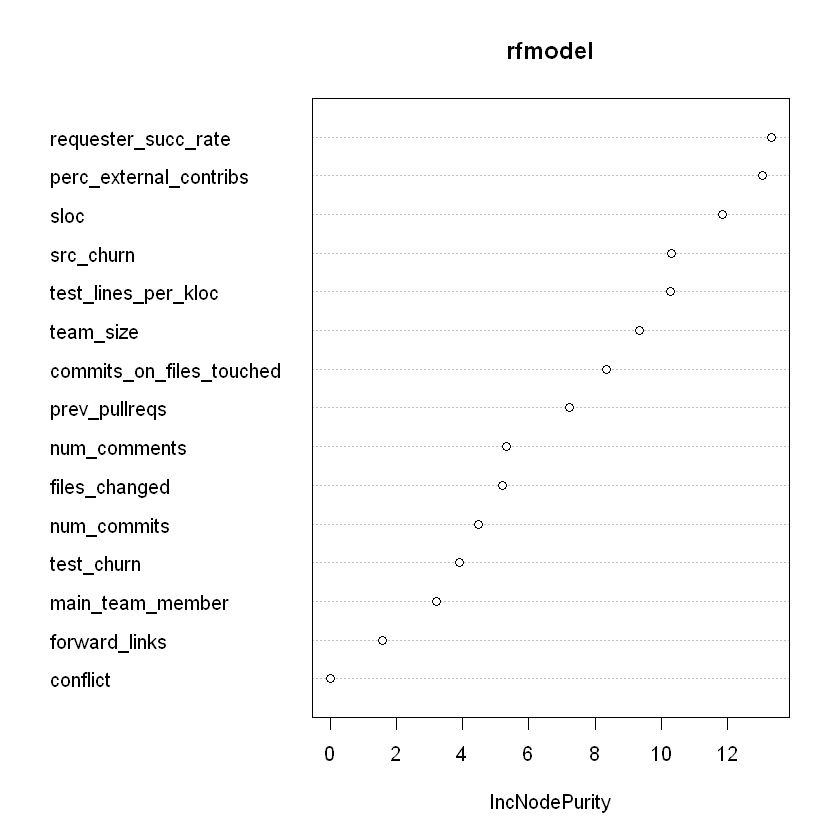


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1196197
                    % Var explained: 9.46
                            %IncMSE IncNodePurity
team_size                -0.8670086      8.119967
num_commits               3.3619300      3.425059
files_changed            10.0911409      5.468455
perc_external_contribs    5.6181408     11.448618
sloc                      4.1531051     12.302550
src_churn                 8.9407185      8.460376
test_churn                3.8613436      3.627889
num_comments             12.3591417      6.042004
commits_on_files_touched -2.6043746      7.462791
test_lines_per_kloc       4.2600575     10.897680
prev_pullreqs            10.5049879      6.592020
requester_succ_rate      24.6710870     13.088947
main_team_member         11.1496014      4.926688
con

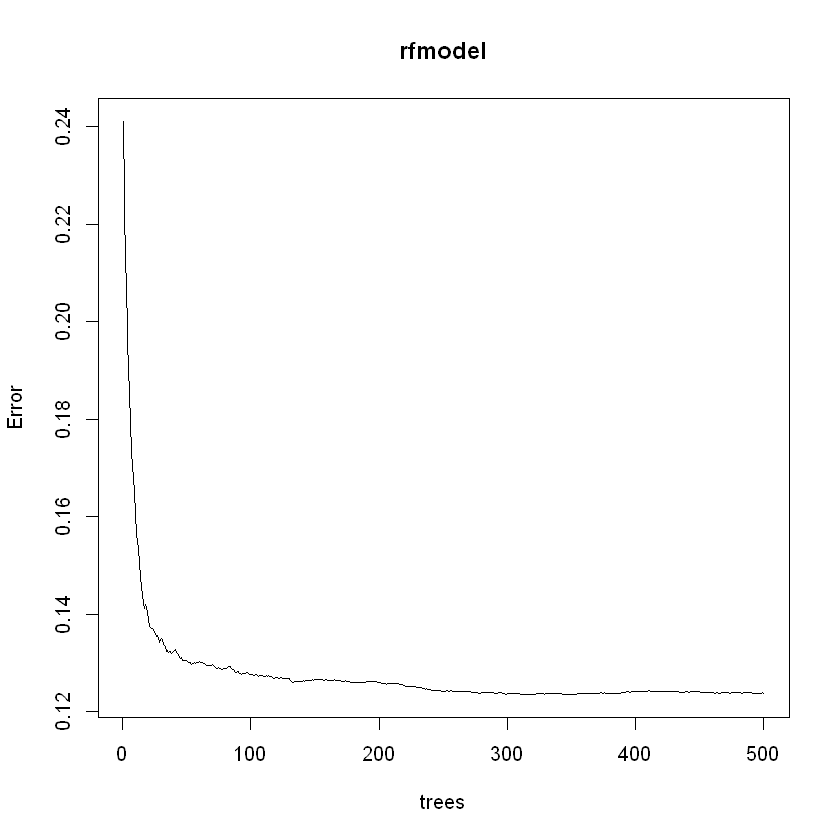

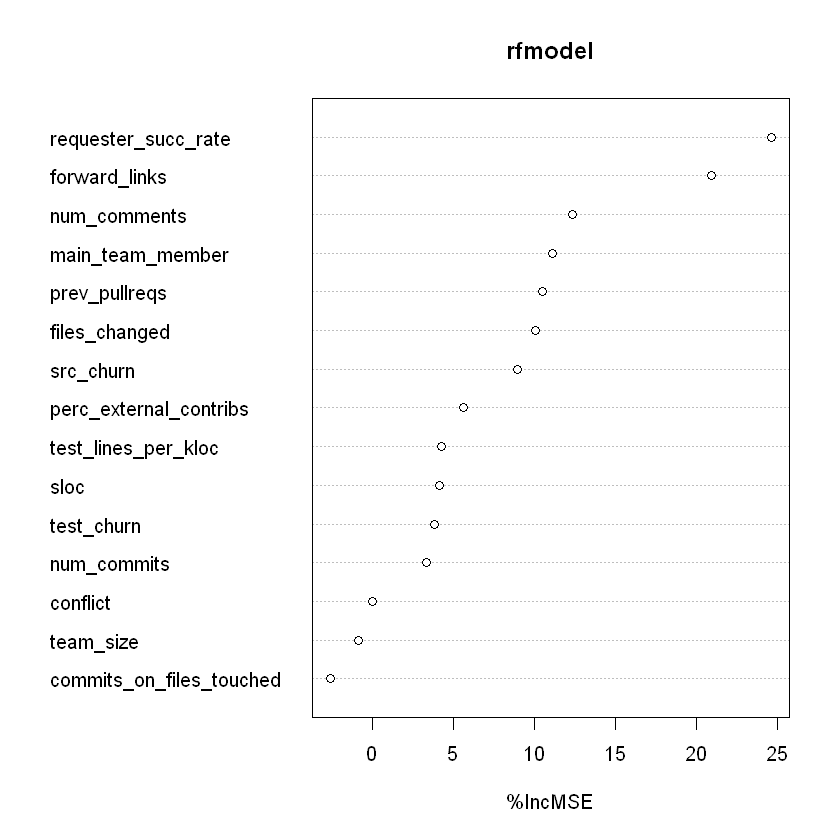

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.711373, ACC 0.590000, PREC 0.932351, REC 0.552941"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.847778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

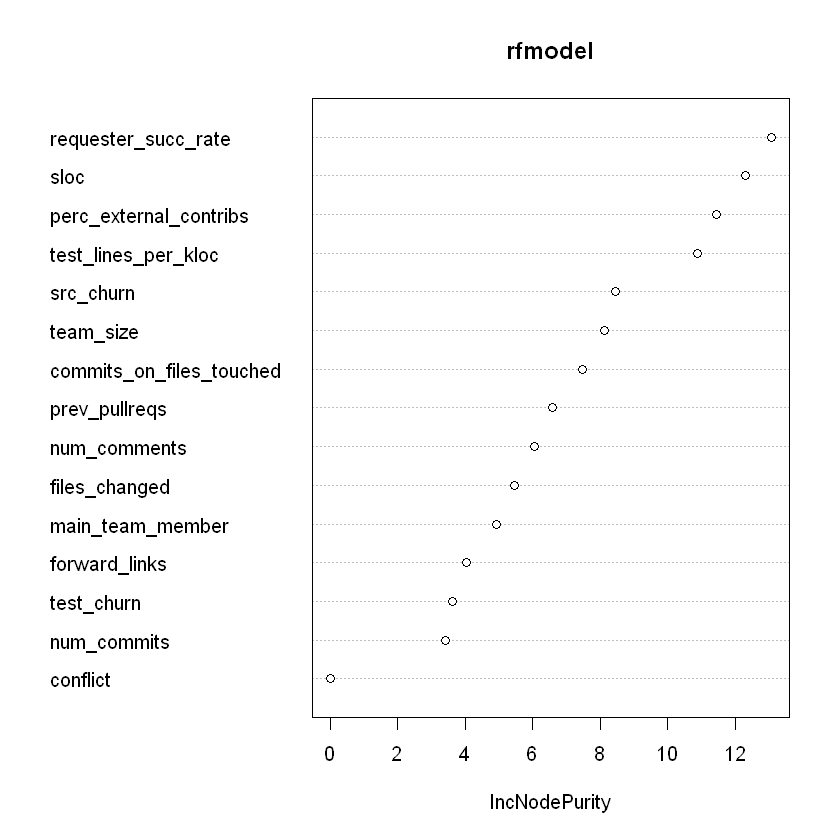


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1120276
                    % Var explained: 13.19
                           %IncMSE IncNodePurity
team_size                 8.158999      8.544748
num_commits               4.362887      4.131217
files_changed             7.118390      6.429871
perc_external_contribs    2.389803     10.532473
sloc                     11.851960     14.008949
src_churn                12.401390      9.284573
test_churn                4.963160      3.039614
num_comments              3.894947      4.871979
commits_on_files_touched  6.703521      6.837498
test_lines_per_kloc       7.392463     10.928440
prev_pullreqs            21.043878      7.147647
requester_succ_rate      23.168435     10.476306
main_team_member          7.894235      4.501274
conflict        

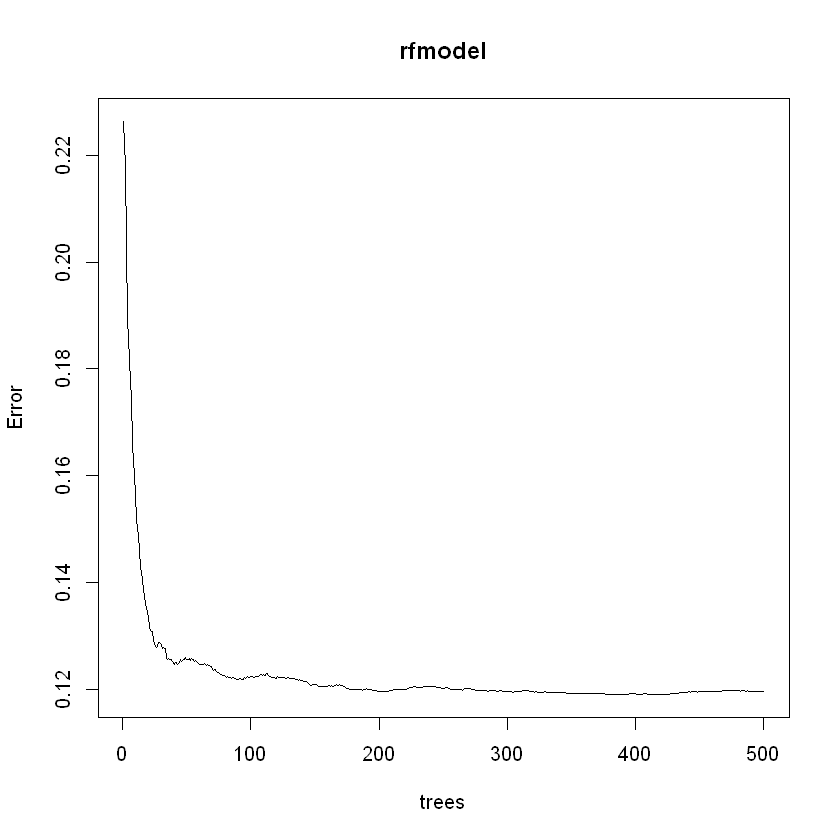

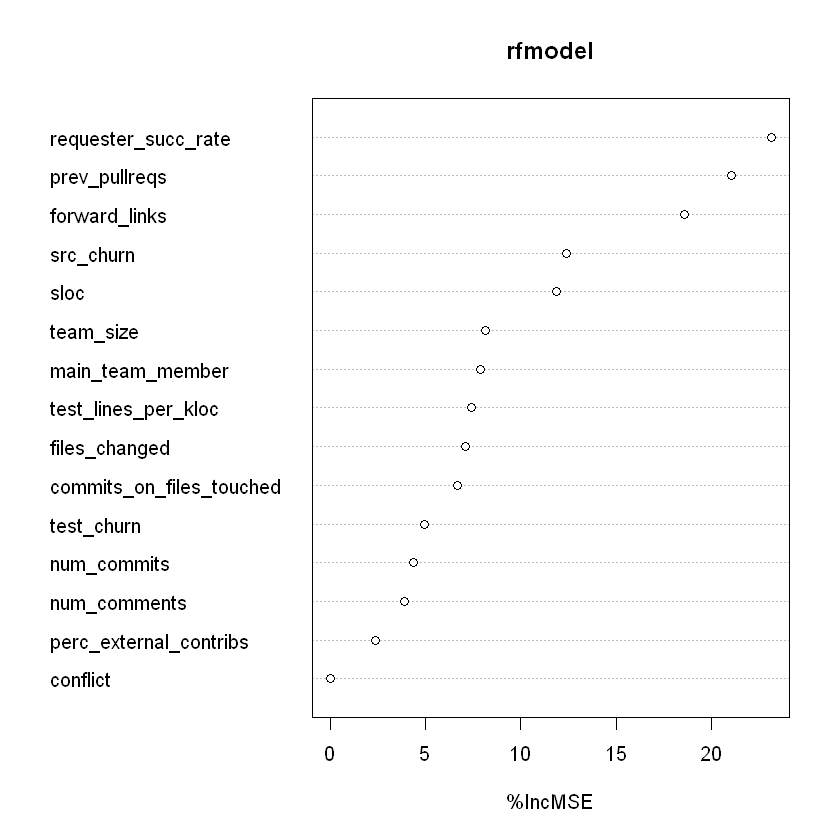

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.702500, ACC 0.600000, PREC 0.890097, REC 0.562500"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.860000"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

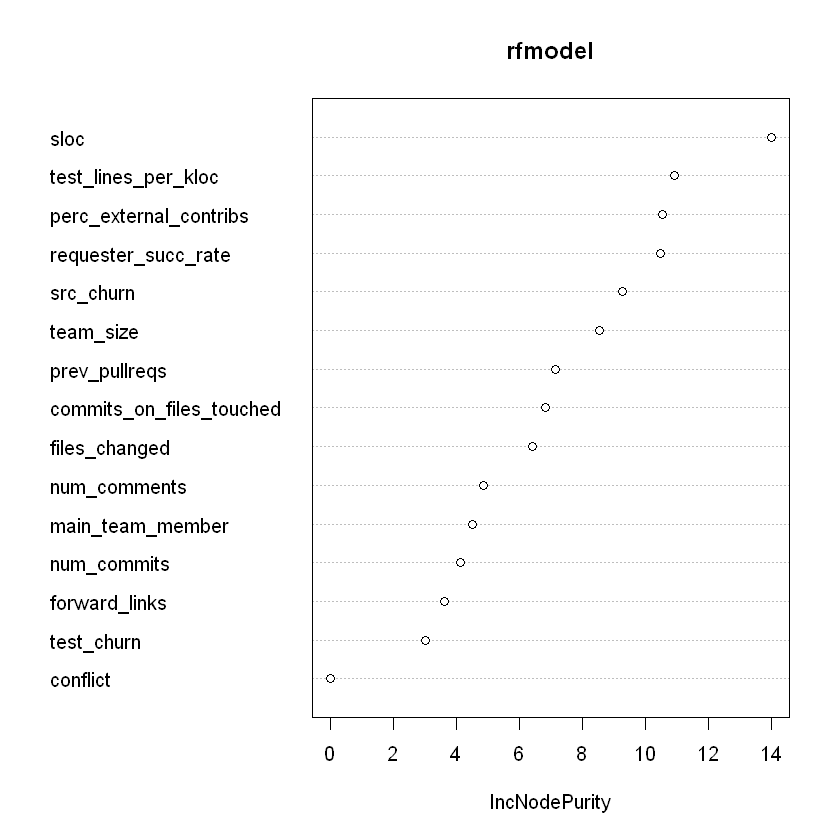


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1093988
                    % Var explained: 9.14
                            %IncMSE IncNodePurity
team_size                10.6501592      9.607956
num_commits               6.5242421      3.831045
files_changed             8.4569483      5.993766
perc_external_contribs    4.7225646      9.809494
sloc                      5.8342205     11.474406
src_churn                 4.6195739      6.618539
test_churn                0.1803141      3.045484
num_comments              1.3820560      5.342715
commits_on_files_touched  1.9726829      6.070877
test_lines_per_kloc       2.5505789     10.085191
prev_pullreqs            24.1187415      7.125425
requester_succ_rate      35.8297536     13.795286
main_team_member          8.4647983      3.315105
con

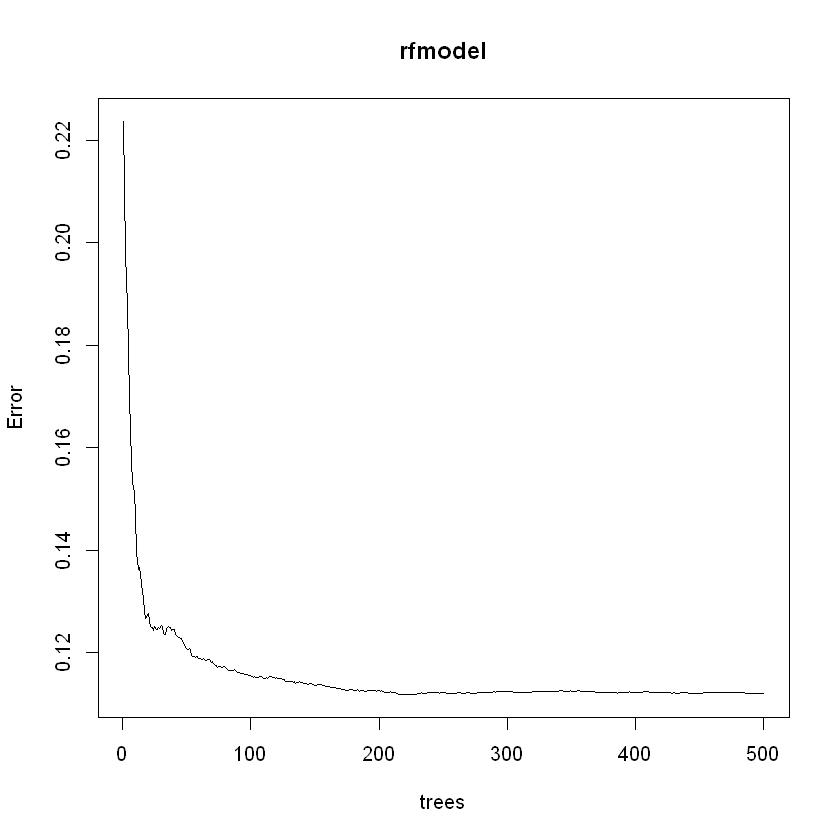

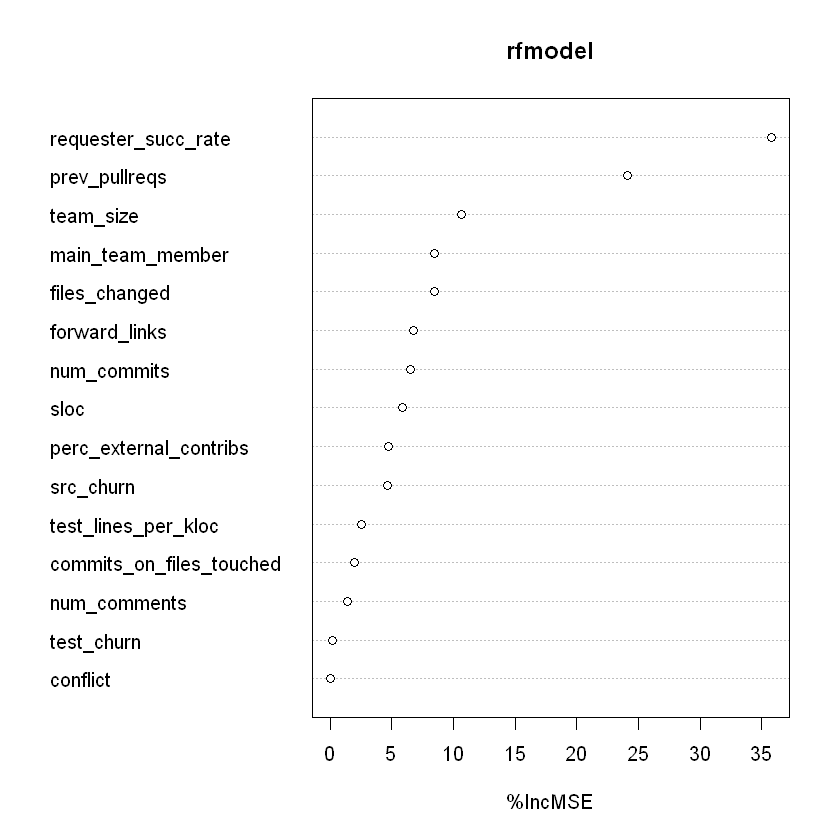

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.709077, ACC 0.605000, PREC 0.930233, REC 0.565476"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.843333"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

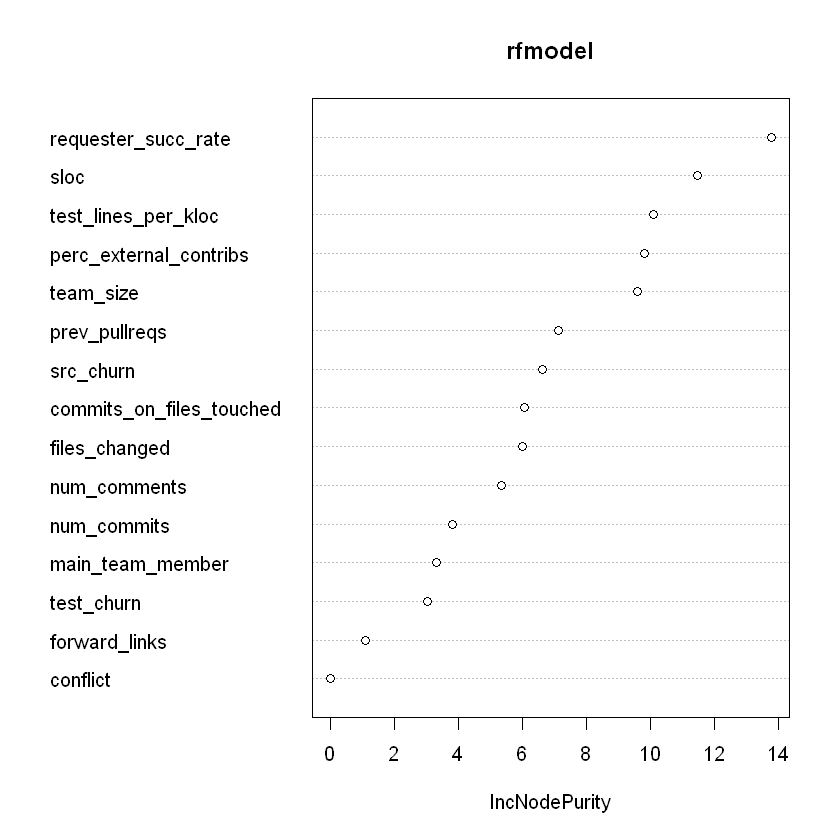


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1263646
                    % Var explained: 4.36
                            %IncMSE IncNodePurity
team_size                 1.1221675      9.367408
num_commits               3.0538517      3.754479
files_changed             5.2232306      5.682656
perc_external_contribs    3.8090298     13.423543
sloc                      4.2656986     11.484565
src_churn                 4.3985825      8.035198
test_churn                5.6874849      4.242023
num_comments              5.3871253      5.455537
commits_on_files_touched  2.9838638      8.068973
test_lines_per_kloc       0.6087774      9.628624
prev_pullreqs            21.8517058      8.306227
requester_succ_rate      37.0971171     13.262581
main_team_member          6.6945052      2.563256
con

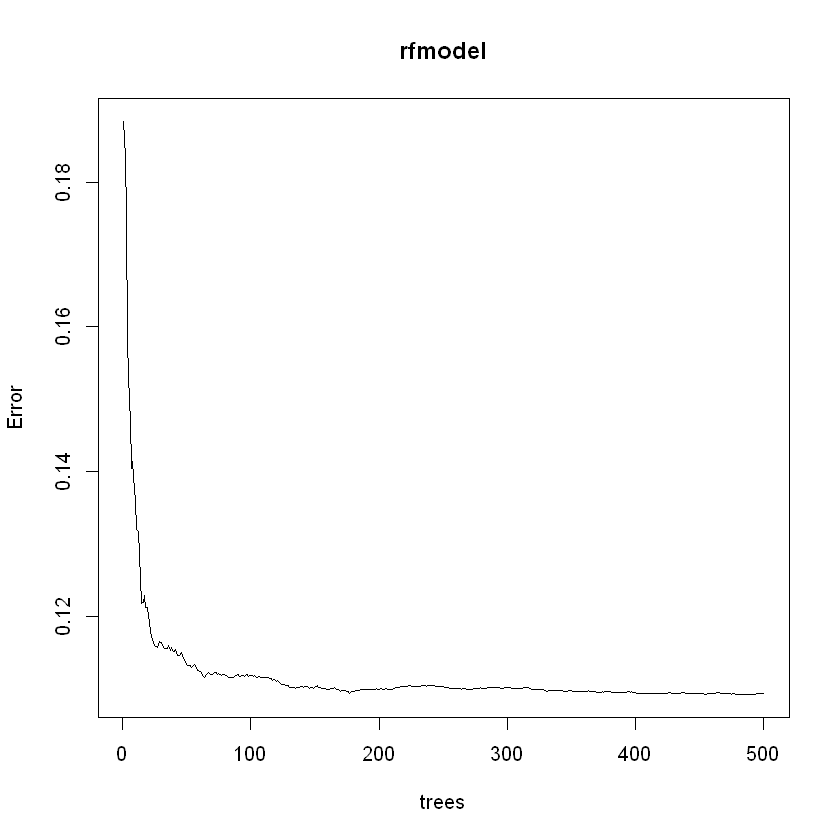

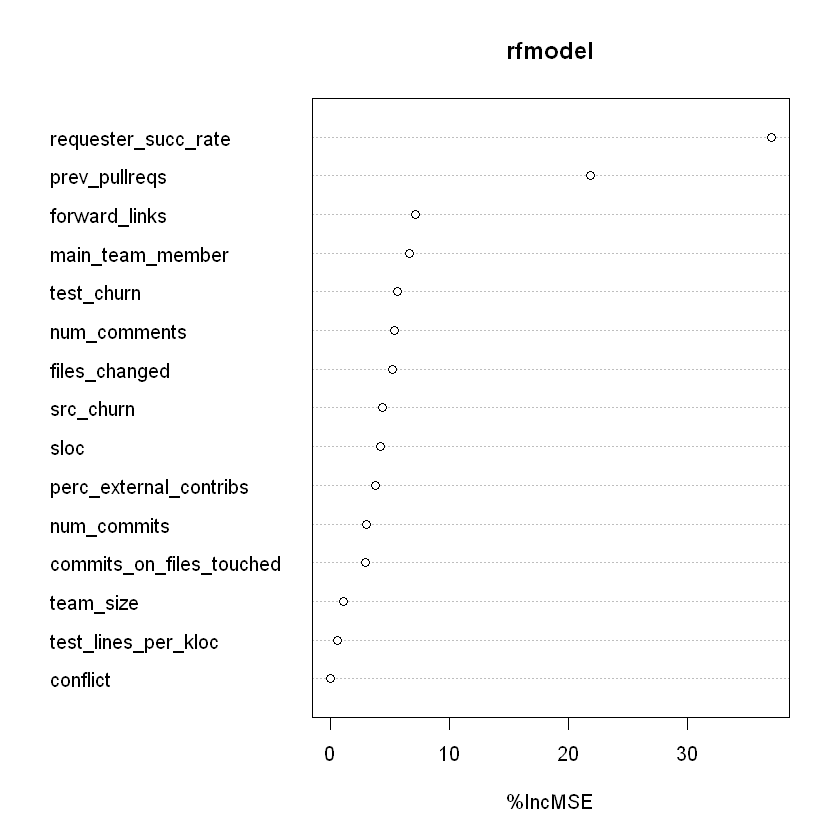

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.767843, ACC 0.600000, PREC 0.948427, REC 0.564706"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.845556"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

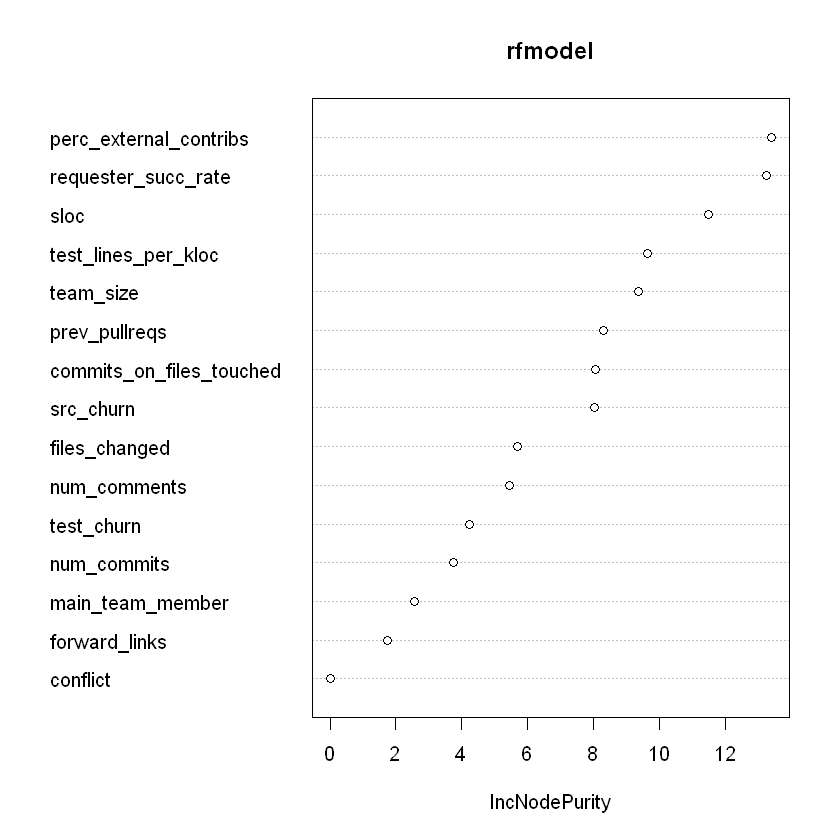


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1181041
                    % Var explained: 9.56
                            %IncMSE IncNodePurity
team_size                 4.1282744      8.607427
num_commits               7.9953550      4.561469
files_changed             8.8747708      5.422288
perc_external_contribs    8.6752485     12.438270
sloc                      4.0601573     11.908482
src_churn                12.2387856     10.491848
test_churn                0.4974099      2.937229
num_comments              6.2762196      5.387181
commits_on_files_touched  2.3646902      7.187754
test_lines_per_kloc       0.5040010      9.407290
prev_pullreqs            26.3877894      7.937394
requester_succ_rate      29.1341593     11.097305
main_team_member         10.2680511      3.920102
con

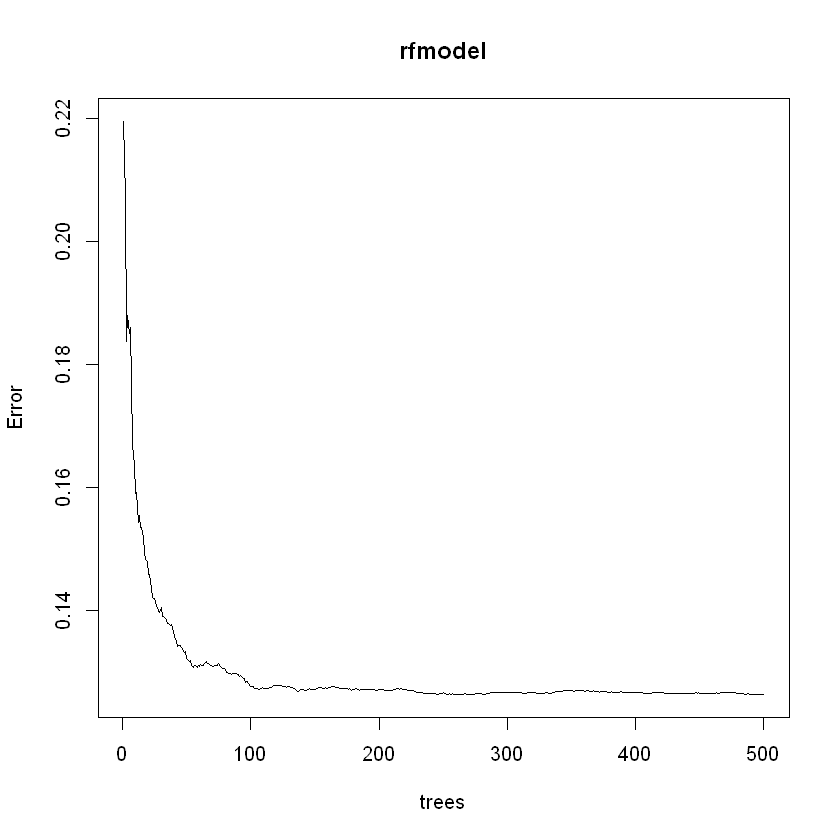

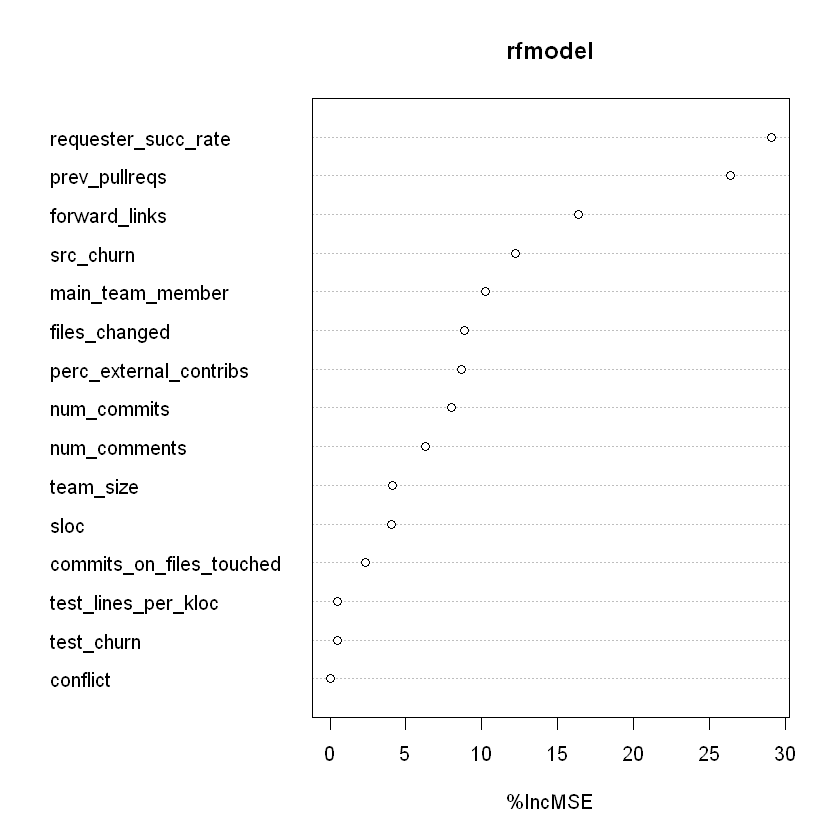

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.750532, ACC 0.590000, PREC 0.915374, REC 0.554217"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.855556"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

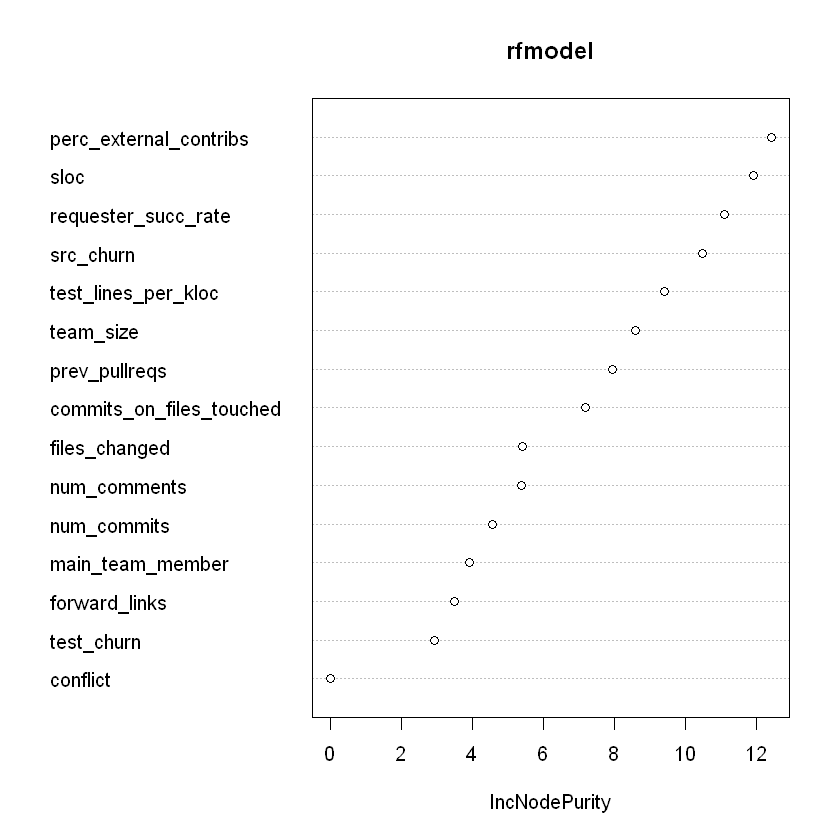


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1038431
                    % Var explained: 15.97
                           %IncMSE IncNodePurity
team_size                 2.180409      7.725789
num_commits               7.272308      3.852452
files_changed             6.799448      4.454950
perc_external_contribs    5.556395     11.063043
sloc                      6.642291     11.532764
src_churn                 7.281349      7.776835
test_churn                6.831311      4.691408
num_comments              4.027462      4.328831
commits_on_files_touched  3.274626      6.815243
test_lines_per_kloc       4.080507      9.368453
prev_pullreqs            18.682832      7.624016
requester_succ_rate      32.675435     12.568765
main_team_member         13.997550      4.189057
conflict        

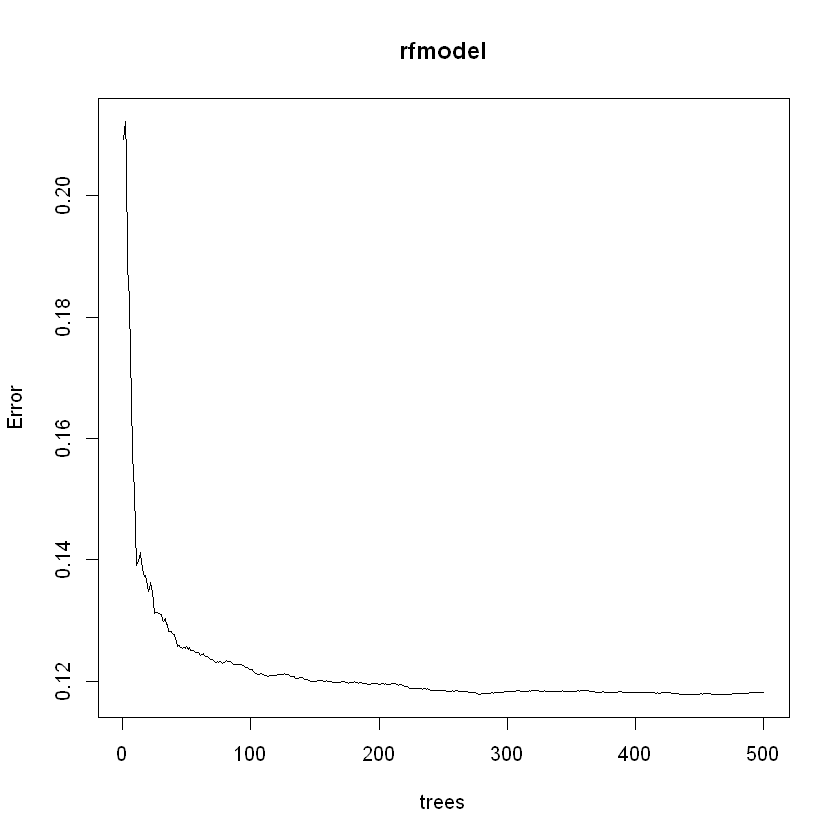

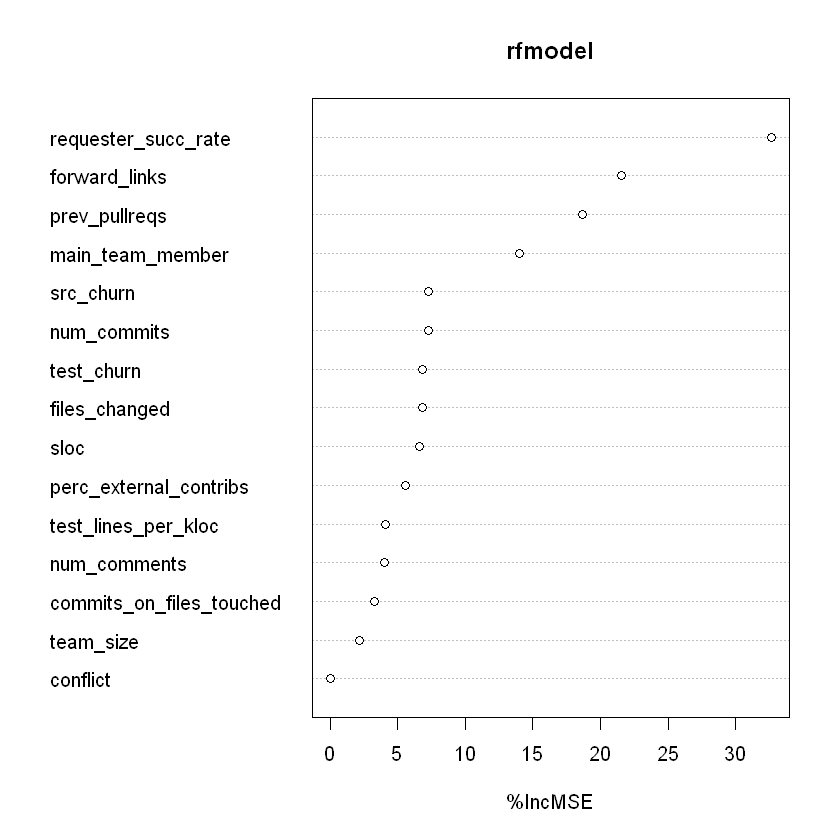

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.820652, ACC 0.565000, PREC 0.974359, REC 0.538043"
[1] "Finished Loop, converting restuls"
[1] "return restuls"
[1] "Outputing Restuls"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.854667"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

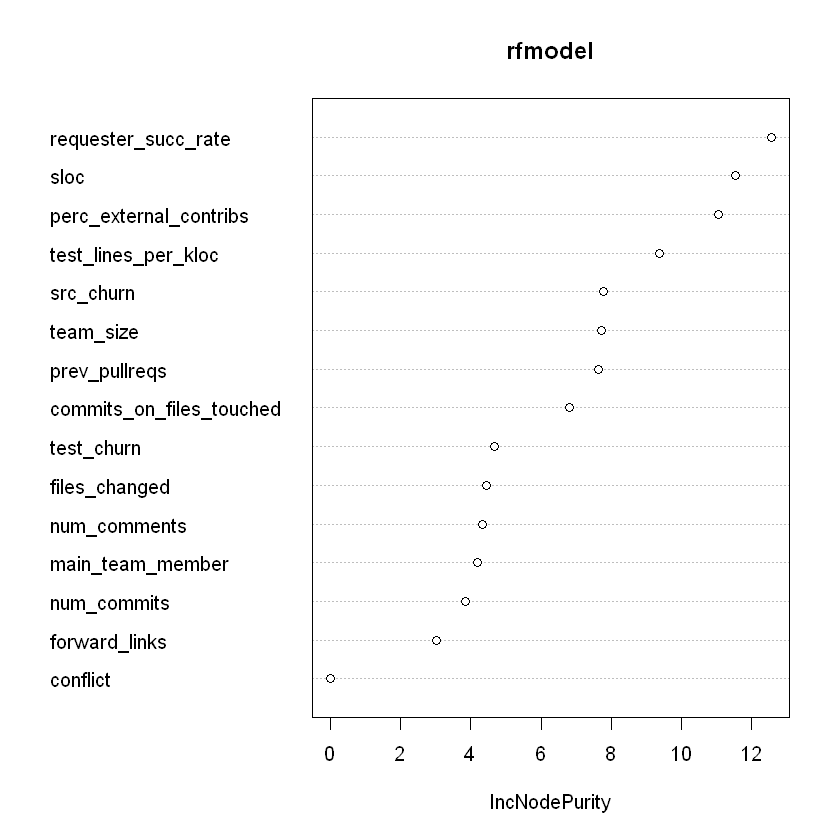


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1068323
                    % Var explained: 13.99
                           %IncMSE IncNodePurity
team_size                27.019459      89.00349
num_commits              33.432199      40.13376
files_changed            26.584005      48.82107
perc_external_contribs   20.206225     113.45920
sloc                     25.867173     117.47479
src_churn                34.755624      84.21162
test_churn               23.779607      37.28779
num_comments             28.727154      53.54313
commits_on_files_touched 13.862239      74.79237
test_lines_per_kloc      20.482368     103.51352
prev_pullreqs            57.810702      67.63583
requester_succ_rate      72.899824     123.61549
main_team_member          7.996033      29.18536
conflict        

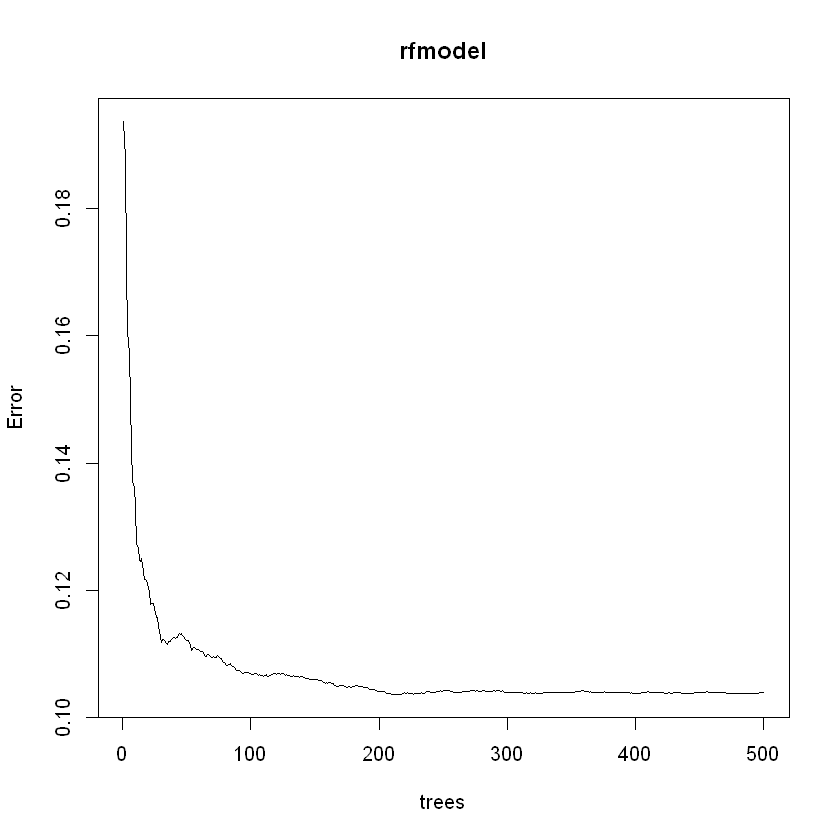

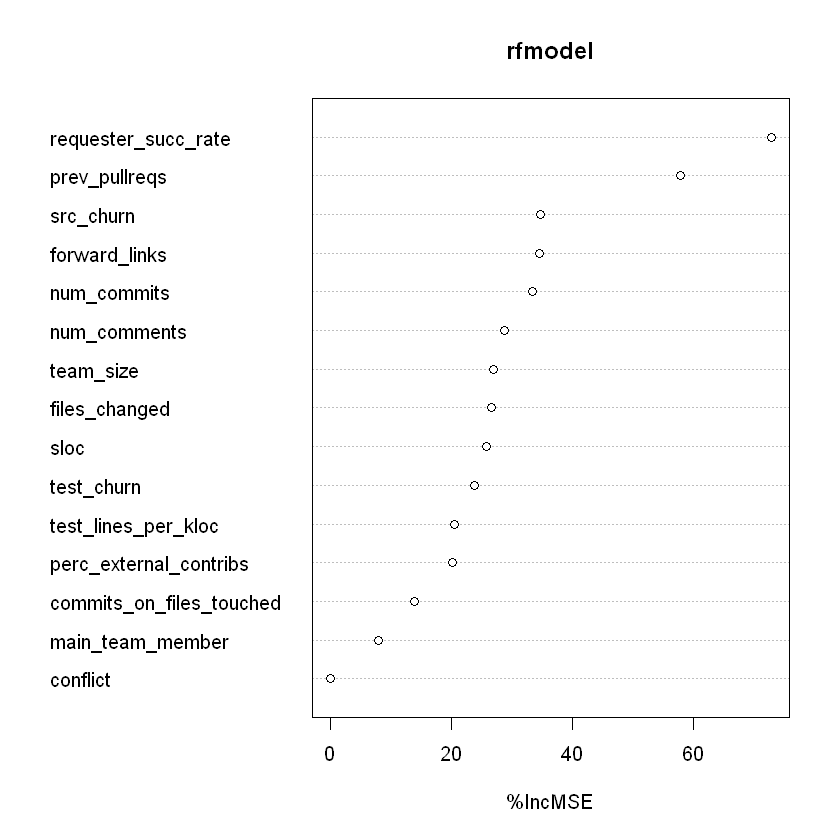

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.730786, ACC 0.585000, PREC 0.914914, REC 0.555689"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.836889"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

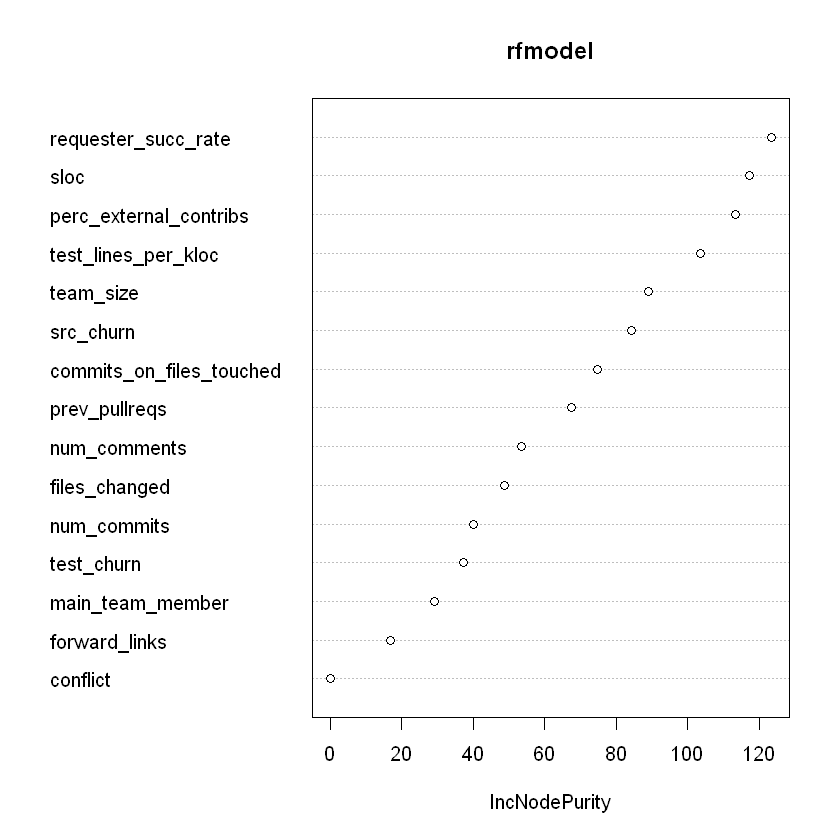


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1153123
                    % Var explained: 15.53
                          %IncMSE IncNodePurity
team_size                22.65031      94.33234
num_commits              28.99975      41.78847
files_changed            31.30117      50.36667
perc_external_contribs   17.54899     124.76392
sloc                     31.99718     132.99267
src_churn                36.43866      95.16529
test_churn               21.27284      38.37502
num_comments             35.01380      57.03820
commits_on_files_touched 14.01533      82.65888
test_lines_per_kloc      20.97367     109.46859
prev_pullreqs            58.31369      76.61452
requester_succ_rate      71.75489     131.77733
main_team_member         18.91113      39.19329
conflict                  0.00

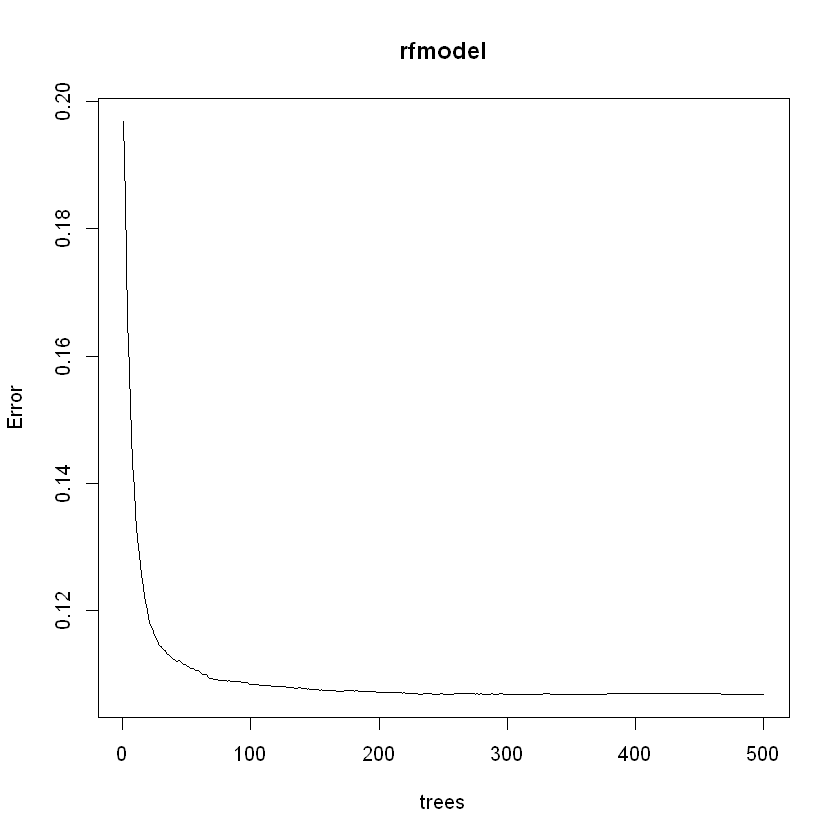

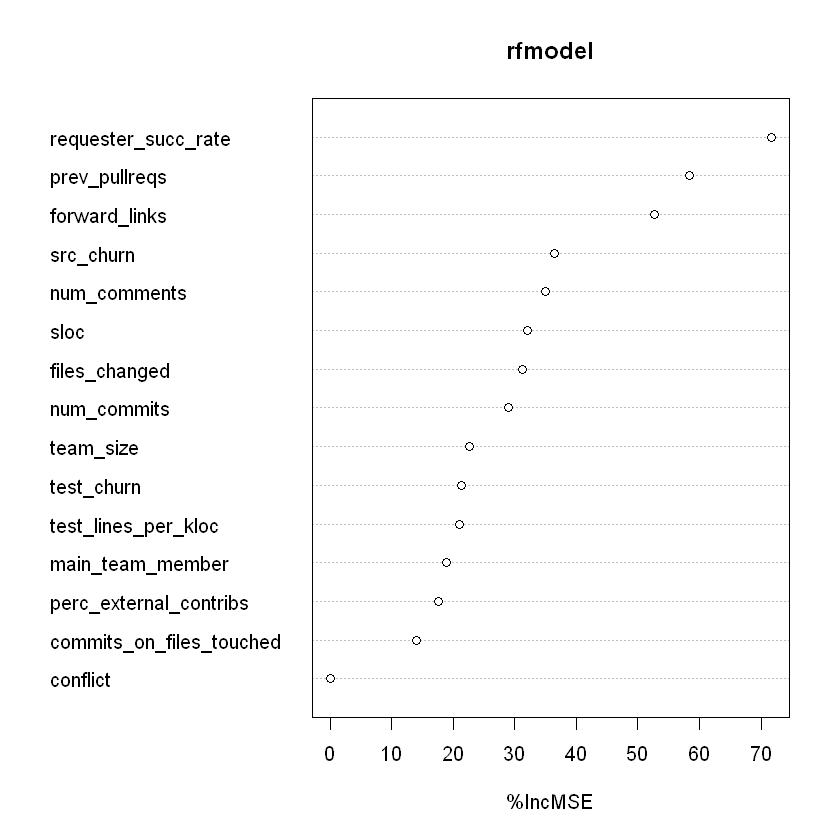

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.783976, ACC 0.604000, PREC 0.952528, REC 0.564252"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.850222"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

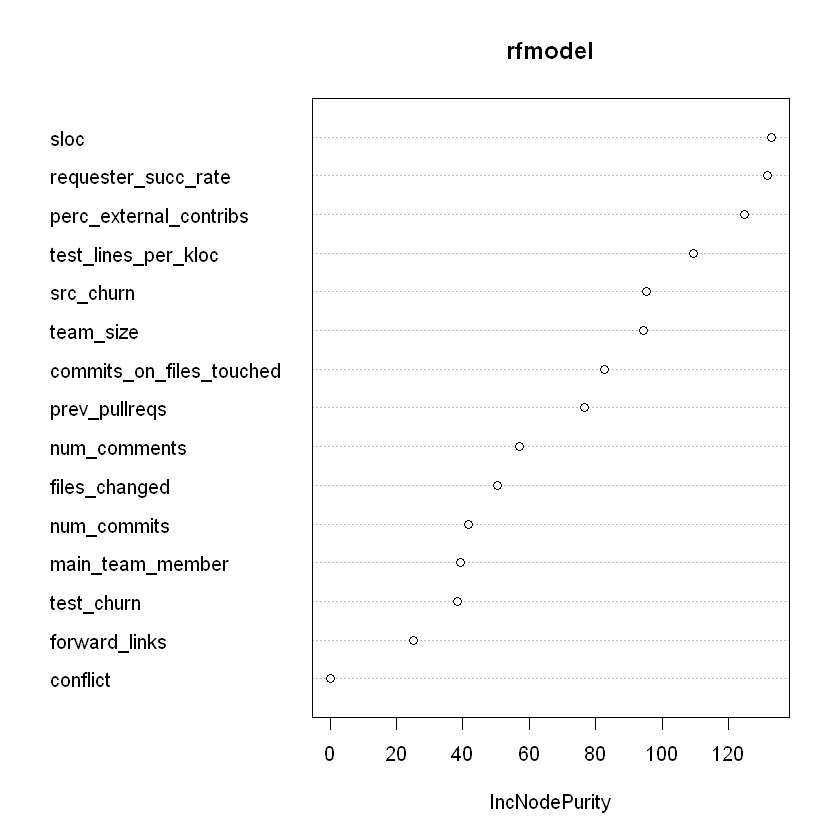


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1113305
                    % Var explained: 12.58
                           %IncMSE IncNodePurity
team_size                17.530103      89.01408
num_commits              30.438420      38.21075
files_changed            28.952949      47.60382
perc_external_contribs   16.585336     117.16136
sloc                     22.989577     125.72607
src_churn                35.682229      85.30952
test_churn               18.941758      36.14834
num_comments             35.840578      53.12769
commits_on_files_touched 11.381932      78.09872
test_lines_per_kloc      14.673986     108.59610
prev_pullreqs            55.920353      70.60271
requester_succ_rate      68.666291     123.14112
main_team_member          8.196558      28.82723
conflict        

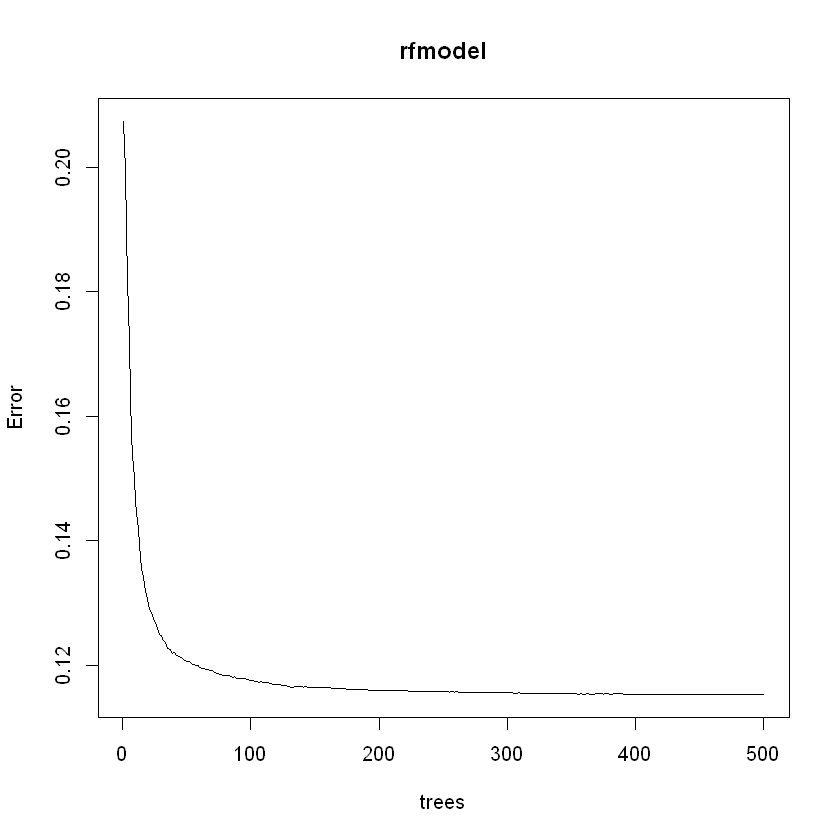

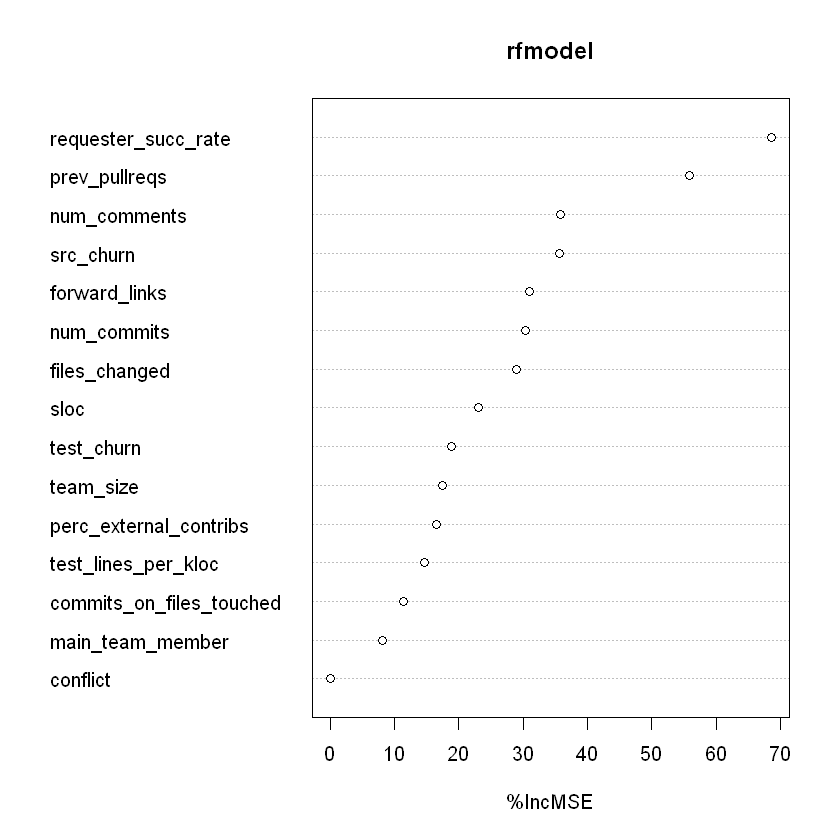

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.783134, ACC 0.595000, PREC 0.955868, REC 0.559400"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.848556"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

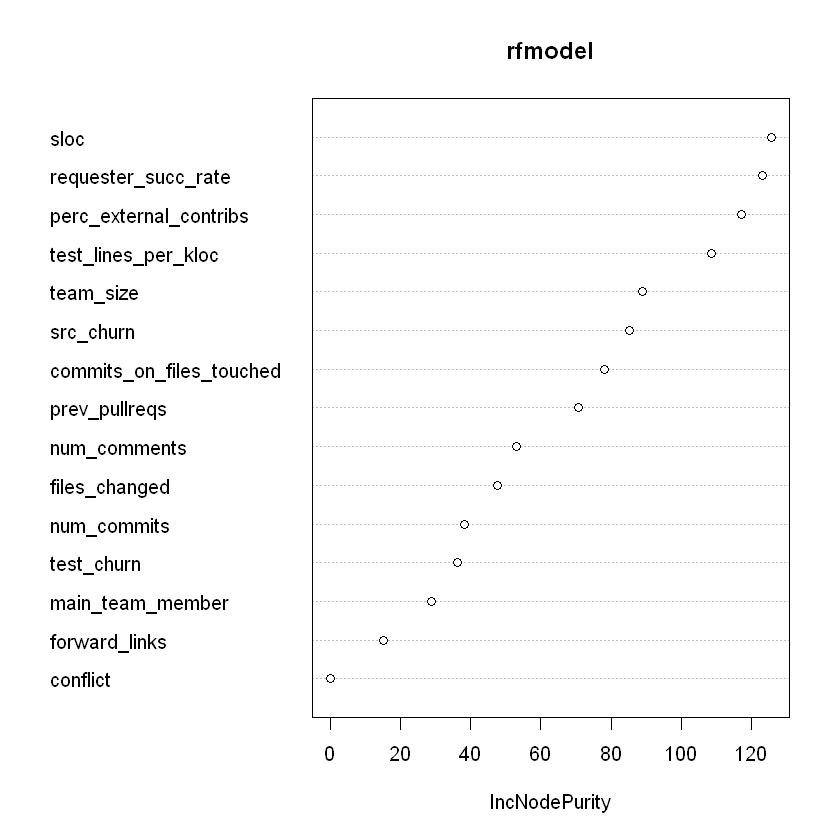


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1079265
                    % Var explained: 16.02
                          %IncMSE IncNodePurity
team_size                16.42230      85.09860
num_commits              34.03443      40.51268
files_changed            23.79178      45.99490
perc_external_contribs   23.21654     117.22381
sloc                     25.09794     123.60850
src_churn                33.95562      85.40926
test_churn               20.22474      36.35044
num_comments             34.03079      54.74390
commits_on_files_touched 19.82142      77.82041
test_lines_per_kloc      23.03063     105.38099
prev_pullreqs            67.08492      68.97343
requester_succ_rate      72.21515     127.66749
main_team_member         23.14131      35.58529
conflict                  0.00

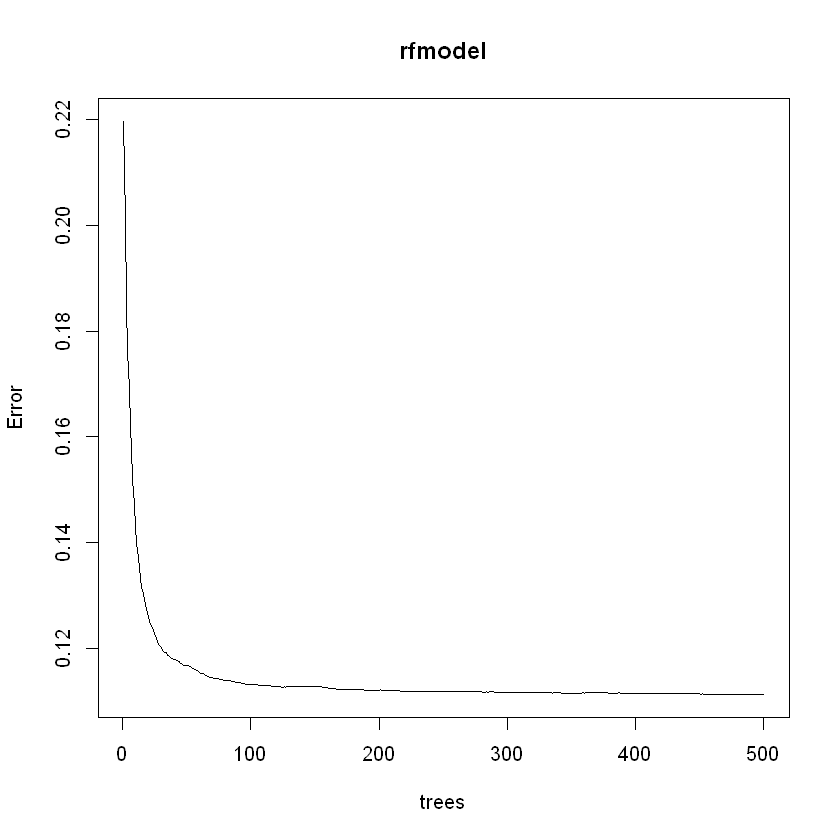

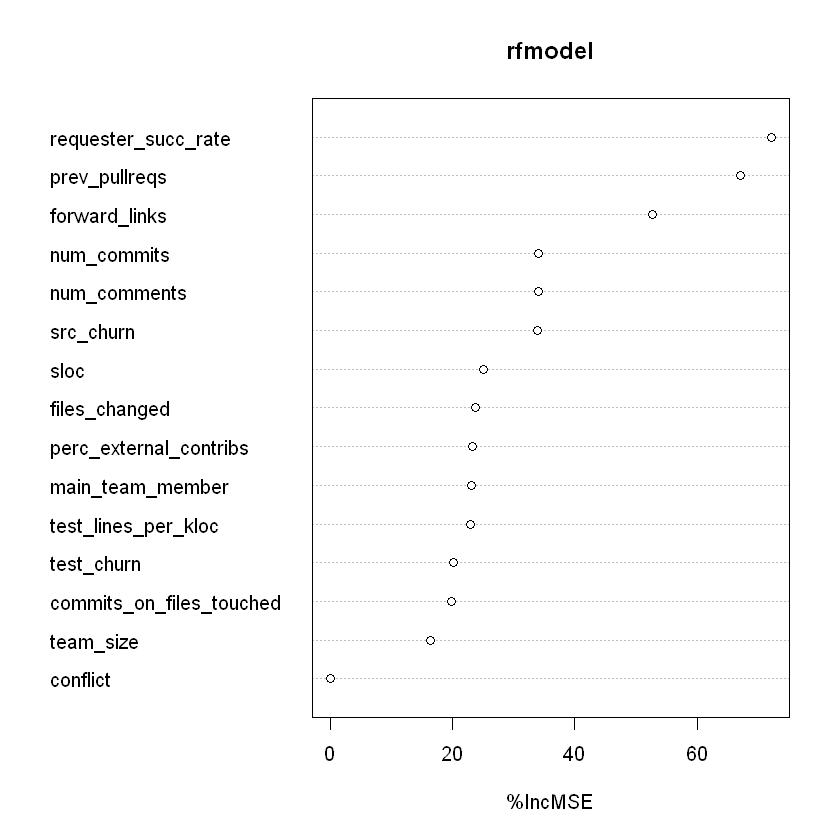

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.738113, ACC 0.600000, PREC 0.916985, REC 0.566061"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.856444"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

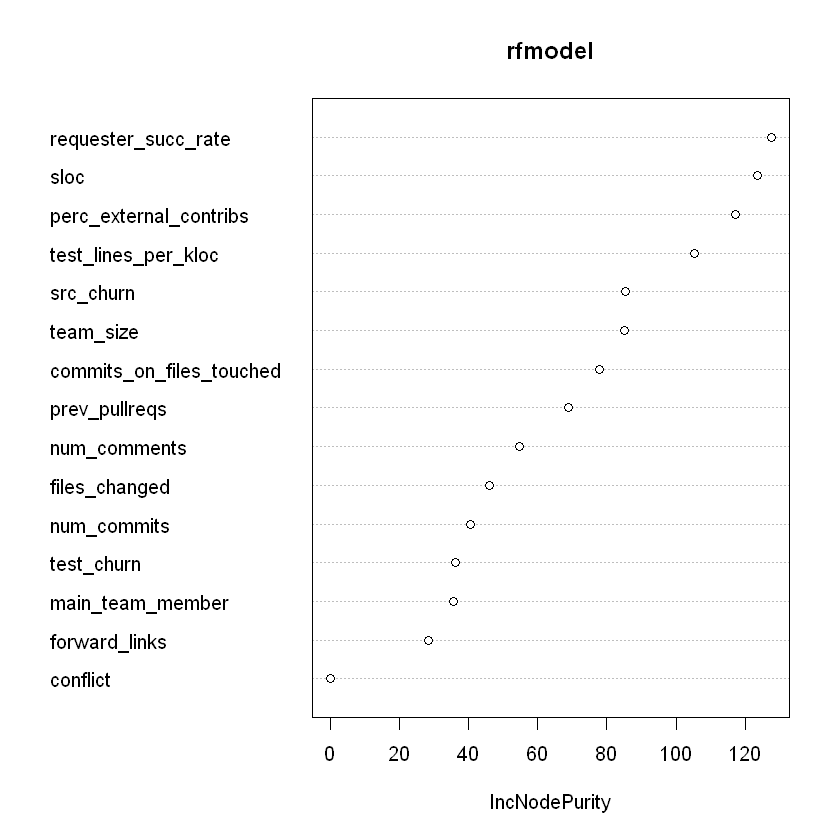


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1052409
                    % Var explained: 14.4
                           %IncMSE IncNodePurity
team_size                16.386603      86.54211
num_commits              32.412243      38.12579
files_changed            27.692817      45.26788
perc_external_contribs   18.827989     114.32156
sloc                     21.083486     114.60195
src_churn                39.648197      82.40929
test_churn               21.003880      34.62621
num_comments             36.493303      52.33744
commits_on_files_touched 15.190516      75.83988
test_lines_per_kloc      15.721768      99.20485
prev_pullreqs            61.501558      66.64063
requester_succ_rate      74.280548     124.47957
main_team_member          5.966133      28.43757
conflict         

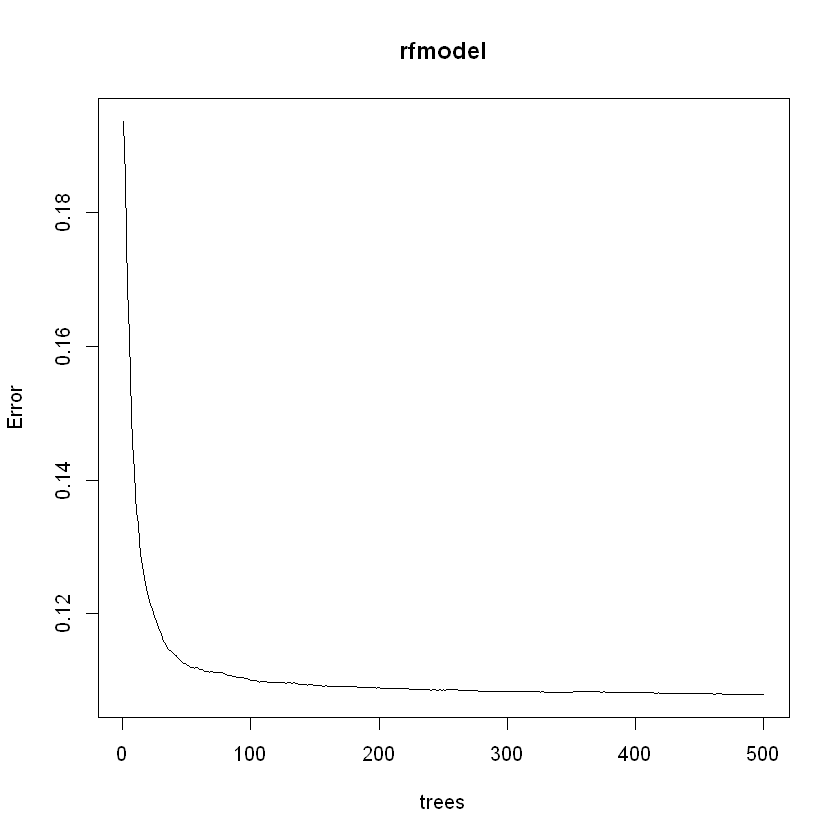

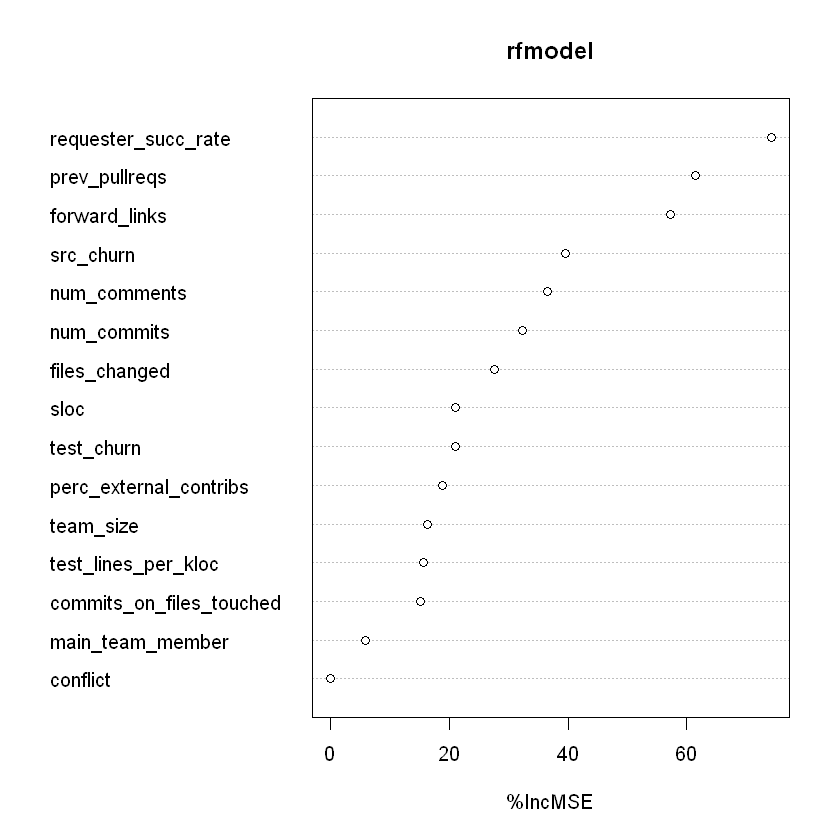

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.778808, ACC 0.599000, PREC 0.952239, REC 0.561628"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.847778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

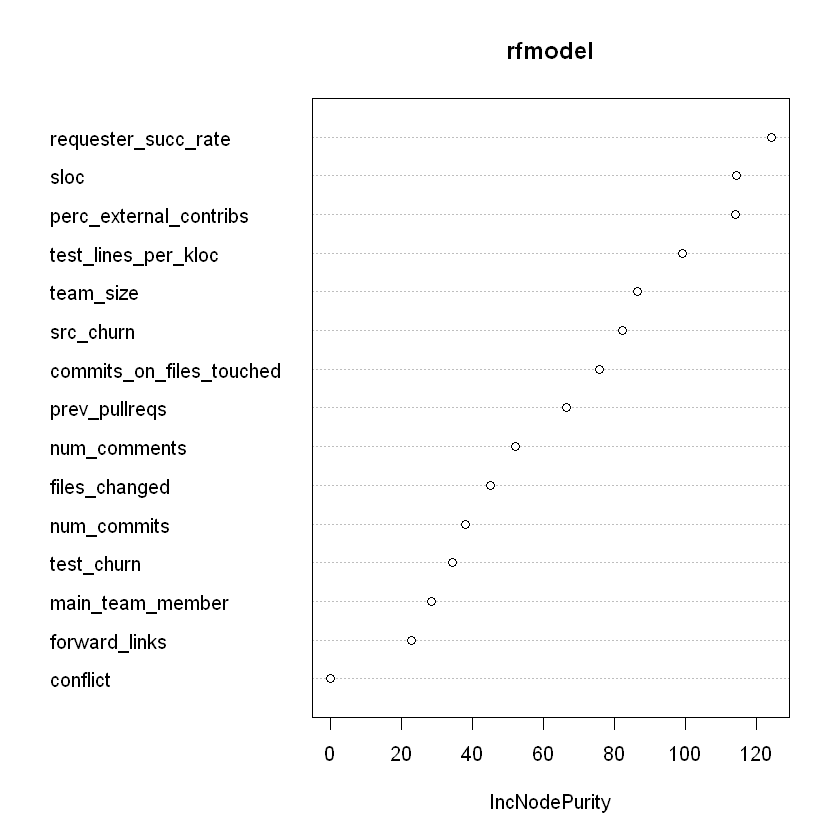


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1123772
                    % Var explained: 12.92
                          %IncMSE IncNodePurity
team_size                15.60004      87.10425
num_commits              36.24262      45.75521
files_changed            29.96791      51.89963
perc_external_contribs   15.77611     118.84350
sloc                     21.20308     121.94331
src_churn                33.83472      82.27322
test_churn               20.49446      39.31602
num_comments             30.49936      56.91395
commits_on_files_touched 12.83539      78.20714
test_lines_per_kloc      13.03595     104.18517
prev_pullreqs            59.02510      69.80813
requester_succ_rate      63.14480     120.26083
main_team_member          7.28137      35.70788
conflict                  0.00

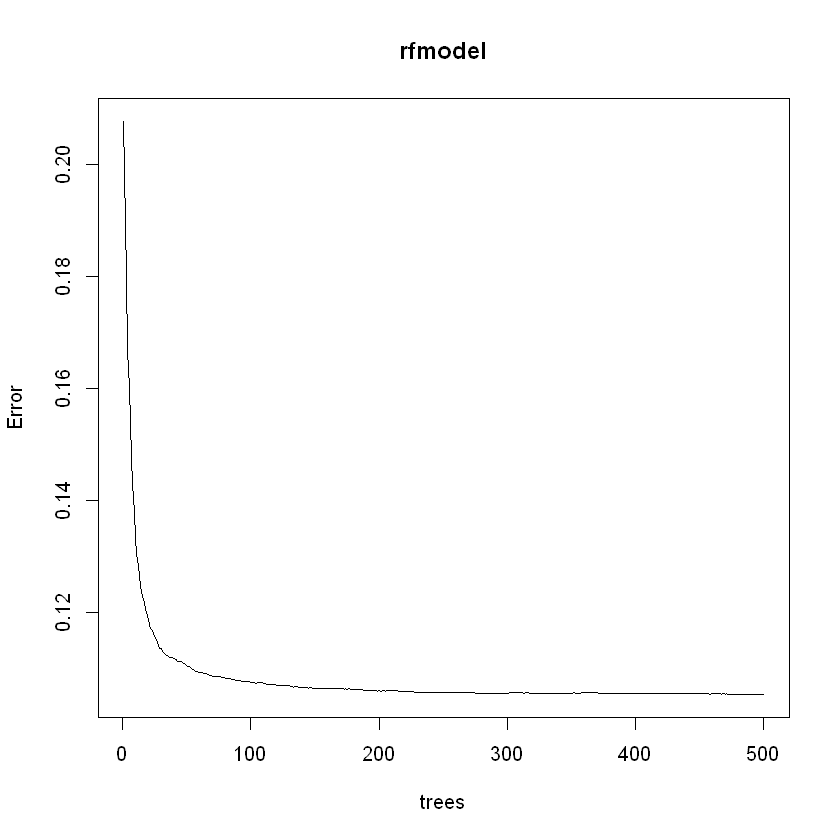

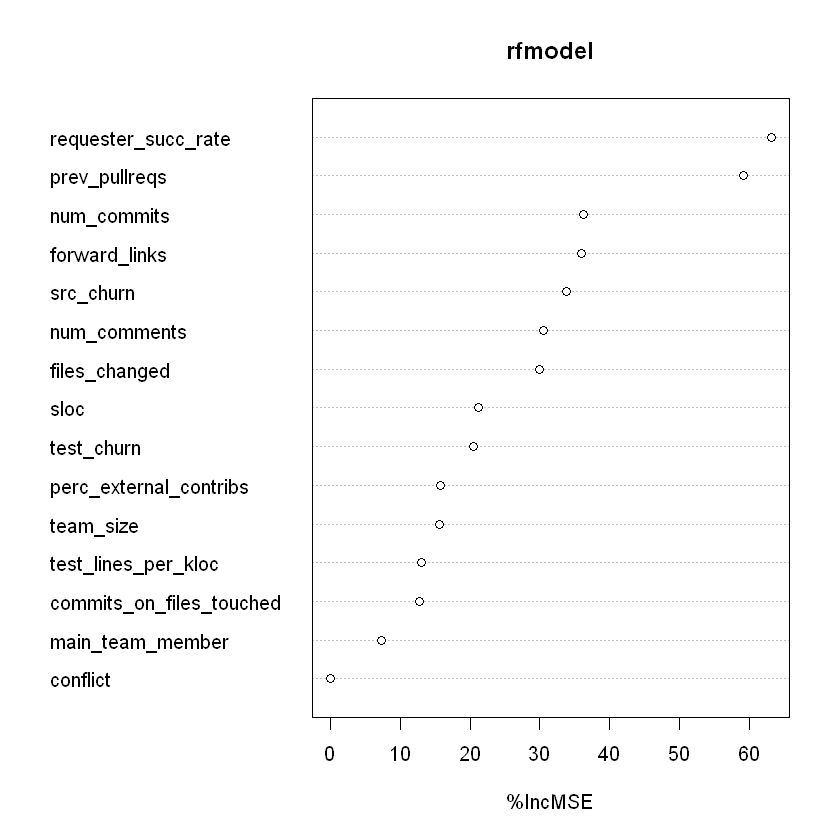

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.744226, ACC 0.600500, PREC 0.935897, REC 0.565243"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.845222"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

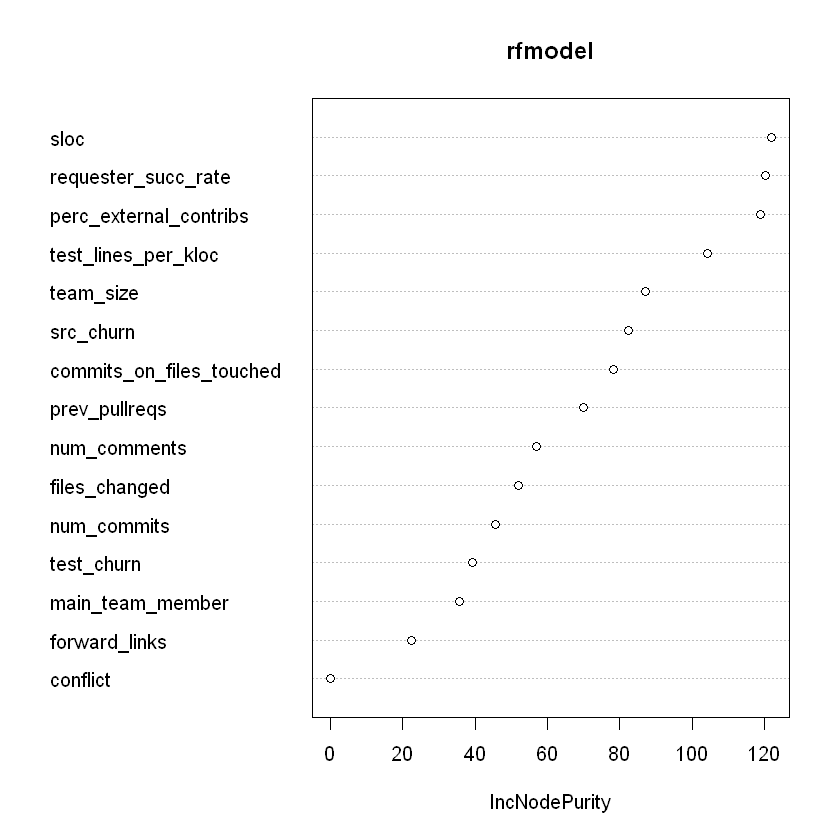


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1101507
                    % Var explained: 15.8
                          %IncMSE IncNodePurity
team_size                17.54212      89.23101
num_commits              27.97451      39.13278
files_changed            30.54147      50.88398
perc_external_contribs   21.04797     118.16407
sloc                     22.05765     123.37836
src_churn                32.78280      85.38373
test_churn               18.05279      34.44595
num_comments             31.89301      54.00385
commits_on_files_touched 14.60287      79.98873
test_lines_per_kloc      20.36154     109.29771
prev_pullreqs            57.61134      73.48871
requester_succ_rate      66.88000     134.02181
main_team_member         16.22398      42.06111
conflict                  0.000

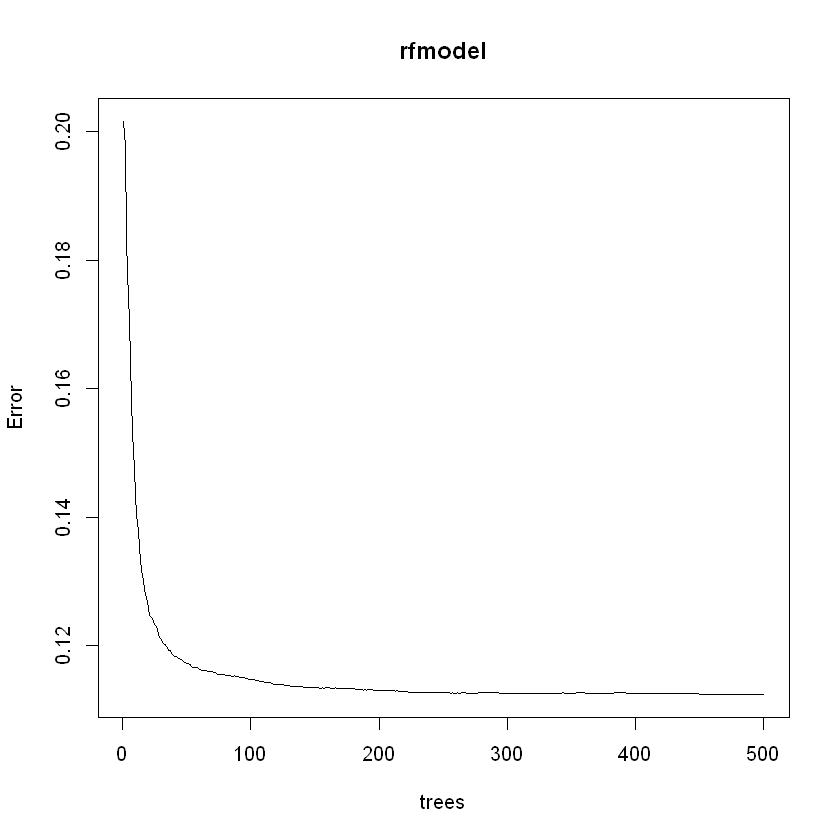

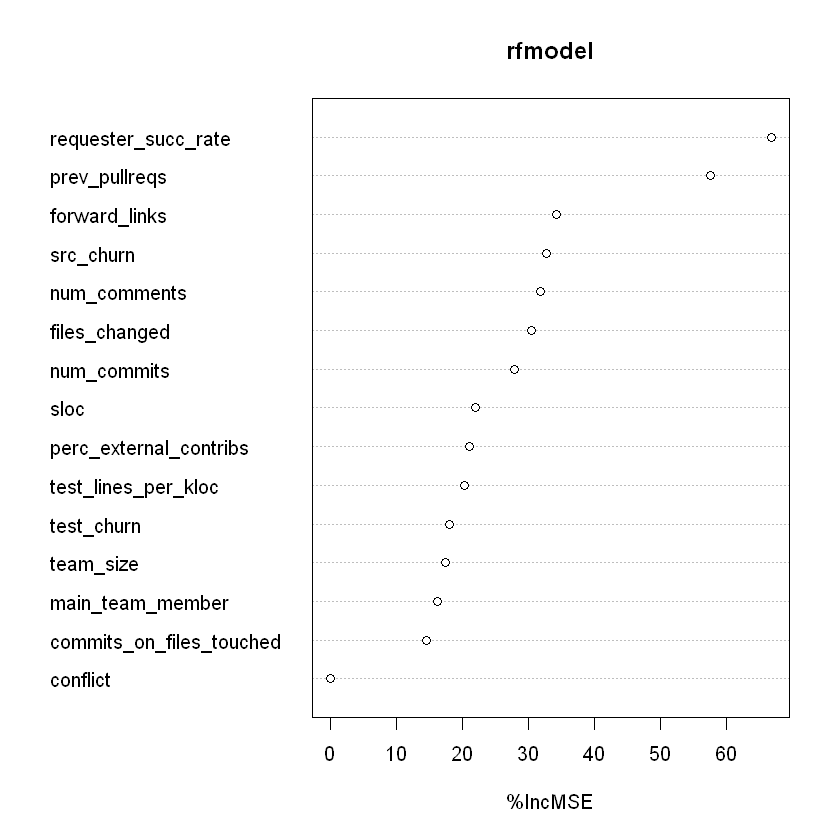

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.762130, ACC 0.592500, PREC 0.936123, REC 0.559272"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.852111"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

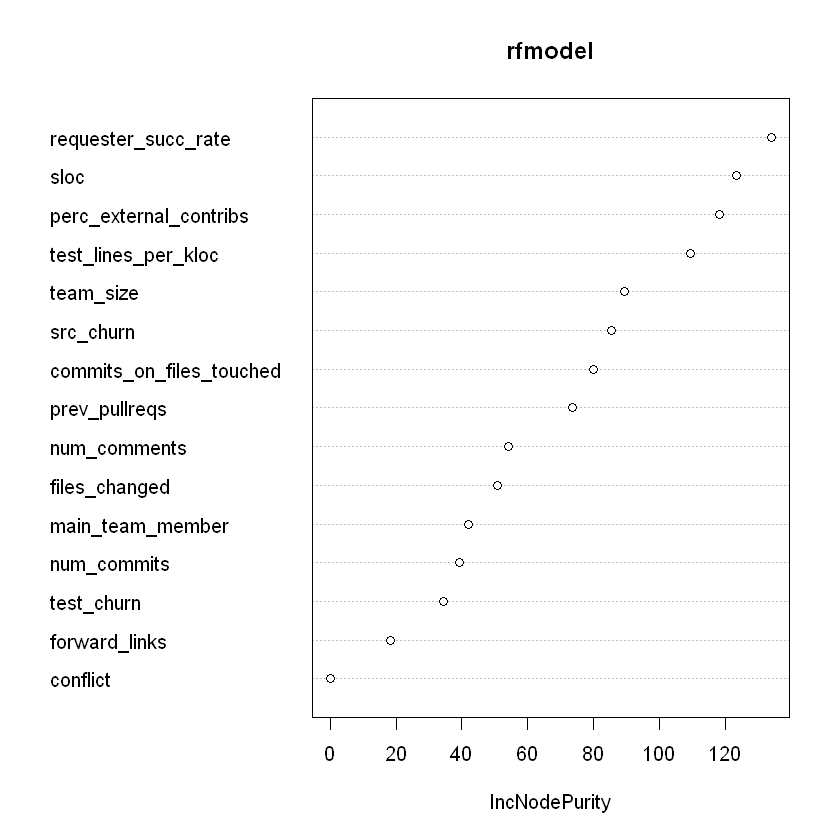


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1102751
                    % Var explained: 12.49
                           %IncMSE IncNodePurity
team_size                17.569000      90.06577
num_commits              30.055534      39.13065
files_changed            27.744479      48.62599
perc_external_contribs    9.593717     111.41602
sloc                     17.804412     119.76482
src_churn                33.390707      84.51257
test_churn               14.367757      33.94796
num_comments             32.872949      53.13580
commits_on_files_touched 20.284965      79.78766
test_lines_per_kloc      16.121419     108.20750
prev_pullreqs            59.460293      69.98268
requester_succ_rate      54.823185     117.55174
main_team_member         15.626294      33.05640
conflict        

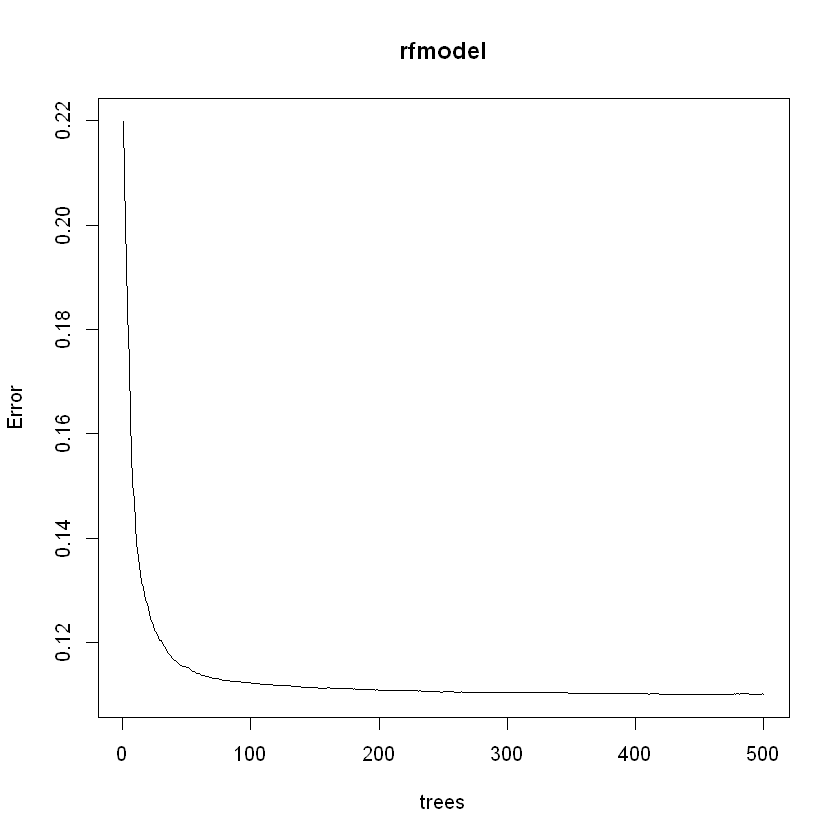

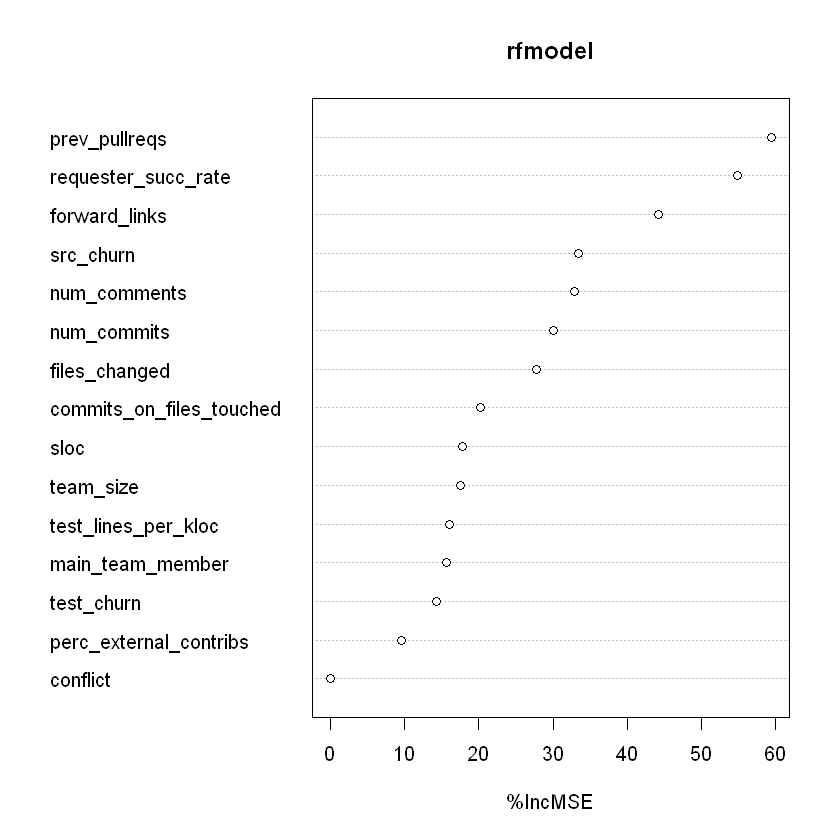

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.766457, ACC 0.601000, PREC 0.949427, REC 0.563743"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.849778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

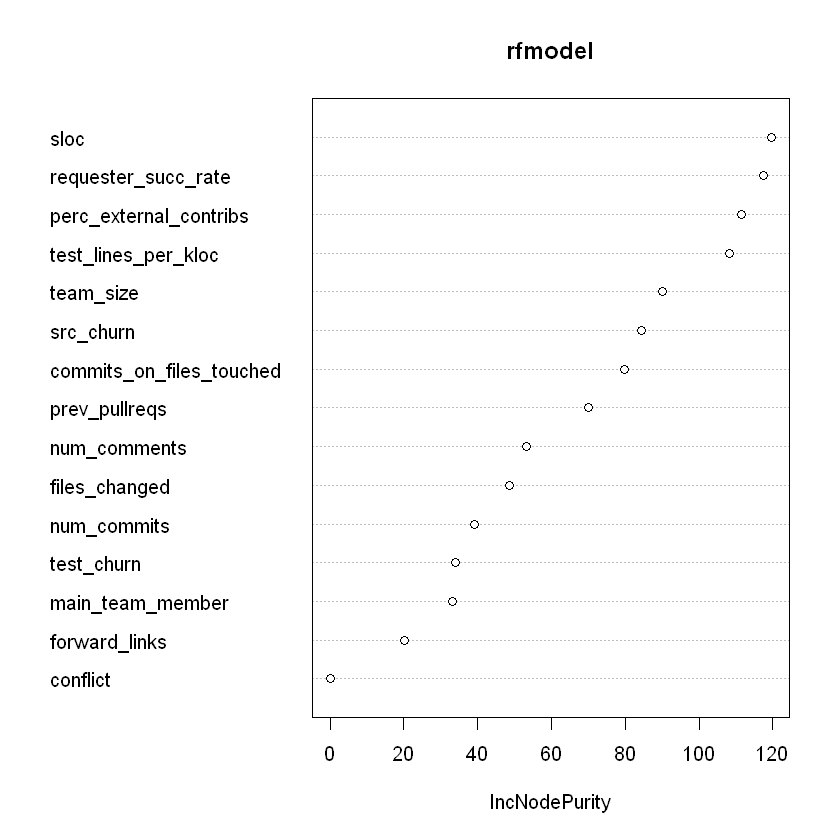


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1113048
                    % Var explained: 12.81
                          %IncMSE IncNodePurity
team_size                15.07884      89.14281
num_commits              34.81686      38.63651
files_changed            32.20662      49.08014
perc_external_contribs   12.22512     115.47933
sloc                     20.40213     119.34394
src_churn                38.86919      86.05426
test_churn               23.58050      34.88717
num_comments             30.39190      53.90667
commits_on_files_touched 14.02380      78.79434
test_lines_per_kloc      21.03729     112.52218
prev_pullreqs            71.19606      68.89016
requester_succ_rate      71.90653     121.81216
main_team_member         22.59614      33.36066
conflict                  0.00

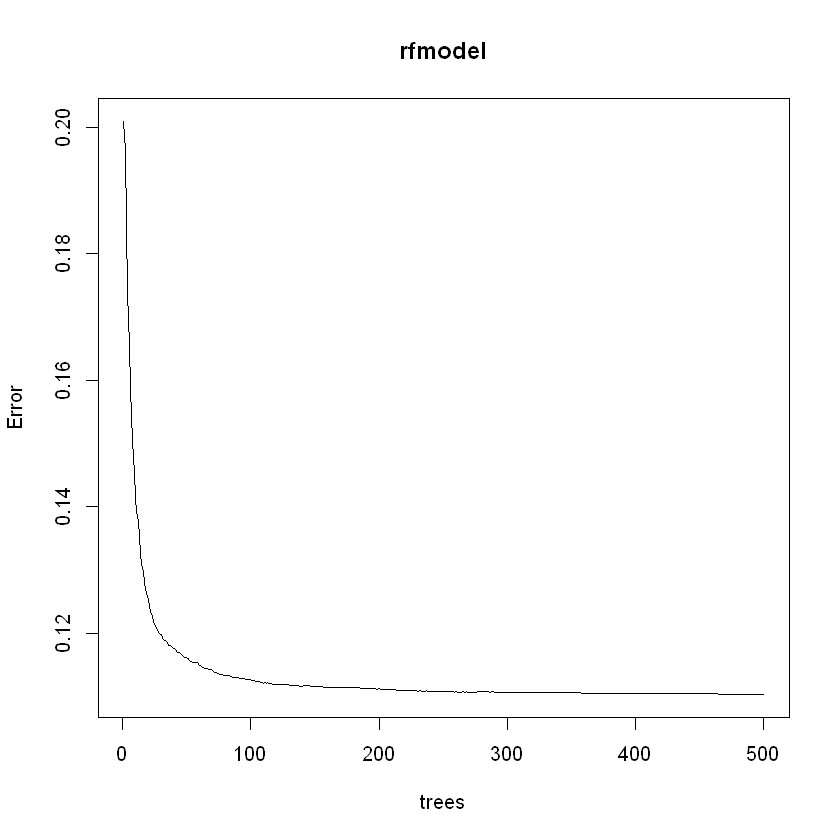

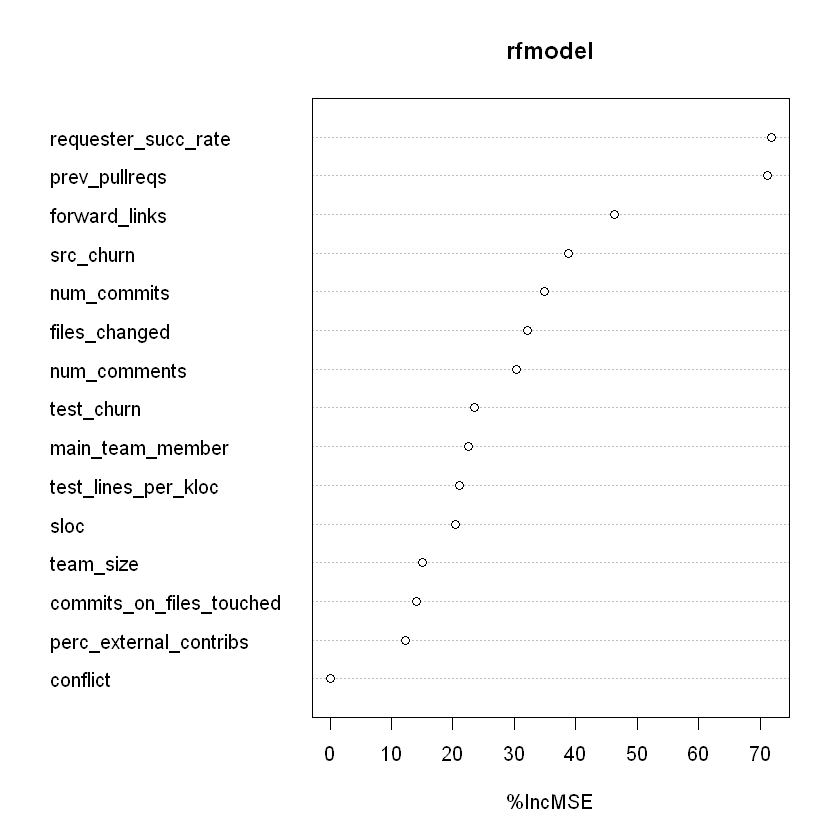

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.794743, ACC 0.616000, PREC 0.954680, REC 0.572781"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.842667"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

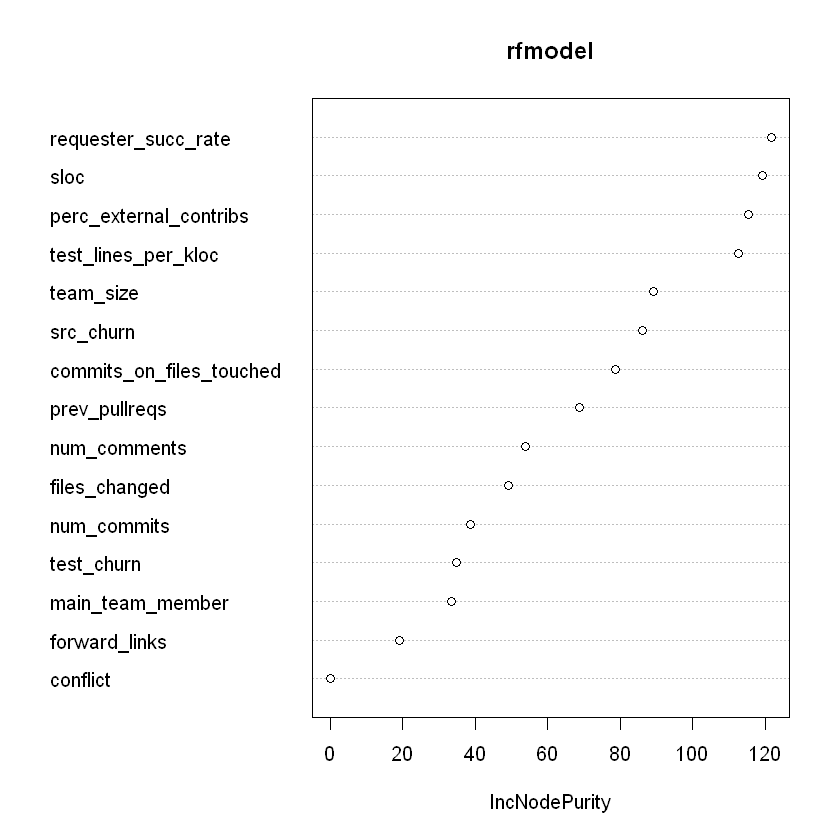


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1134718
                    % Var explained: 14.41
                          %IncMSE IncNodePurity
team_size                18.45392      90.85368
num_commits              26.38659      40.22610
files_changed            27.16981      48.72432
perc_external_contribs   18.53730     120.47262
sloc                     24.24130     126.50203
src_churn                32.05801      84.67031
test_churn               20.75631      38.83921
num_comments             35.30329      58.83925
commits_on_files_touched 17.28845      85.54235
test_lines_per_kloc      17.18271     110.39613
prev_pullreqs            69.88528      75.84302
requester_succ_rate      73.43456     131.65210
main_team_member         15.96383      33.57906
conflict                  0.00

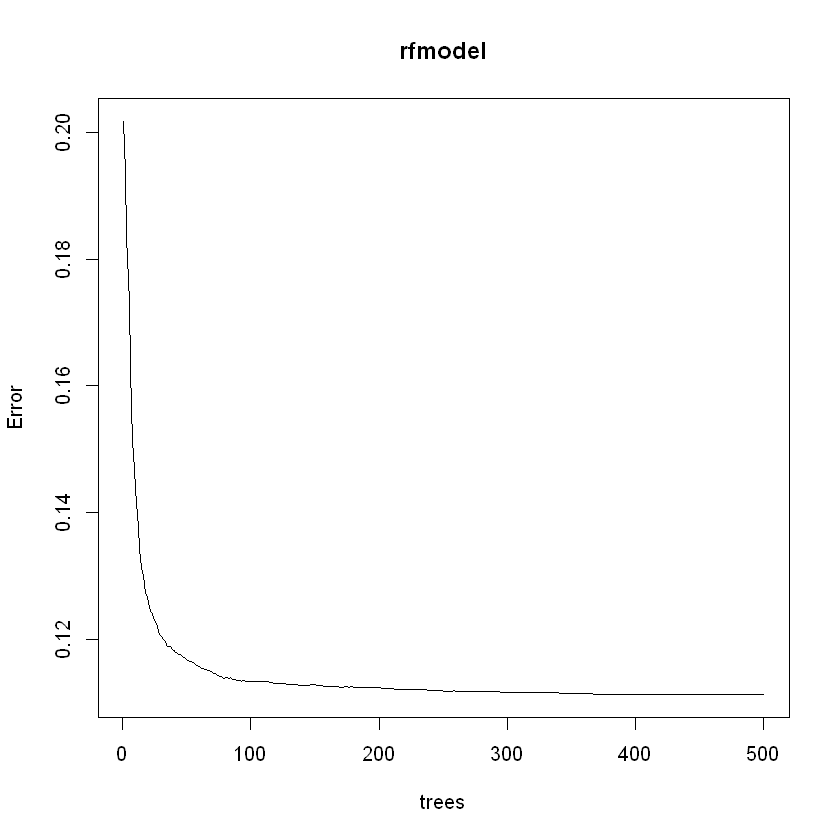

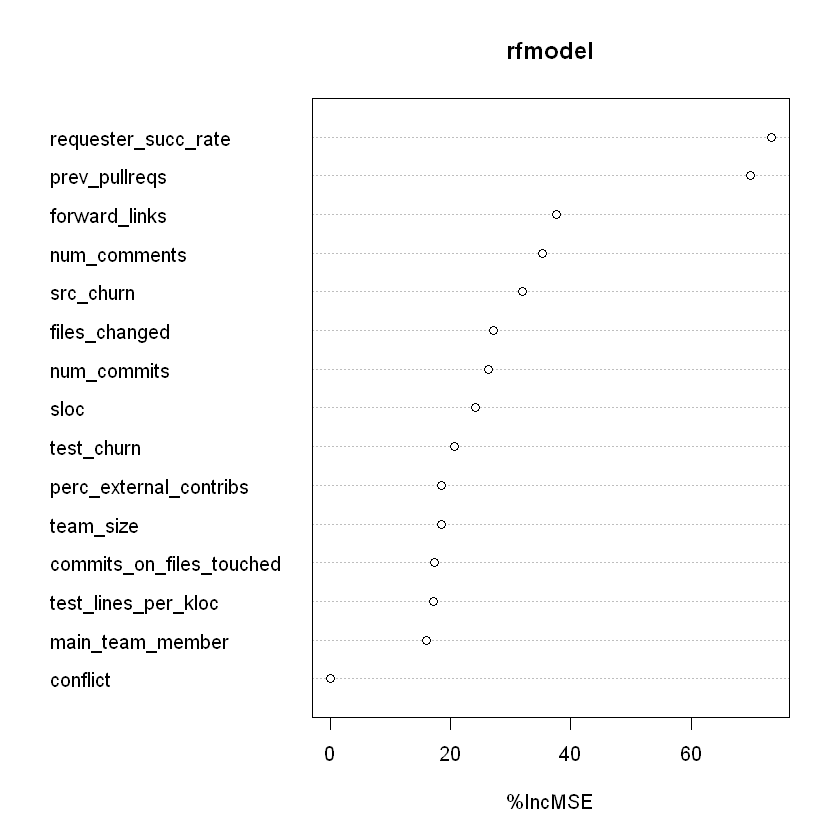

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.748283, ACC 0.586000, PREC 0.931244, REC 0.555686"
[1] "Finished Loop, converting restuls"
[1] "return restuls"
[1] "Outputing Restuls"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

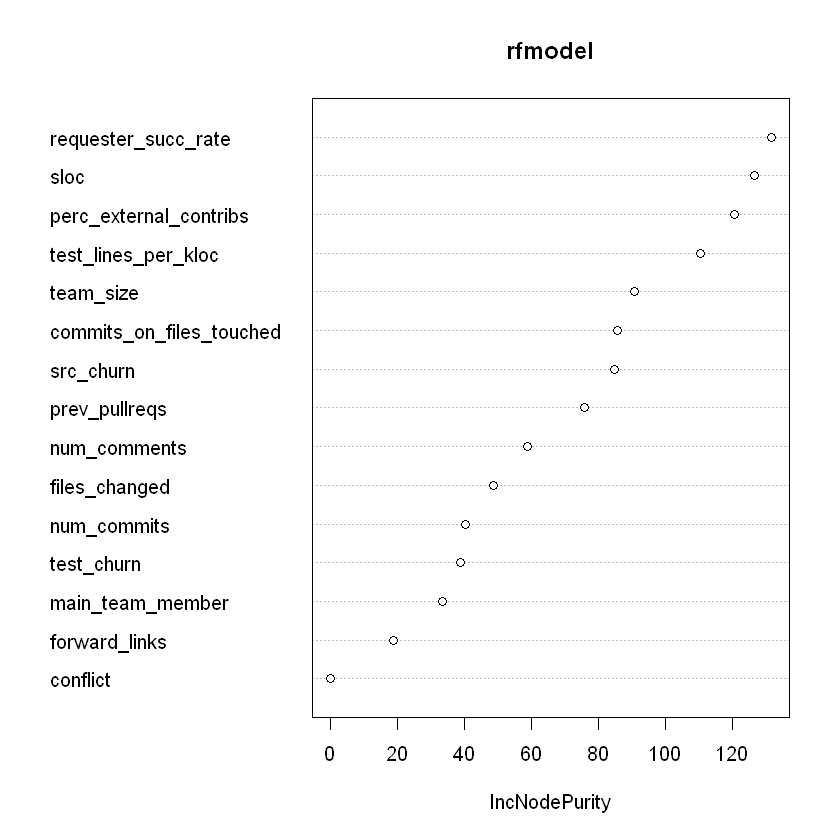


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1066941
                    % Var explained: 16.88
                           %IncMSE IncNodePurity
team_size                 60.99312      443.5460
num_commits               75.96945      197.9647
files_changed             57.60787      244.2185
perc_external_contribs    44.51226      589.3216
sloc                      74.26698      643.3095
src_churn                 75.35755      415.8058
test_churn                43.24795      181.8460
num_comments              74.11569      252.4367
commits_on_files_touched  42.56786      398.3567
test_lines_per_kloc       49.87620      548.0139
prev_pullreqs             98.83640      331.3783
requester_succ_rate      115.04280      614.6353
main_team_member          21.44743      171.5483
conflict        

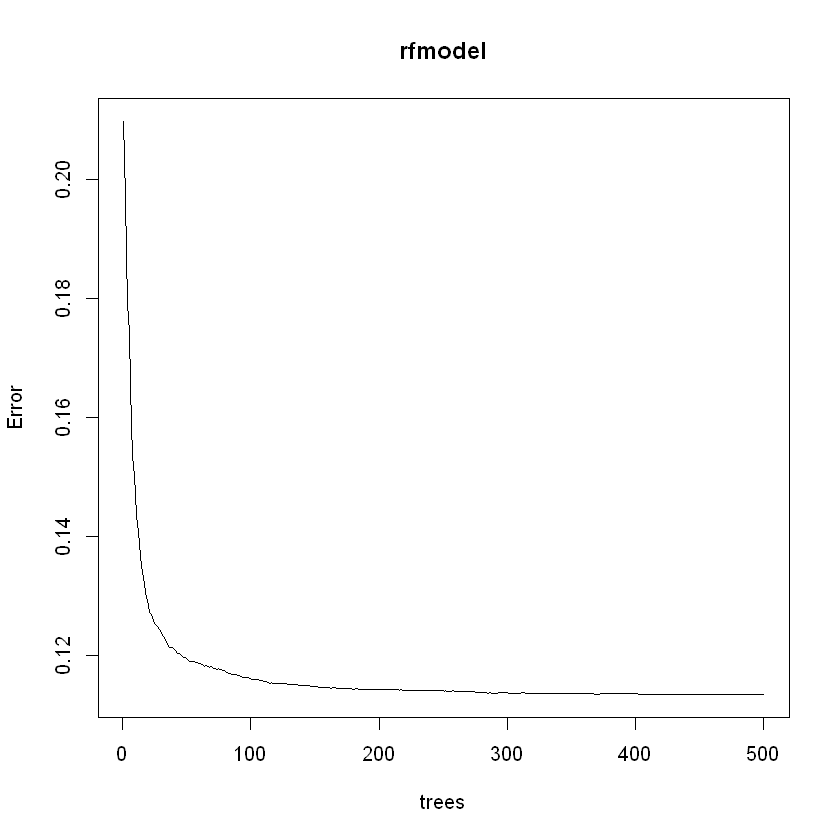

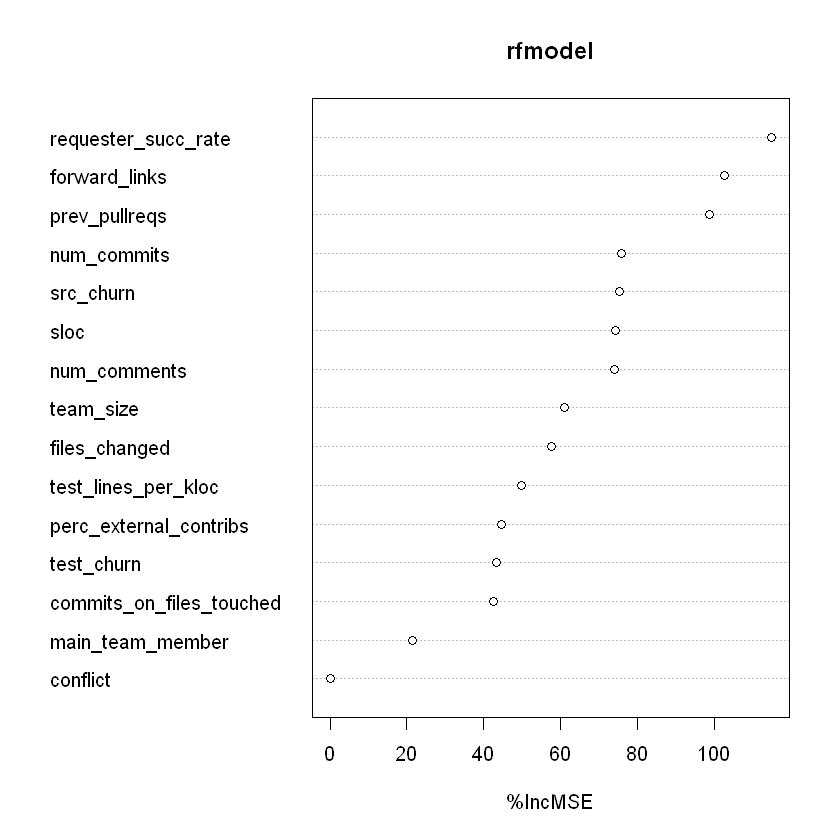

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.775368, ACC 0.619600, PREC 0.941554, REC 0.588027"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.850311"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

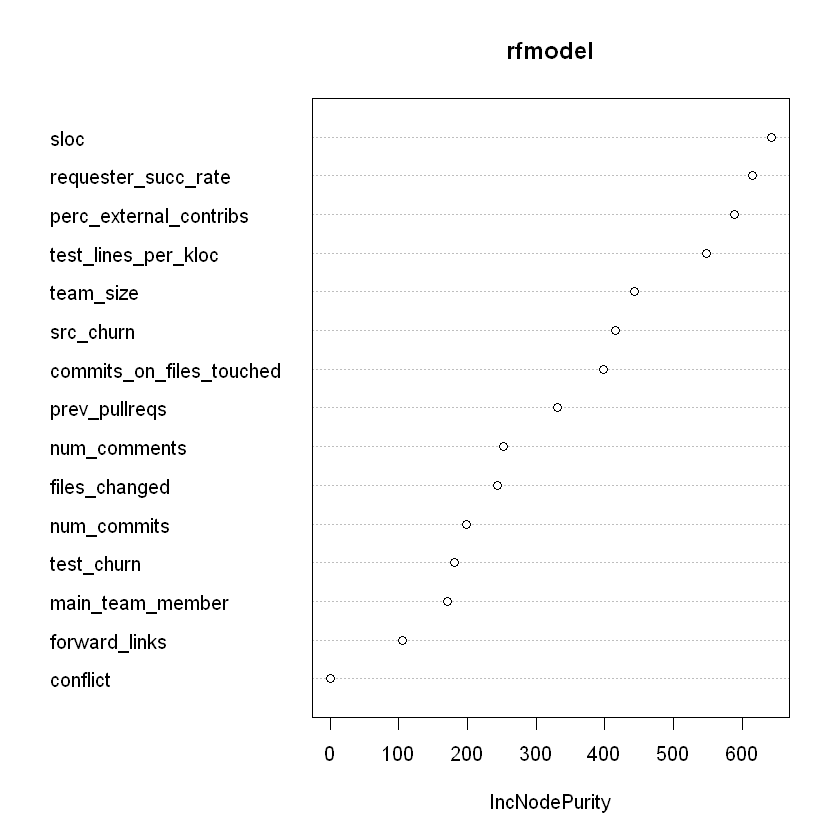


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1066161
                    % Var explained: 16.24
                           %IncMSE IncNodePurity
team_size                 56.92250     441.49753
num_commits               72.49313     197.54223
files_changed             65.03580     239.51663
perc_external_contribs    46.88508     593.37773
sloc                      61.01873     633.56692
src_churn                 75.71565     419.87858
test_churn                53.23819     182.18402
num_comments              71.89199     256.83194
commits_on_files_touched  43.69575     395.09193
test_lines_per_kloc       43.74783     542.66678
prev_pullreqs            109.31051     332.31220
requester_succ_rate      112.89426     601.52591
main_team_member          19.05219     153.60177
conflict        

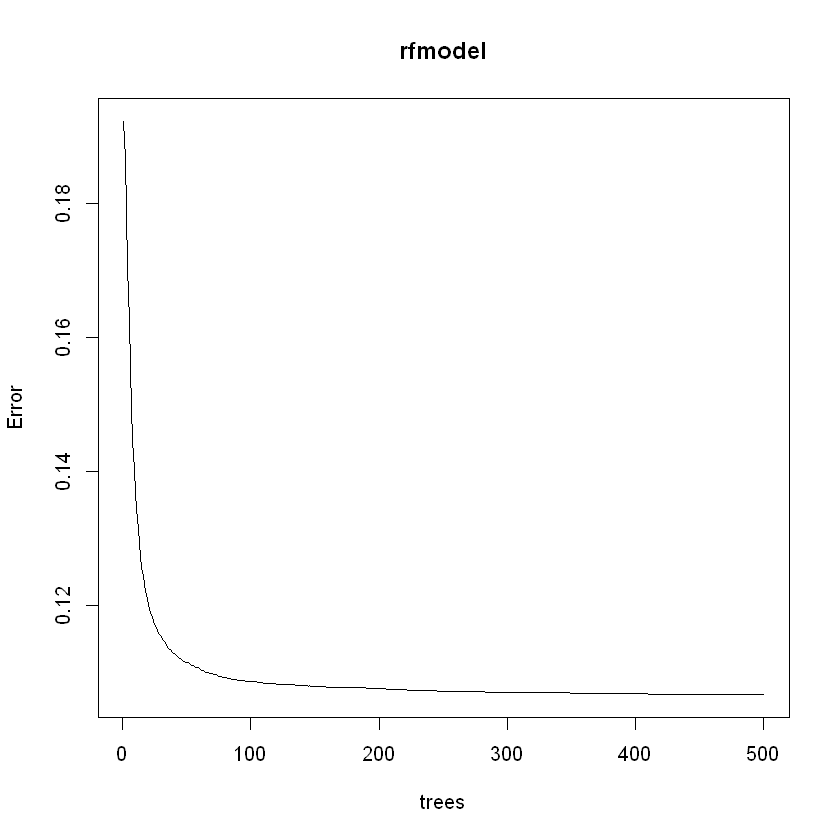

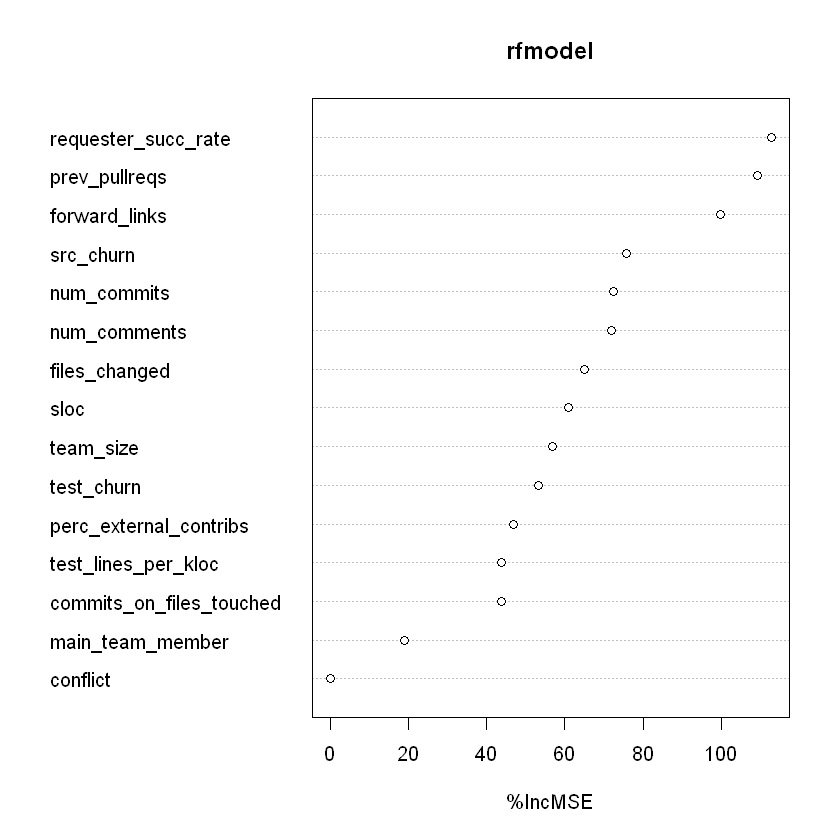

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.788628, ACC 0.626400, PREC 0.949393, REC 0.593097"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848022"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

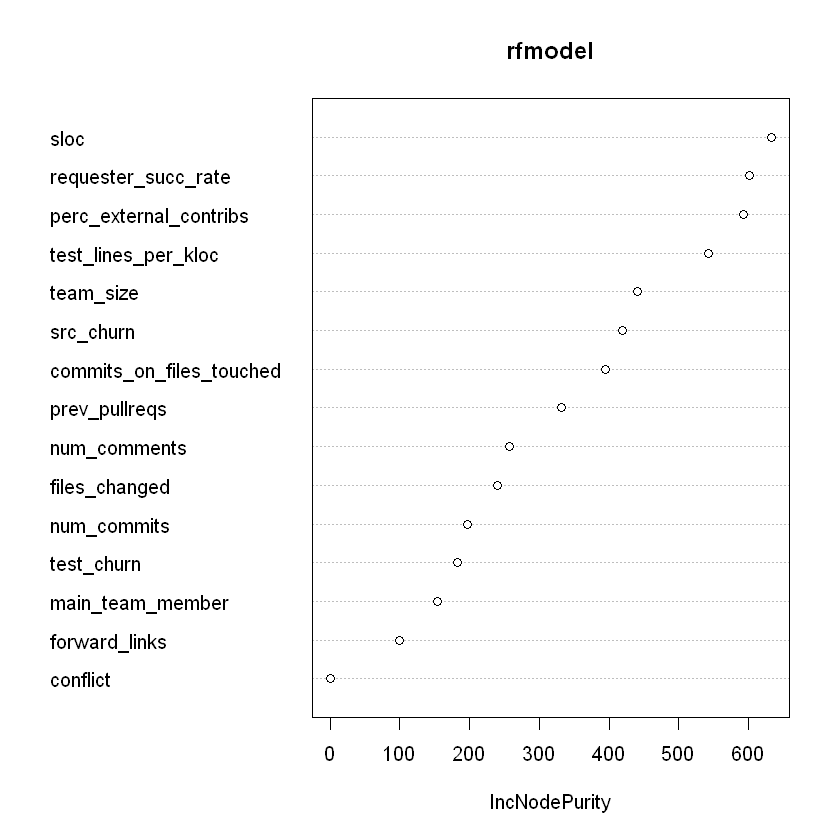


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1080888
                    % Var explained: 16.13
                           %IncMSE IncNodePurity
team_size                 58.96872     448.08907
num_commits               79.13021     201.44088
files_changed             64.74085     243.58347
perc_external_contribs    50.60819     600.03626
sloc                      63.10991     647.43835
src_churn                 86.38800     426.98260
test_churn                47.80765     184.03677
num_comments              82.00783     258.71845
commits_on_files_touched  39.65488     403.41772
test_lines_per_kloc       49.78270     554.96062
prev_pullreqs            110.81213     323.27654
requester_succ_rate      105.20562     608.29597
main_team_member          25.74061     168.47944
conflict        

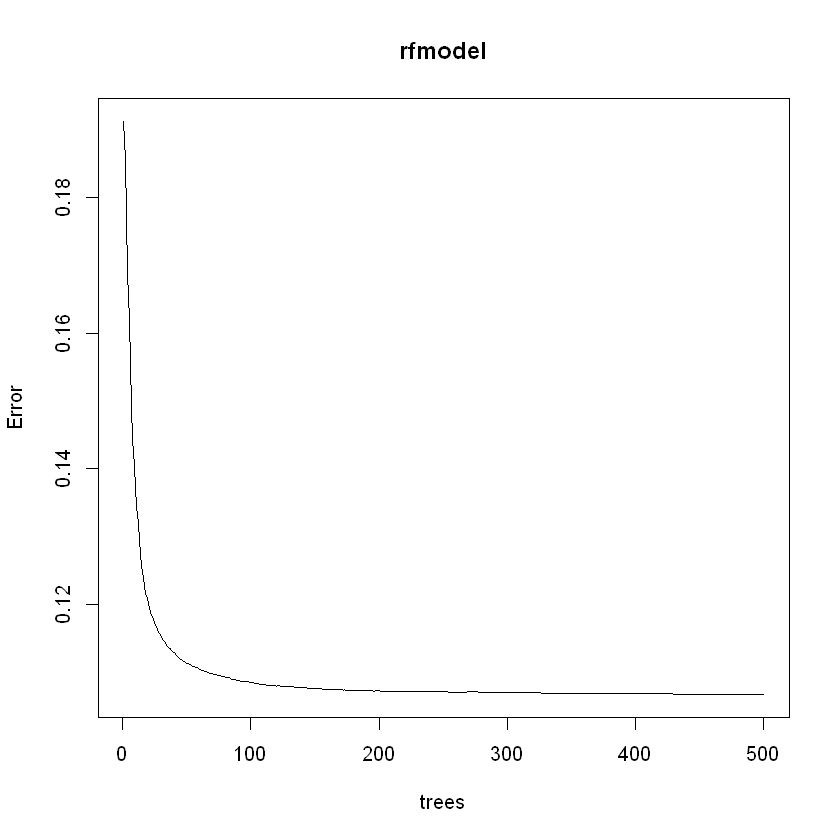

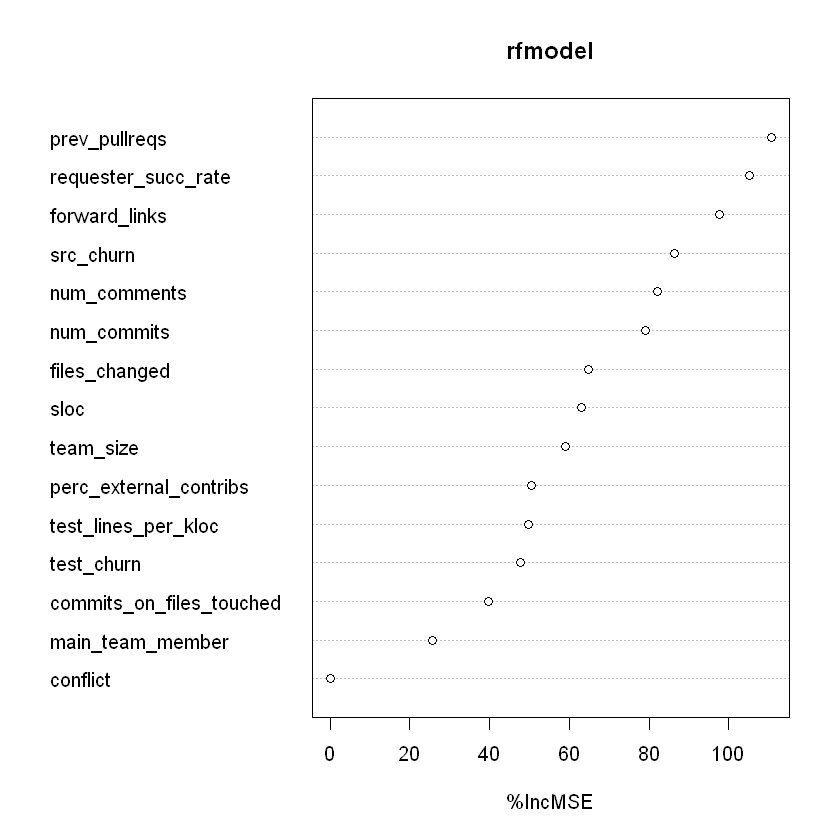

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.797918, ACC 0.630300, PREC 0.952237, REC 0.594273"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848222"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

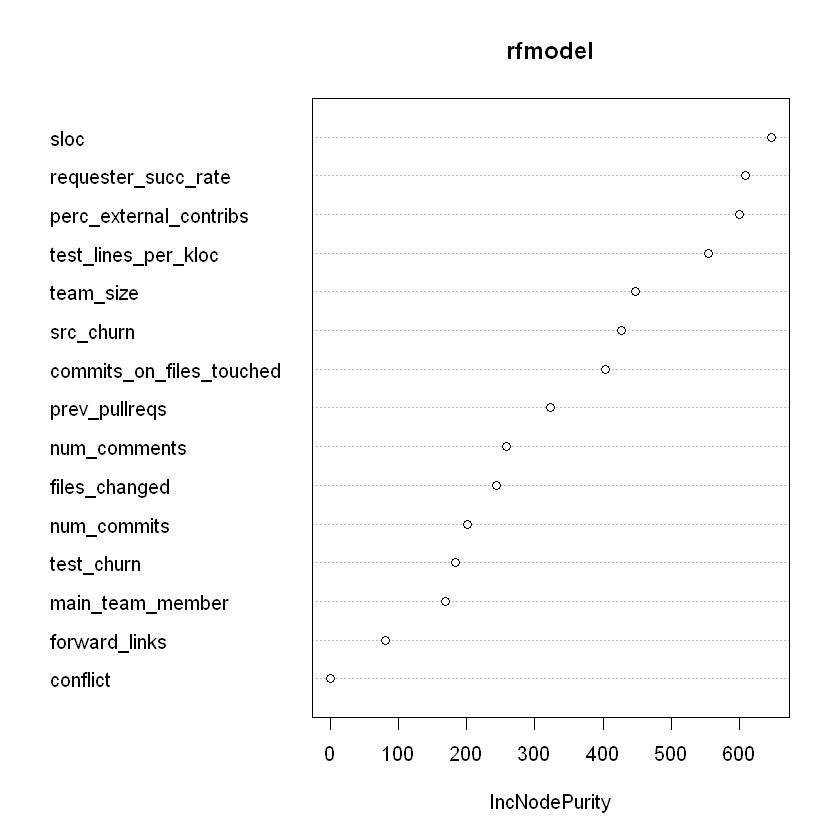


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1073826
                    % Var explained: 16.59
                           %IncMSE IncNodePurity
team_size                 56.57150     450.08308
num_commits               67.89602     194.49273
files_changed             71.19728     247.07766
perc_external_contribs    55.43520     602.04418
sloc                      68.14646     654.00800
src_churn                 87.12583     425.96561
test_churn                52.28665     181.02230
num_comments              74.19035     257.32752
commits_on_files_touched  49.47844     395.12885
test_lines_per_kloc       56.14186     553.74519
prev_pullreqs             93.92995     330.67258
requester_succ_rate      114.81117     607.14957
main_team_member          33.15793     156.39093
conflict        

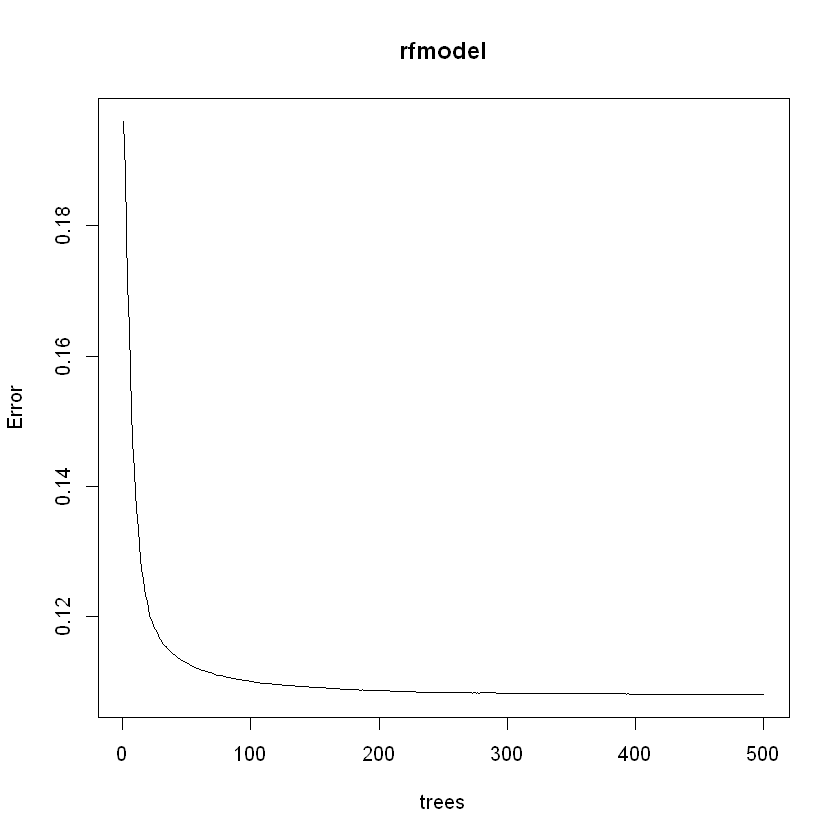

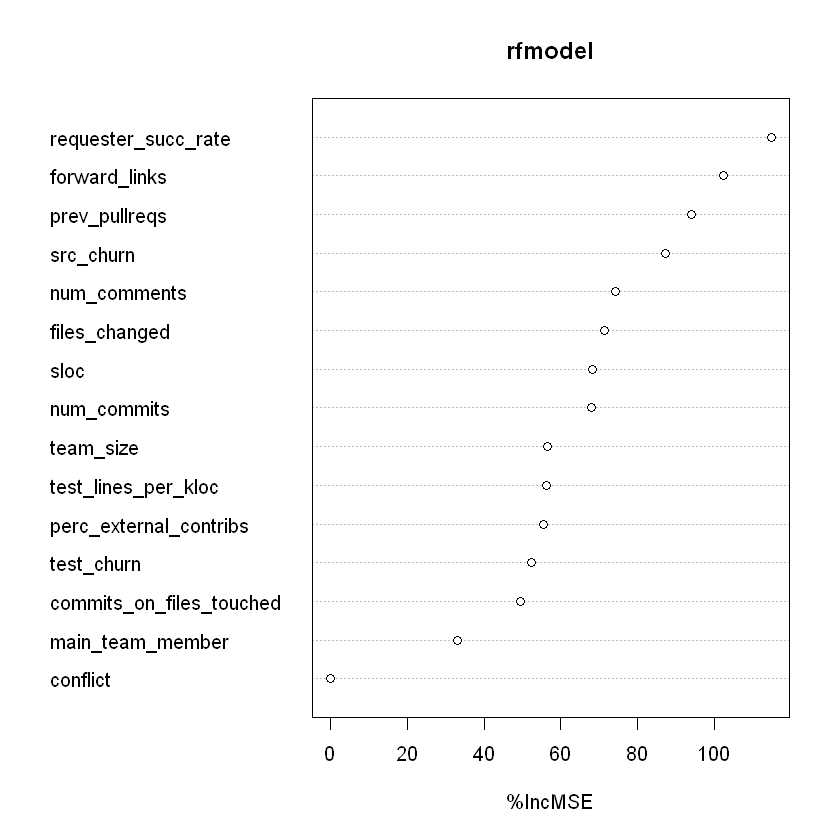

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.789635, ACC 0.630200, PREC 0.948703, REC 0.592971"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.850578"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

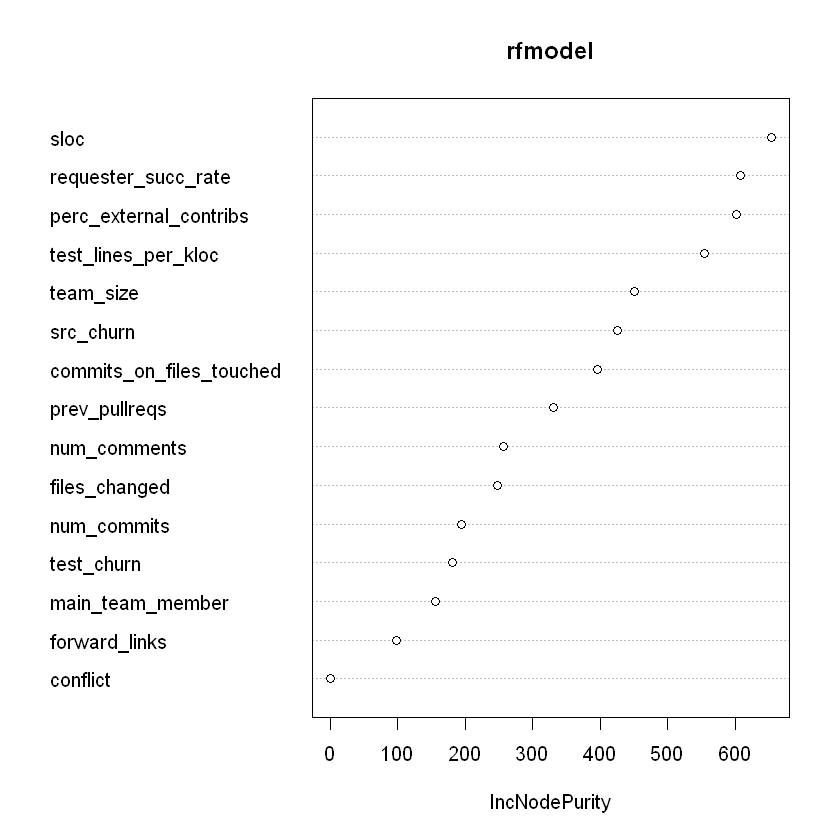


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1067562
                    % Var explained: 16
                           %IncMSE IncNodePurity
team_size                 53.93860     435.26246
num_commits               69.95373     194.24490
files_changed             65.40196     243.17463
perc_external_contribs    48.37209     596.22087
sloc                      67.88071     624.27818
src_churn                 87.54630     424.56941
test_churn                52.91062     187.96653
num_comments              75.44344     252.70098
commits_on_files_touched  43.93363     393.12610
test_lines_per_kloc       56.60007     549.43256
prev_pullreqs            106.46159     323.21958
requester_succ_rate      111.02571     588.99460
main_team_member          35.01691     172.45299
conflict           

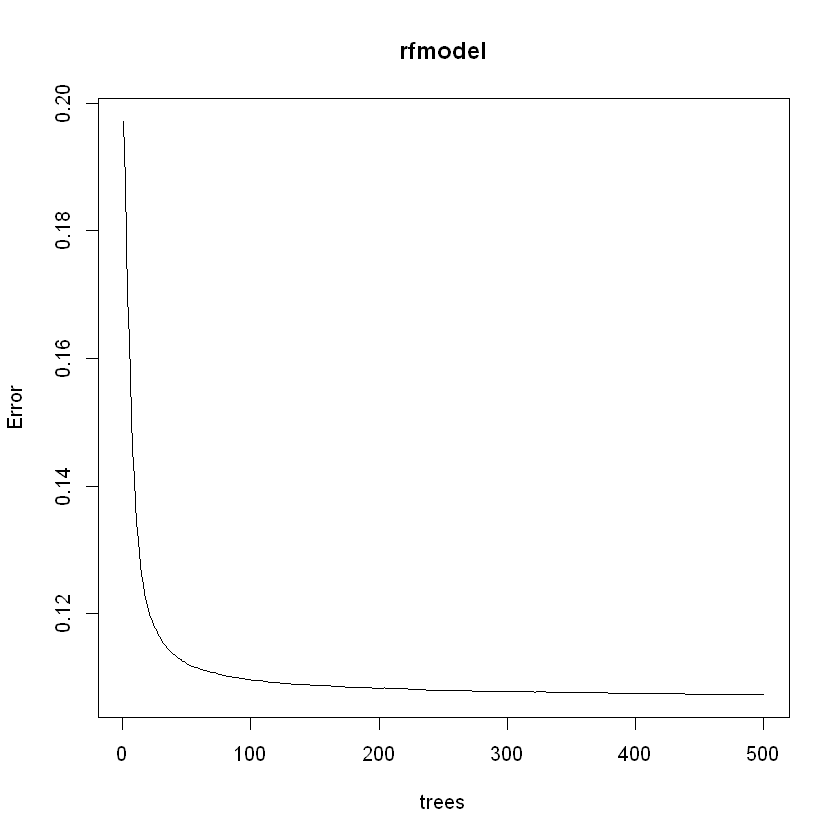

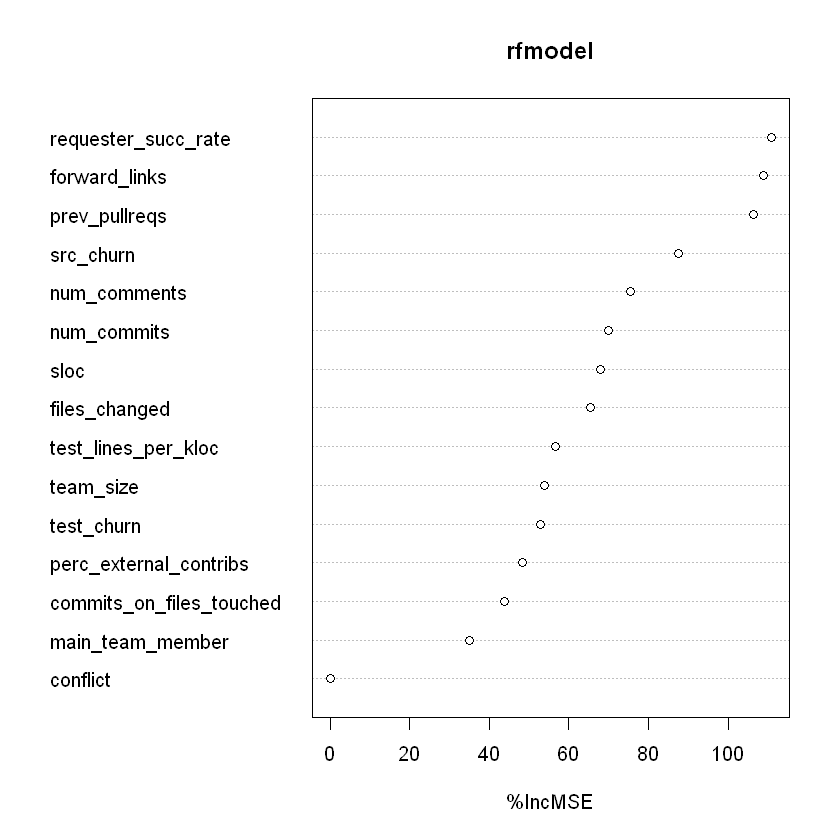

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.791768, ACC 0.625100, PREC 0.947747, REC 0.591508"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848000"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

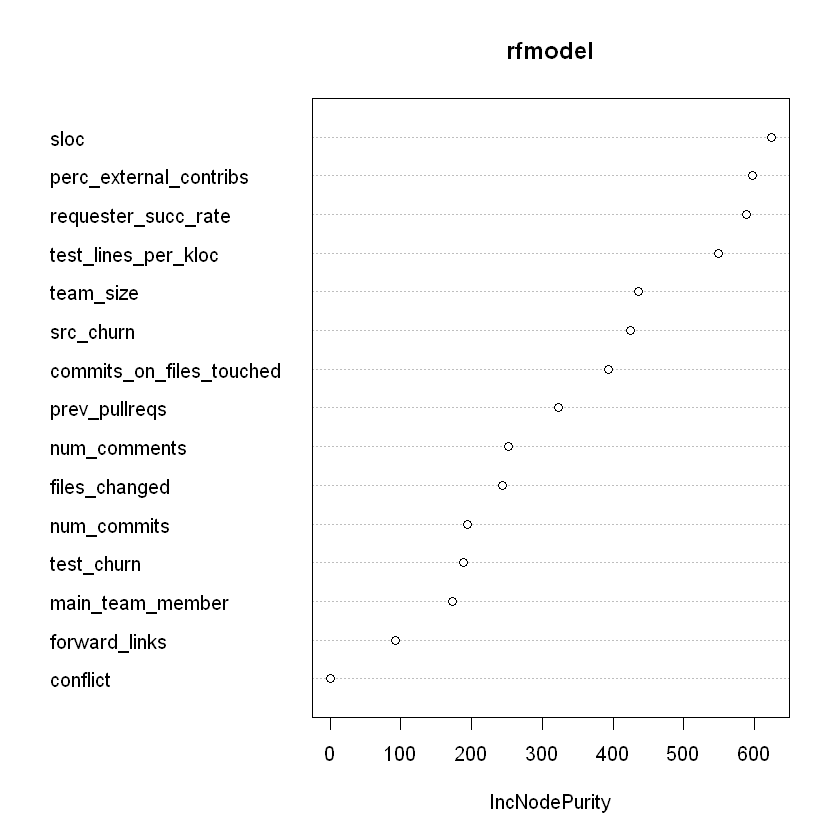


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1067467
                    % Var explained: 17.18
                           %IncMSE IncNodePurity
team_size                 55.13386     446.28879
num_commits               72.23103     198.65961
files_changed             71.16323     252.81569
perc_external_contribs    49.71697     606.05230
sloc                      69.26532     632.54590
src_churn                 78.97286     419.84621
test_churn                53.98454     185.79319
num_comments              78.29960     256.52231
commits_on_files_touched  36.76906     395.16757
test_lines_per_kloc       54.05075     547.49306
prev_pullreqs            105.10239     334.27090
requester_succ_rate      120.11519     629.64448
main_team_member          20.97936     180.93239
conflict        

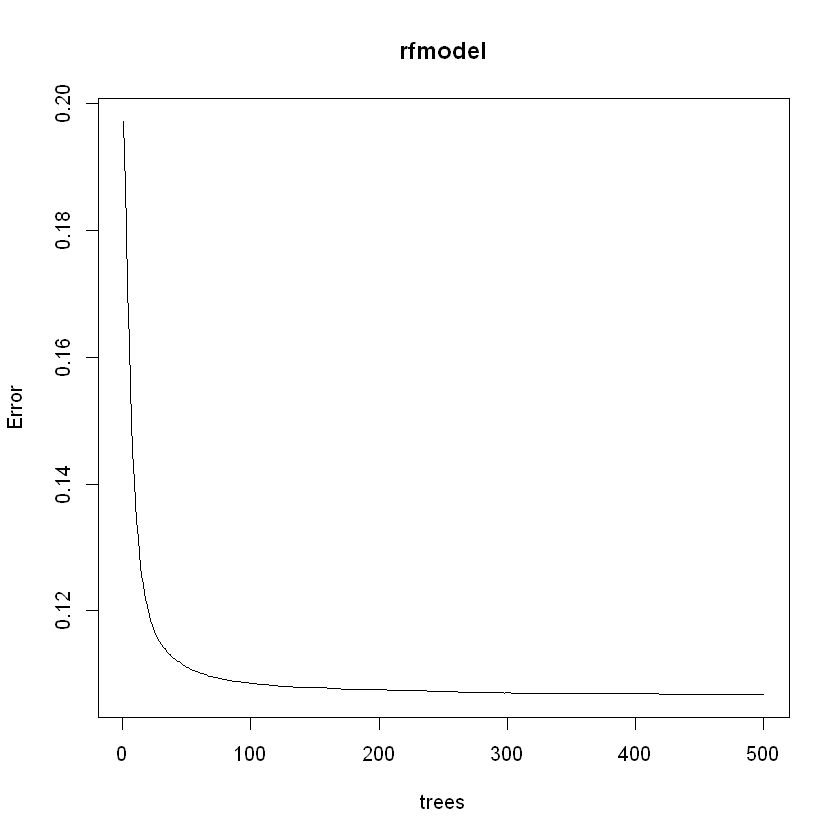

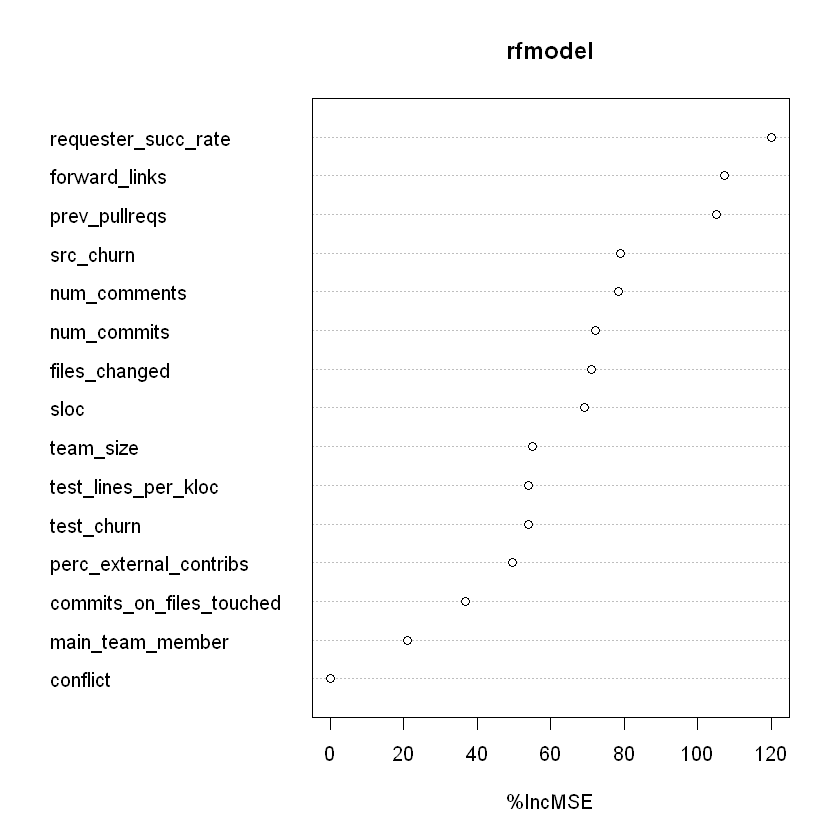

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.774331, ACC 0.616500, PREC 0.949377, REC 0.583489"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.849311"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

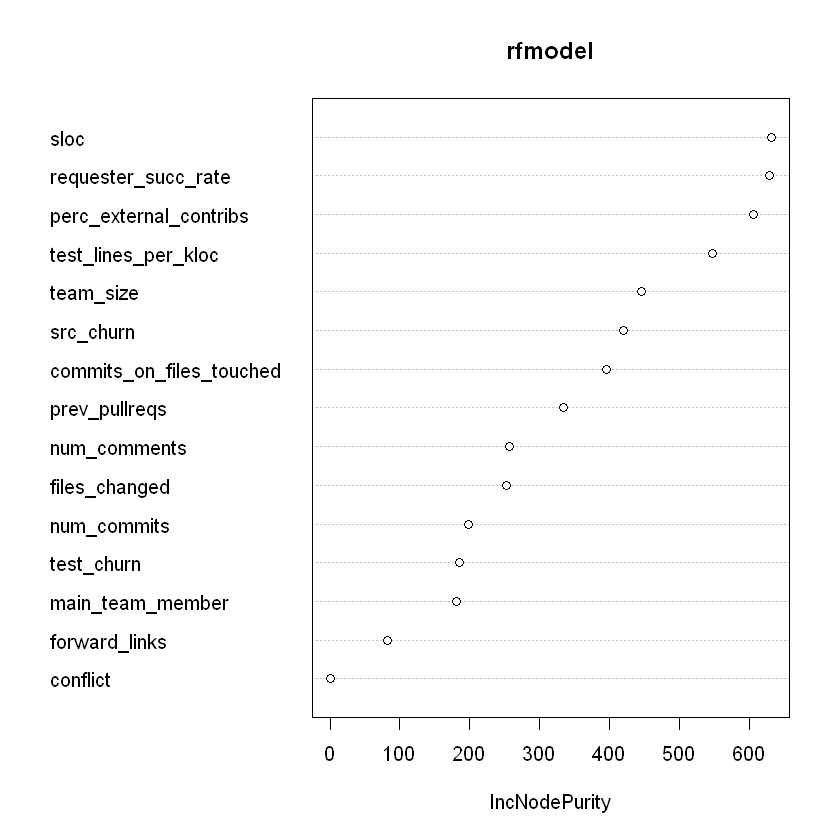


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1060214
                    % Var explained: 17.16
                           %IncMSE IncNodePurity
team_size                 53.86557     443.57008
num_commits               69.69702     197.75939
files_changed             67.39595     239.09654
perc_external_contribs    46.21229     593.00550
sloc                      69.36480     633.92739
src_churn                 80.37298     415.25935
test_churn                53.92294     194.24320
num_comments              80.98759     256.46793
commits_on_files_touched  35.01556     383.74951
test_lines_per_kloc       51.73988     542.92440
prev_pullreqs             96.93544     327.72150
requester_succ_rate      103.06878     642.99844
main_team_member          31.00616     167.46374
conflict        

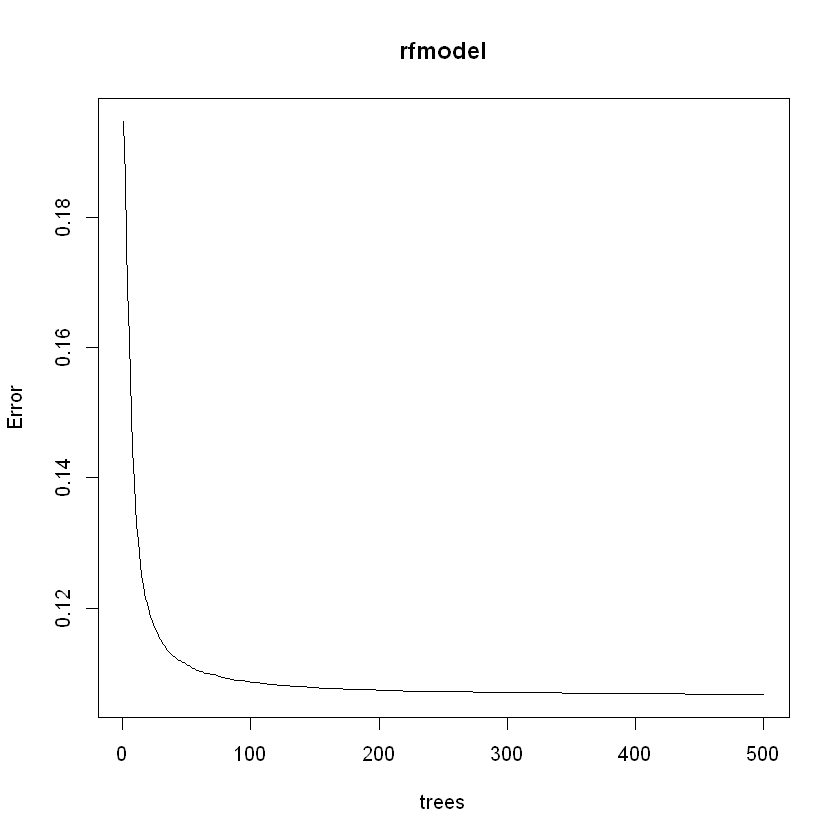

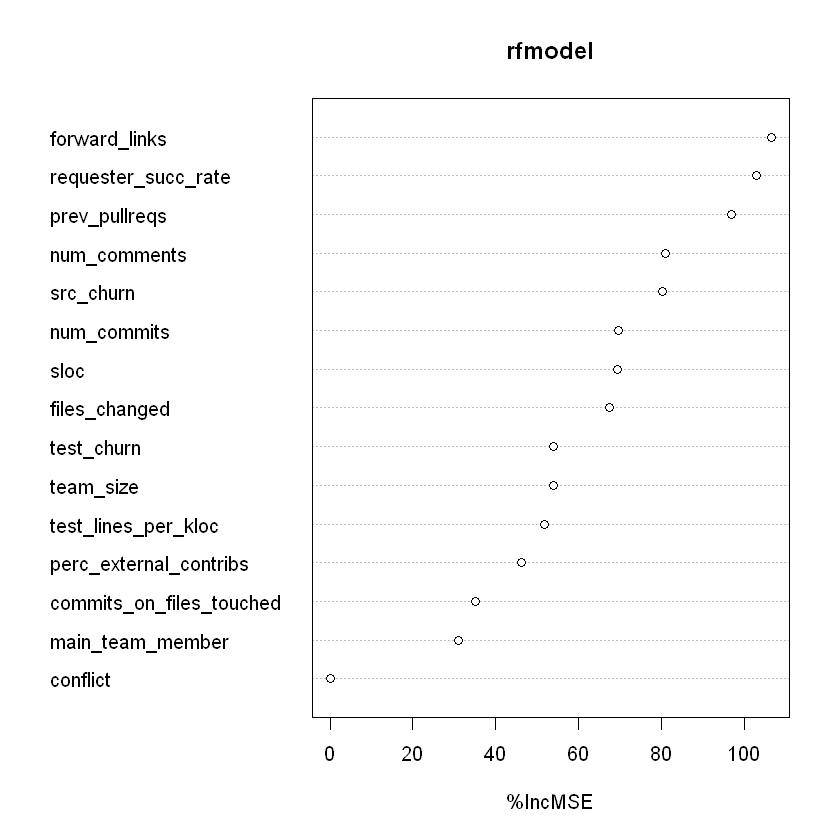

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.797569, ACC 0.629500, PREC 0.952185, REC 0.595523"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848533"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

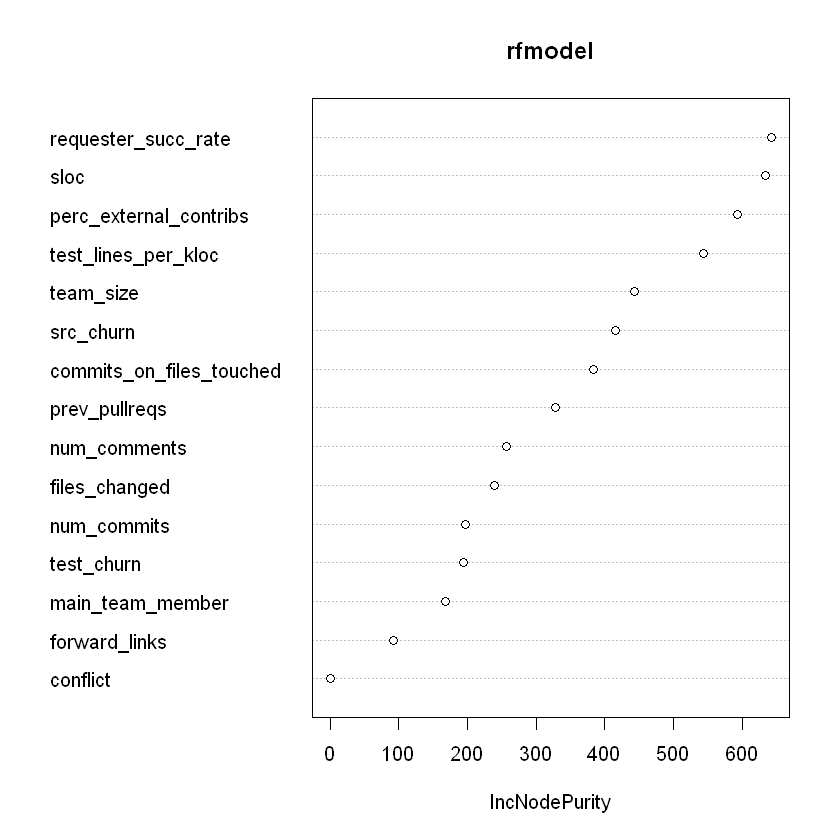


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1073523
                    % Var explained: 16.47
                           %IncMSE IncNodePurity
team_size                 61.27653     445.89410
num_commits               71.76111     195.60641
files_changed             58.77983     242.24717
perc_external_contribs    55.85354     603.23148
sloc                      66.75054     643.96444
src_churn                 73.19766     411.73338
test_churn                50.81670     180.09567
num_comments              71.72988     258.50547
commits_on_files_touched  44.26344     398.45695
test_lines_per_kloc       56.32037     549.71407
prev_pullreqs             95.54004     332.81819
requester_succ_rate      104.33462     623.07373
main_team_member          38.81028     165.34795
conflict        

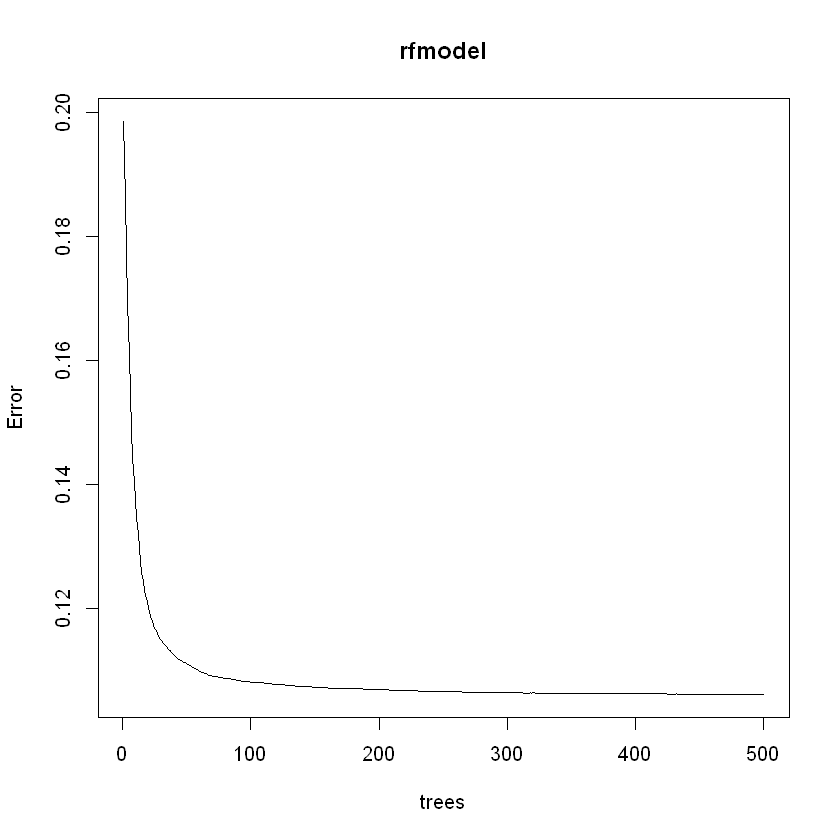

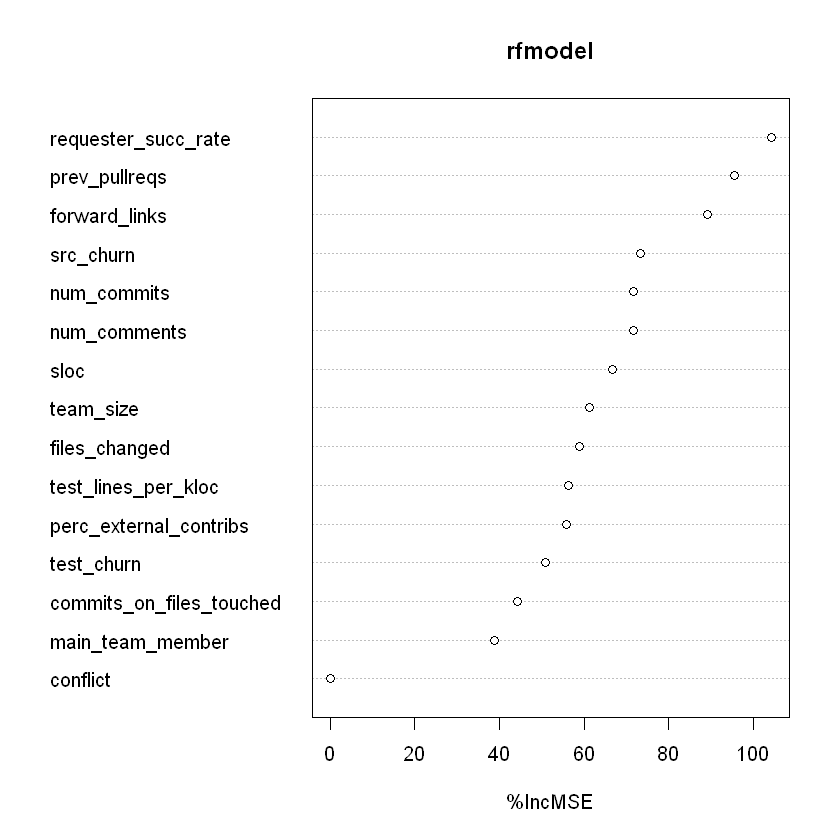

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.793938, ACC 0.637500, PREC 0.951201, REC 0.601303"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.846600"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

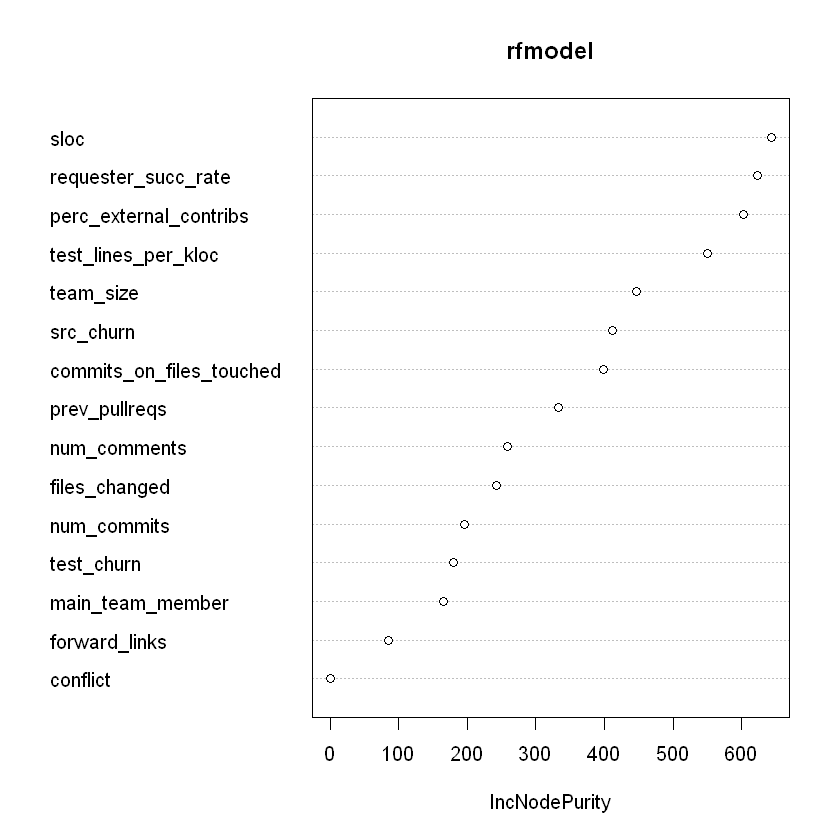


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1078781
                    % Var explained: 16.93
                           %IncMSE IncNodePurity
team_size                 60.69340     447.19095
num_commits               75.55712     196.54162
files_changed             64.04397     241.74647
perc_external_contribs    61.68927     616.38791
sloc                      66.34008     641.32385
src_churn                 74.56973     417.50093
test_churn                46.29186     179.77338
num_comments              72.06501     255.87903
commits_on_files_touched  38.64771     401.96547
test_lines_per_kloc       50.94084     552.01357
prev_pullreqs            105.42597     327.99294
requester_succ_rate      102.01748     643.39186
main_team_member          31.56816     175.67571
conflict        

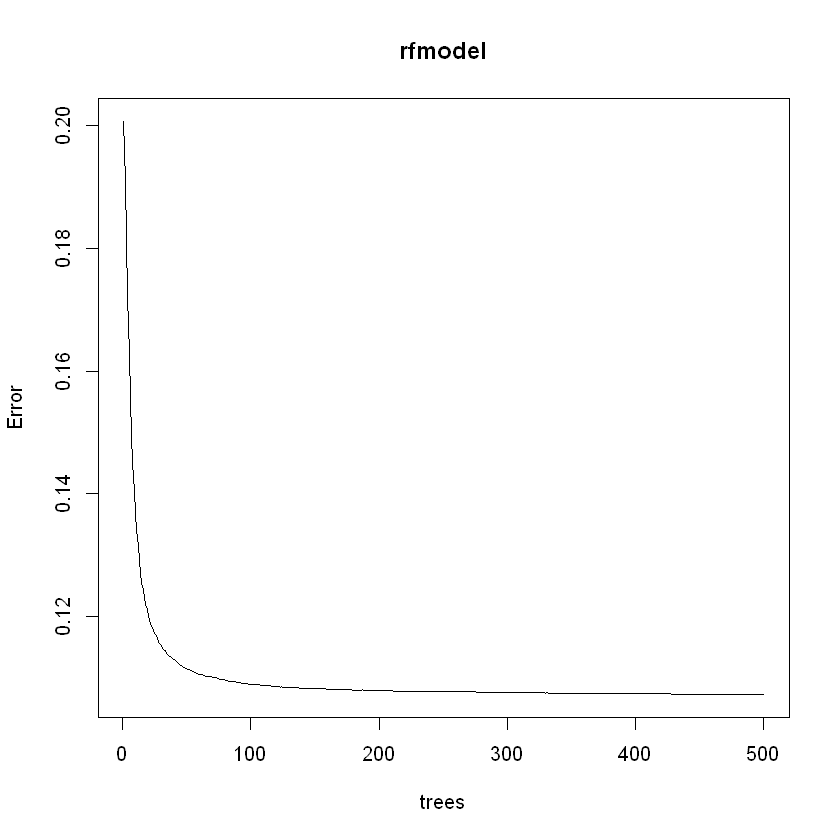

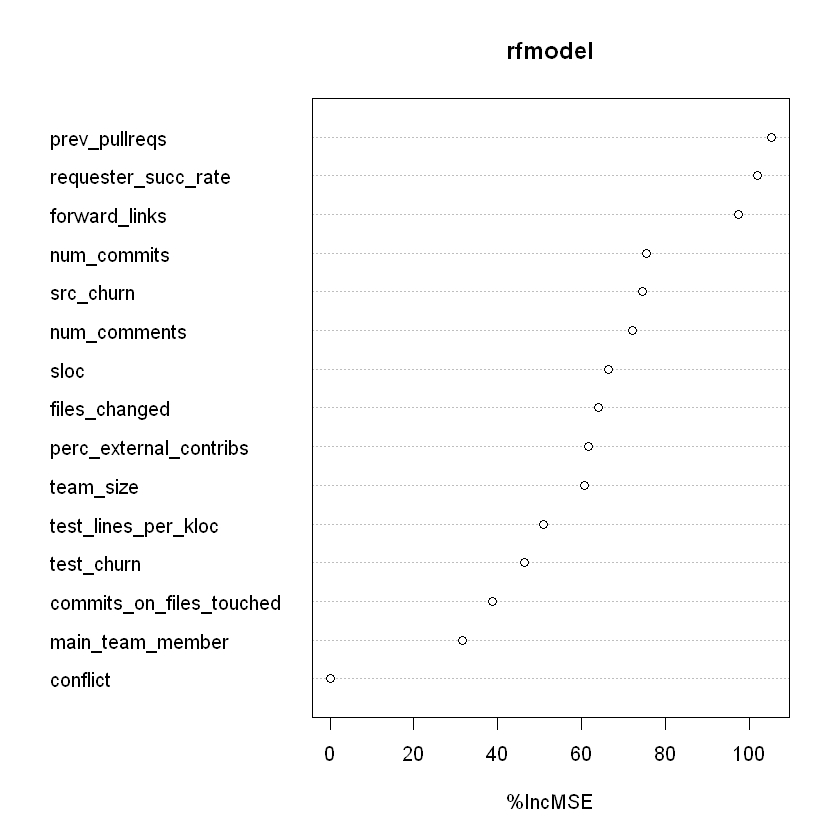

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.790035, ACC 0.633900, PREC 0.945701, REC 0.598834"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848689"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

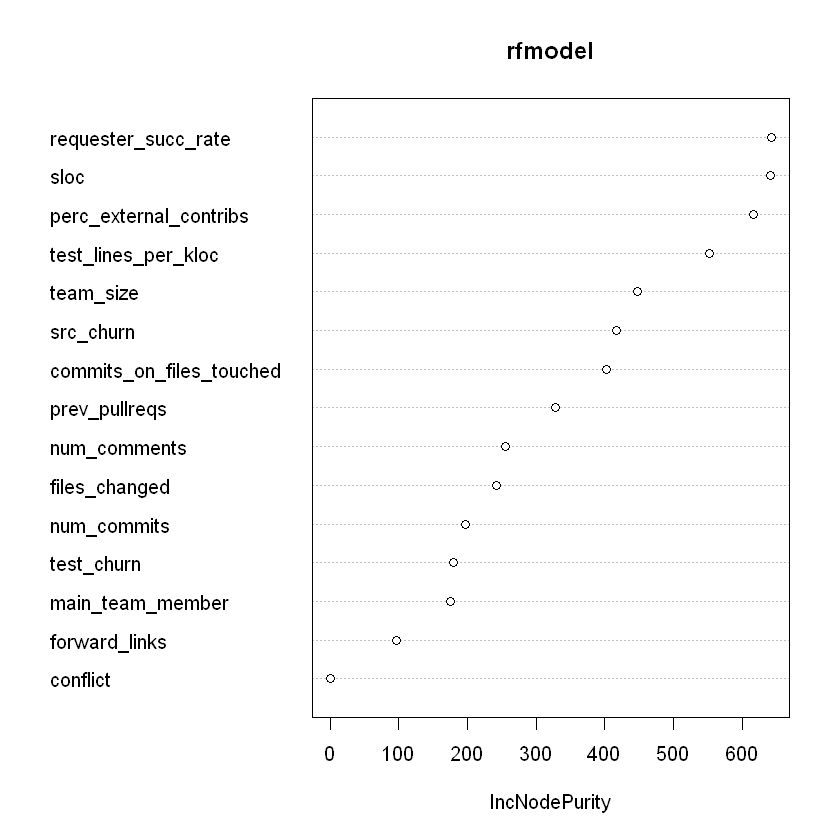


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1074329
                    % Var explained: 16.34
                           %IncMSE IncNodePurity
team_size                 58.47041      441.6602
num_commits               63.64673      189.7321
files_changed             55.69231      233.5581
perc_external_contribs    49.08732      609.3742
sloc                      64.49828      635.4252
src_churn                 82.14759      423.1017
test_churn                45.80232      185.0409
num_comments              70.86904      261.4932
commits_on_files_touched  33.42904      388.4977
test_lines_per_kloc       48.82136      550.8426
prev_pullreqs            106.04867      330.8036
requester_succ_rate      116.20516      630.4904
main_team_member          27.44887      170.5231
conflict        

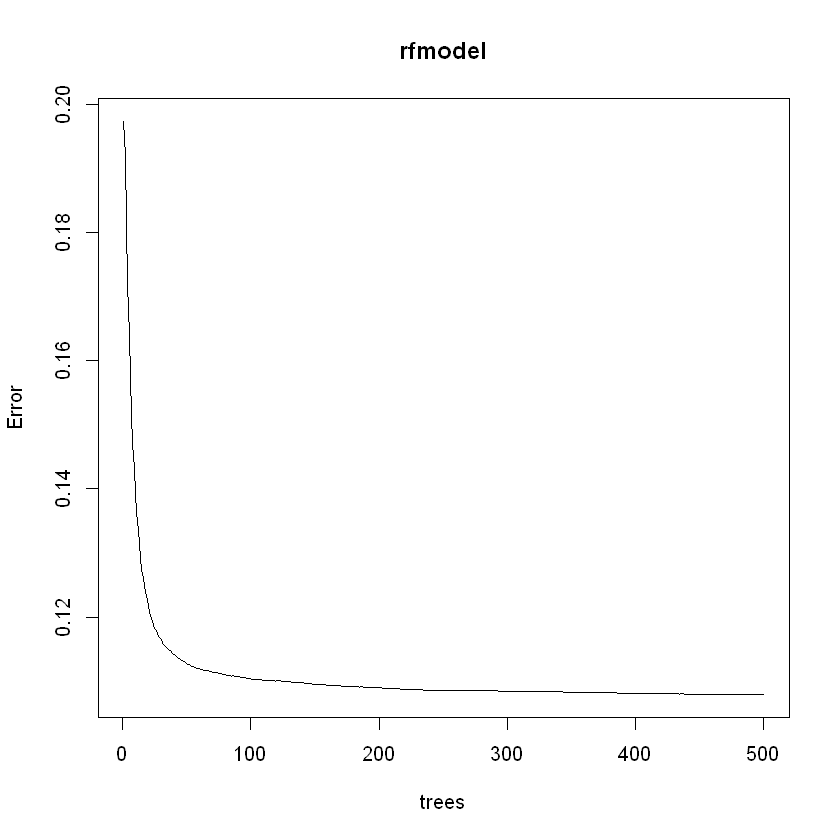

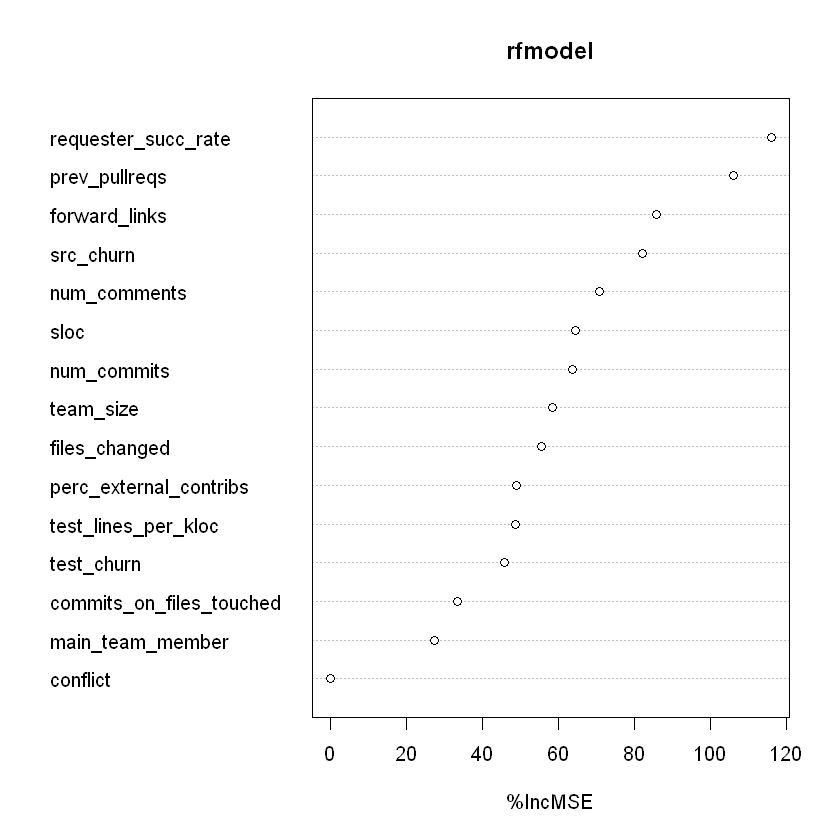

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.782124, ACC 0.617500, PREC 0.948230, REC 0.584639"
[1] "Finished Loop, converting restuls"
[1] "return restuls"
[1] "Outputing Restuls"


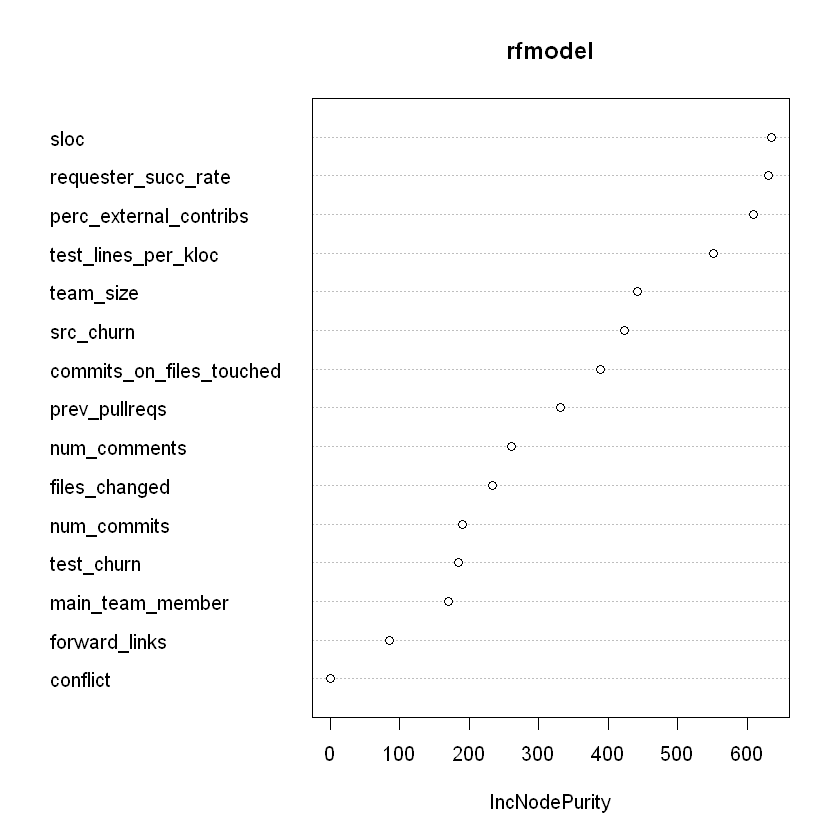

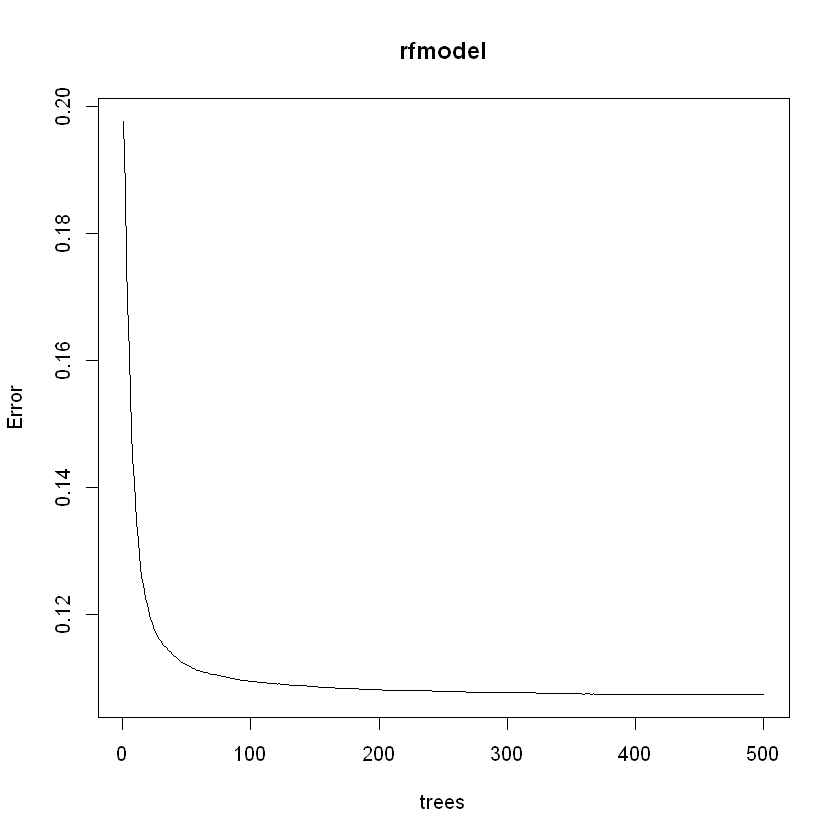

In [16]:
# Running regression
run.mergedecision.classifiers(all)

## Redefine the merge decision model with the dominant characteristics and rerun


[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.837778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1408472
                    % Var explained: -3.64
                           %IncMSE IncNodePurity
sloc                      8.708405      35.34377
test_lines_per_kloc      14.464642      33.65632
commits_on_files_touched  7.488956      23.01616


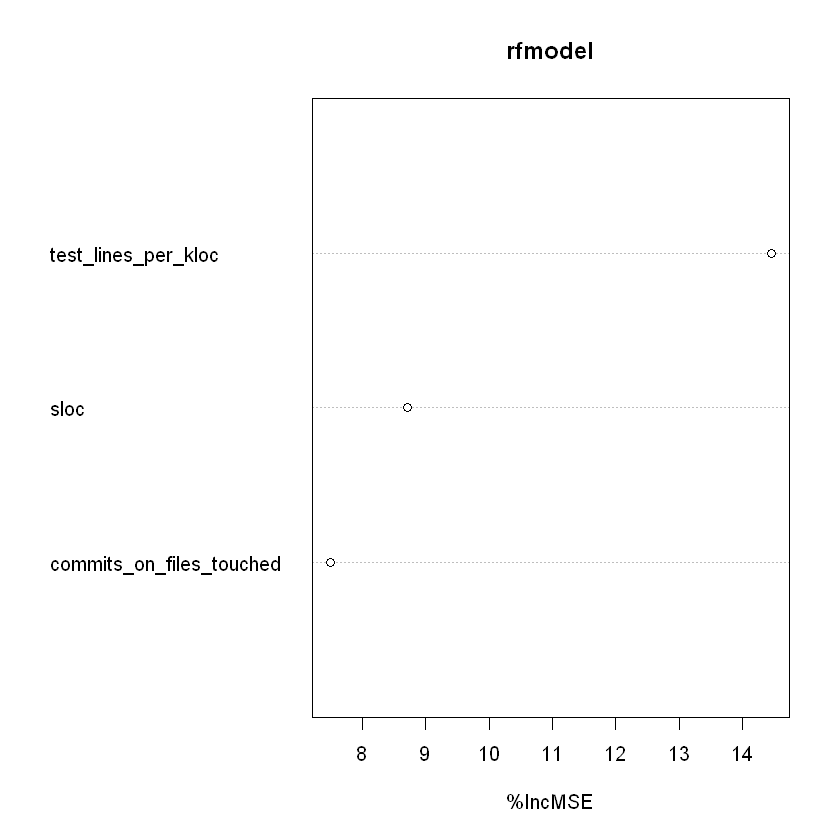

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.525199, ACC 0.480000, PREC 0.875000, REC 0.494253"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.854444"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

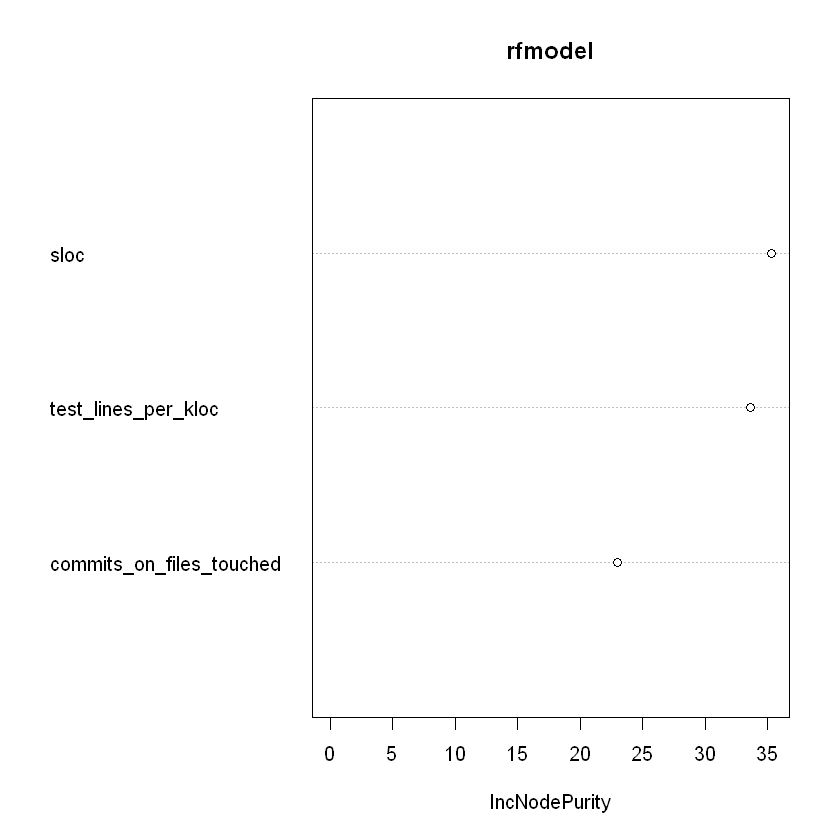


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.132761
                    % Var explained: -6.75
                          %IncMSE IncNodePurity
sloc                     3.731424      31.32465
test_lines_per_kloc      4.860919      28.28608
commits_on_files_touched 3.040353      20.38456


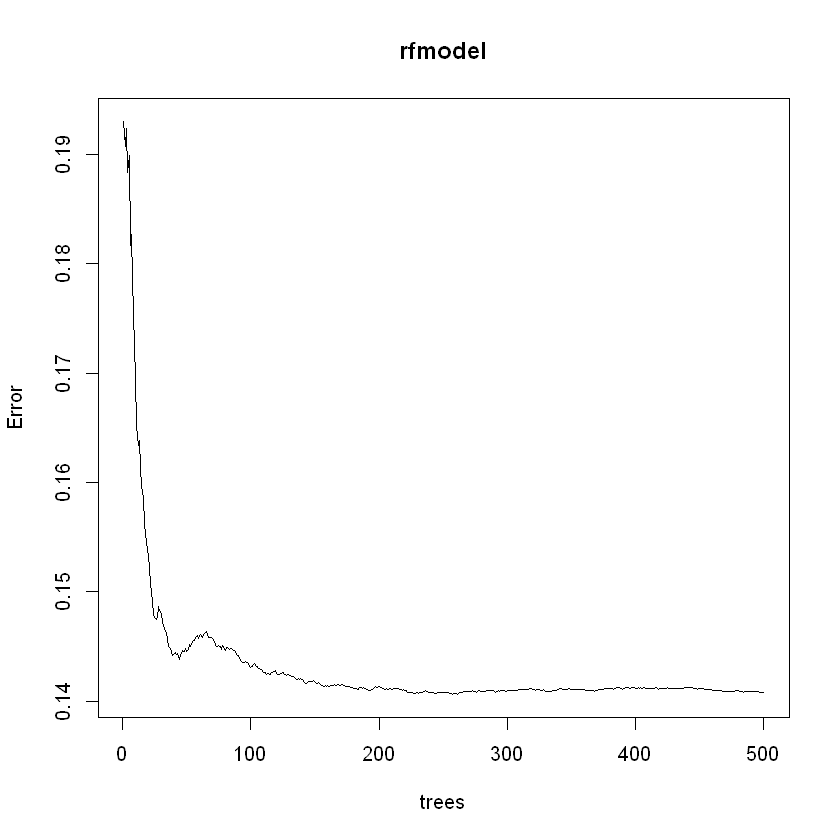

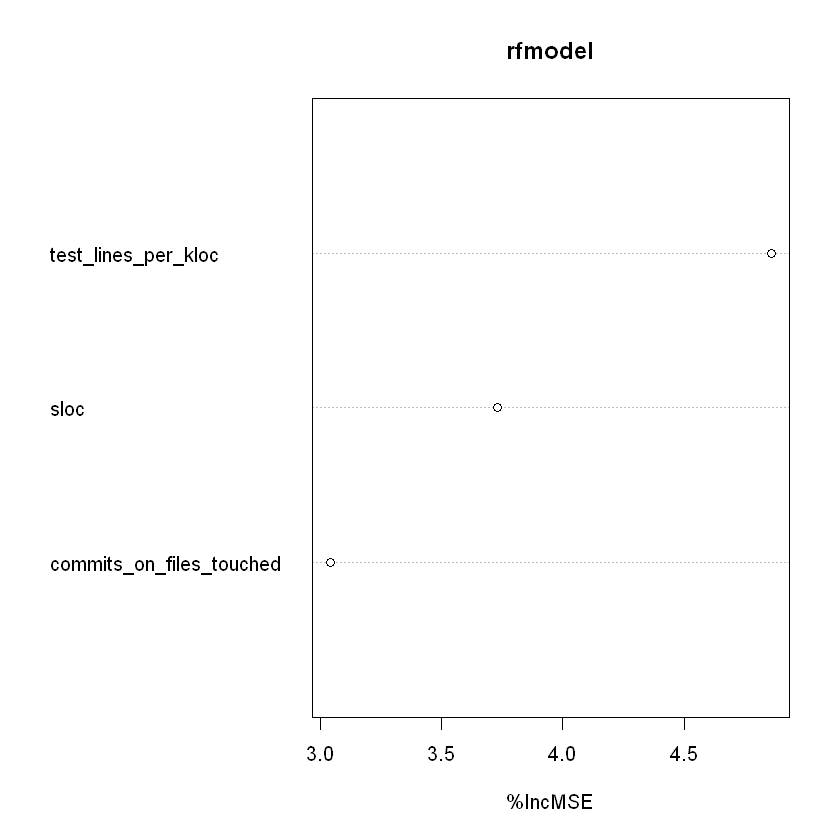

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.577652, ACC 0.520000, PREC 0.900000, REC 0.511364"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.842222"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

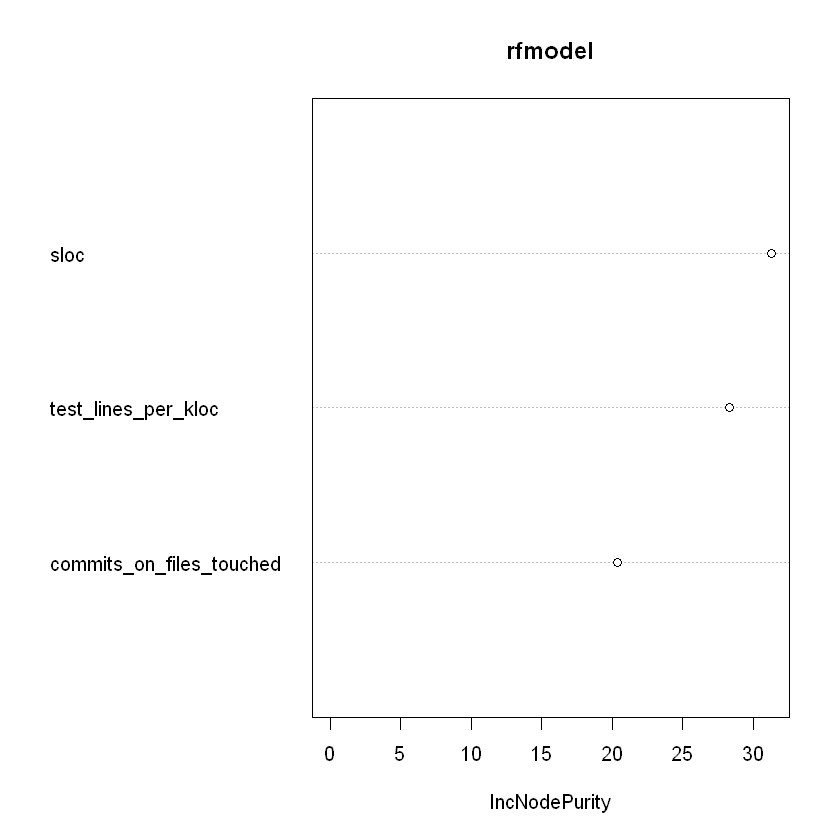


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1376594
                    % Var explained: -3.59
                           %IncMSE IncNodePurity
sloc                      7.206155      31.75476
test_lines_per_kloc      11.164823      29.87655
commits_on_files_touched  7.922859      21.00924


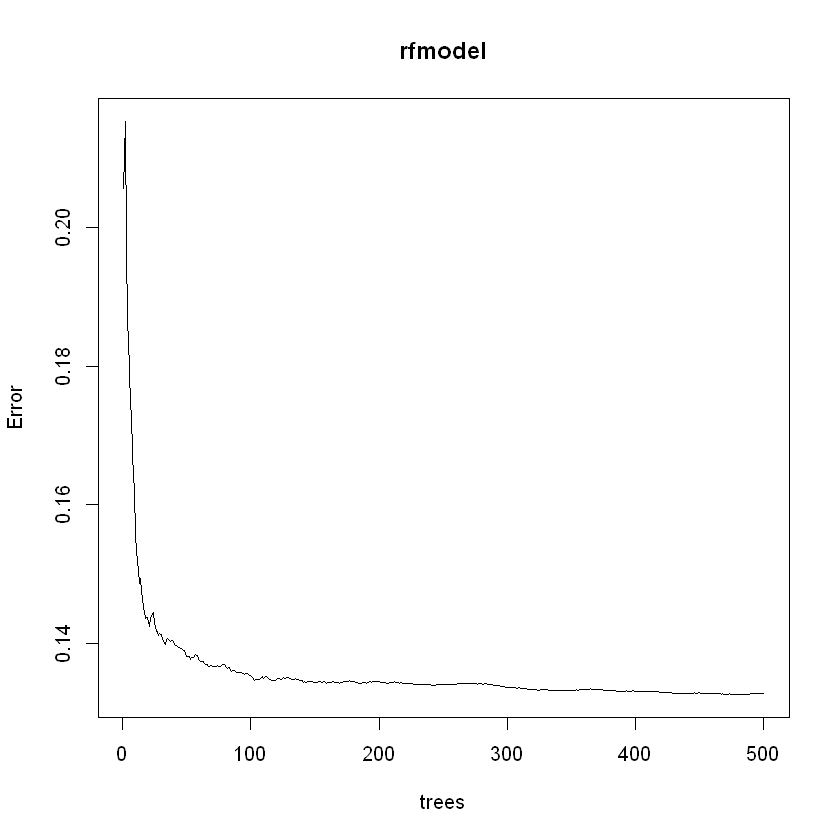

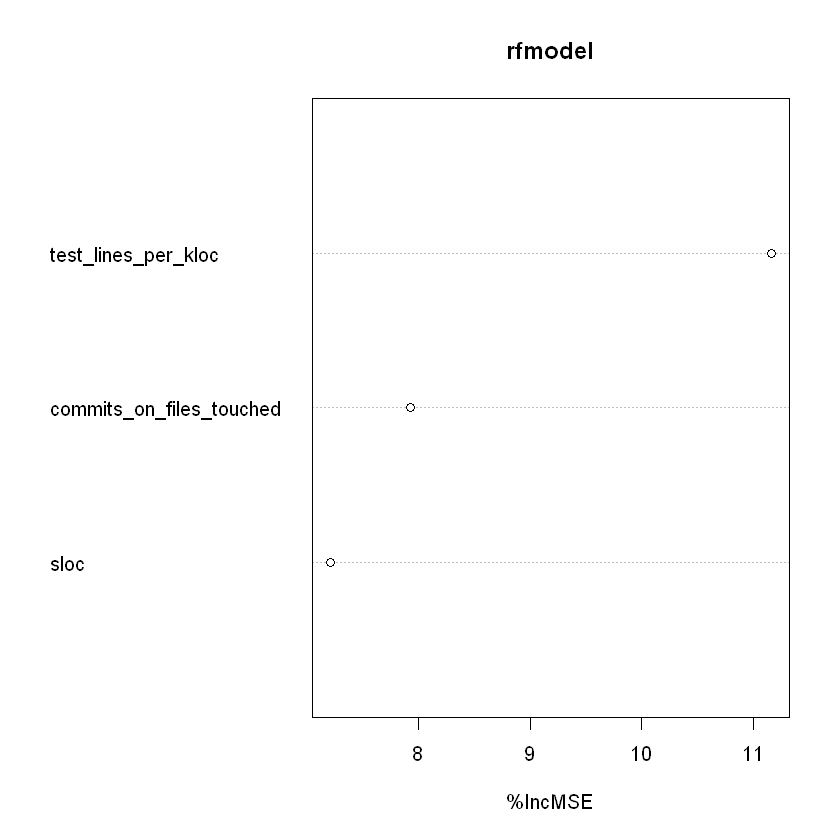

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.532247, ACC 0.540000, PREC 0.838111, REC 0.530120"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.845556"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

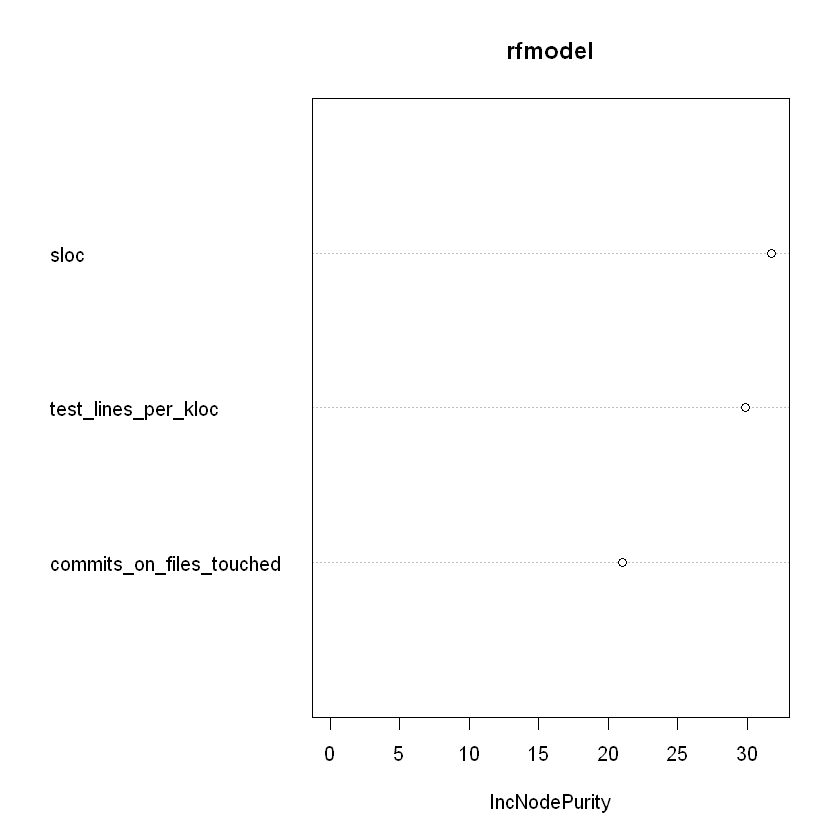


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1413498
                    % Var explained: -8.24
                          %IncMSE IncNodePurity
sloc                     5.717582      33.88052
test_lines_per_kloc      1.077394      30.14143
commits_on_files_touched 2.804006      23.17091


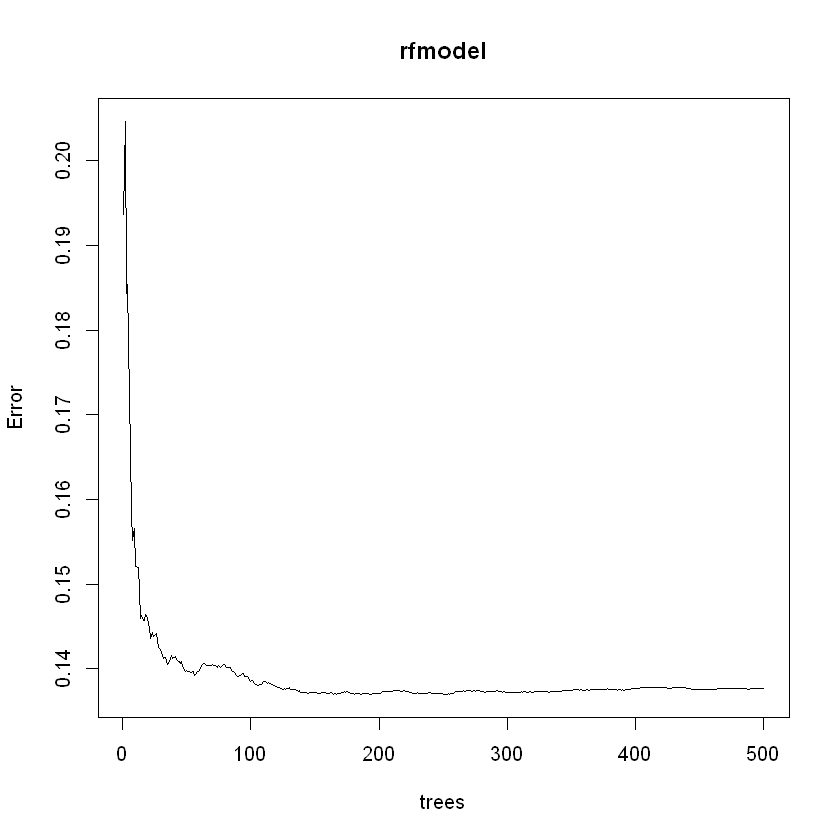

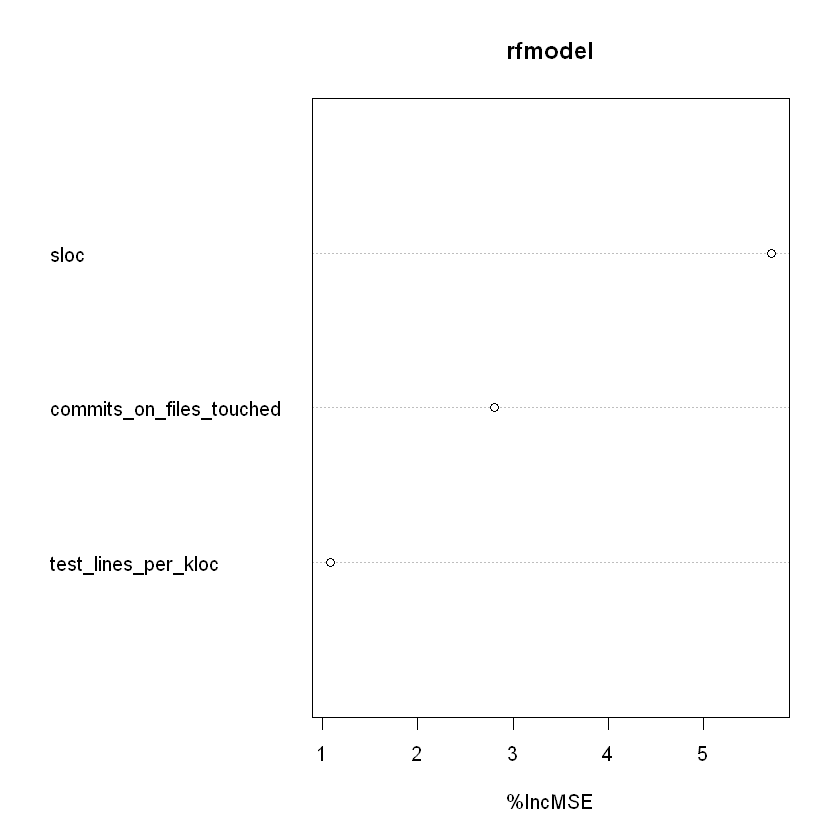

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.632157, ACC 0.560000, PREC 0.892375, REC 0.541176"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.863333"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

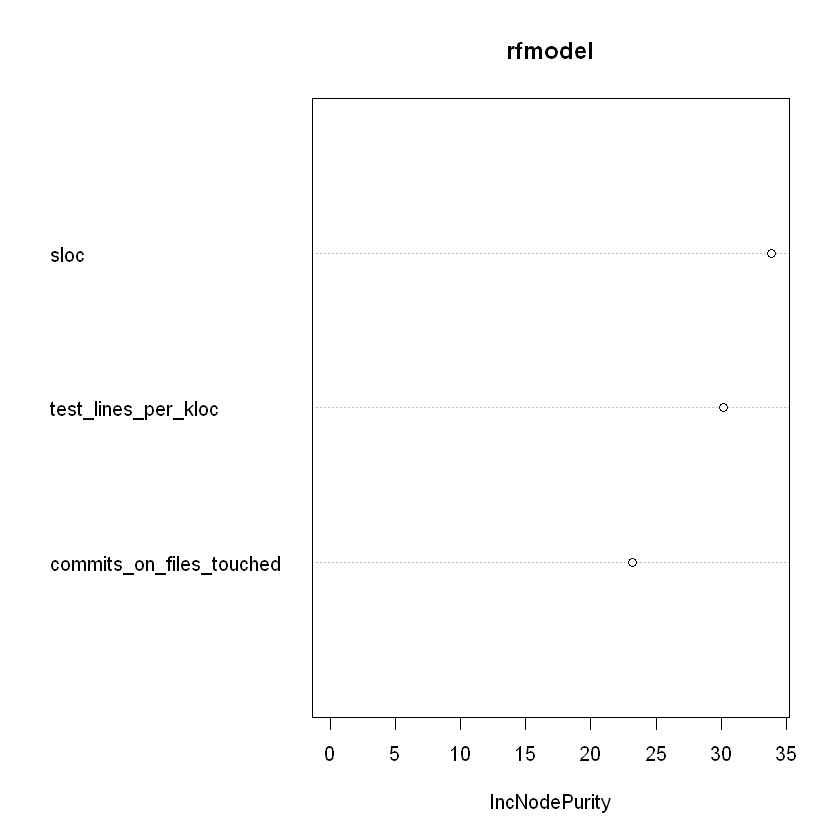


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1269685
                    % Var explained: -7.61
                             %IncMSE IncNodePurity
sloc                      5.29454401      30.53350
test_lines_per_kloc       4.07715071      27.21934
commits_on_files_touched -0.02477182      18.62254


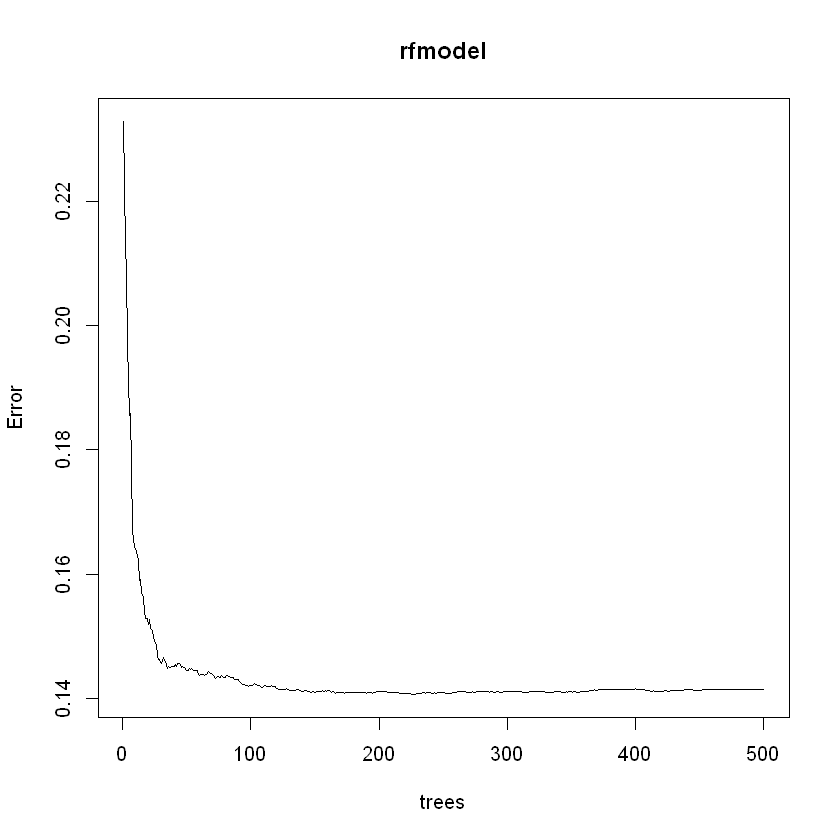

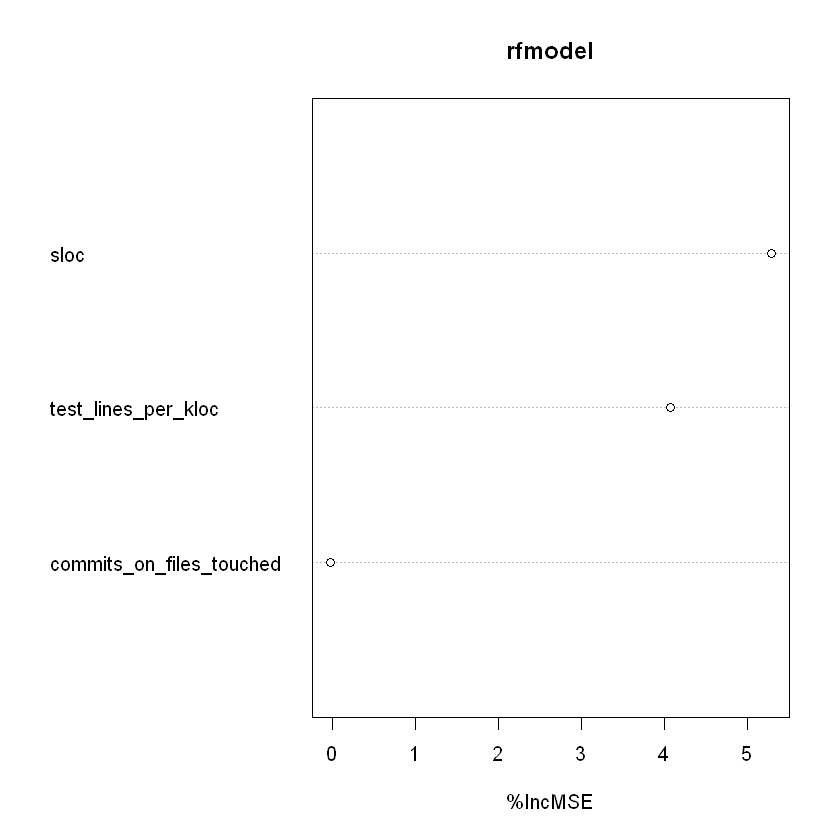

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.582745, ACC 0.530000, PREC 0.871795, REC 0.517647"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.857778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

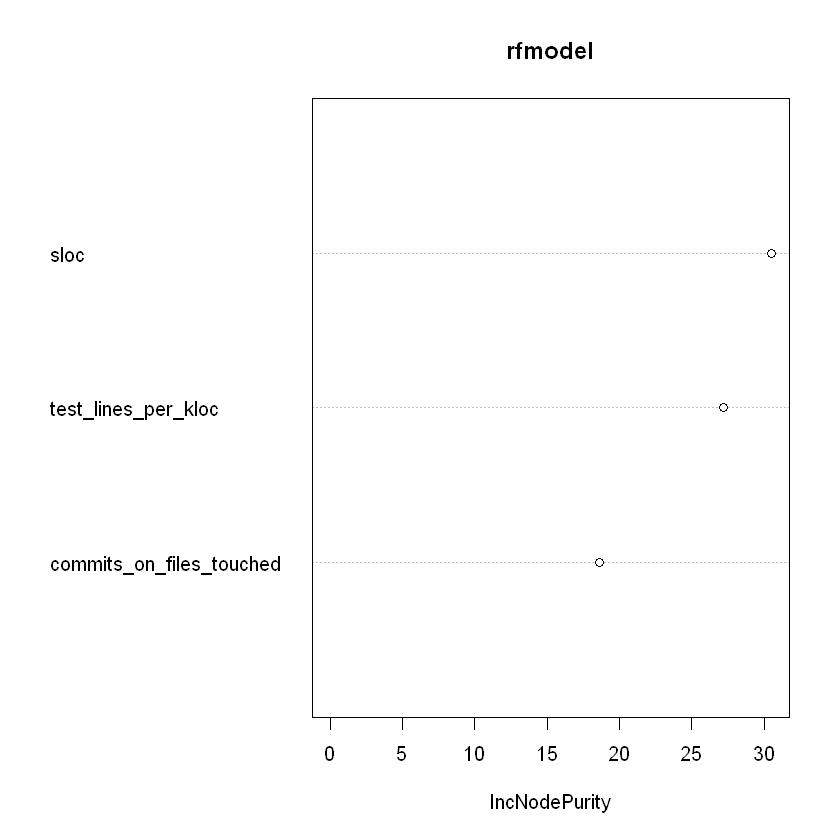


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1324449
                    % Var explained: -8.57
                            %IncMSE IncNodePurity
sloc                      4.9911107      31.63332
test_lines_per_kloc       2.7966384      30.68981
commits_on_files_touched -0.9395269      21.48065


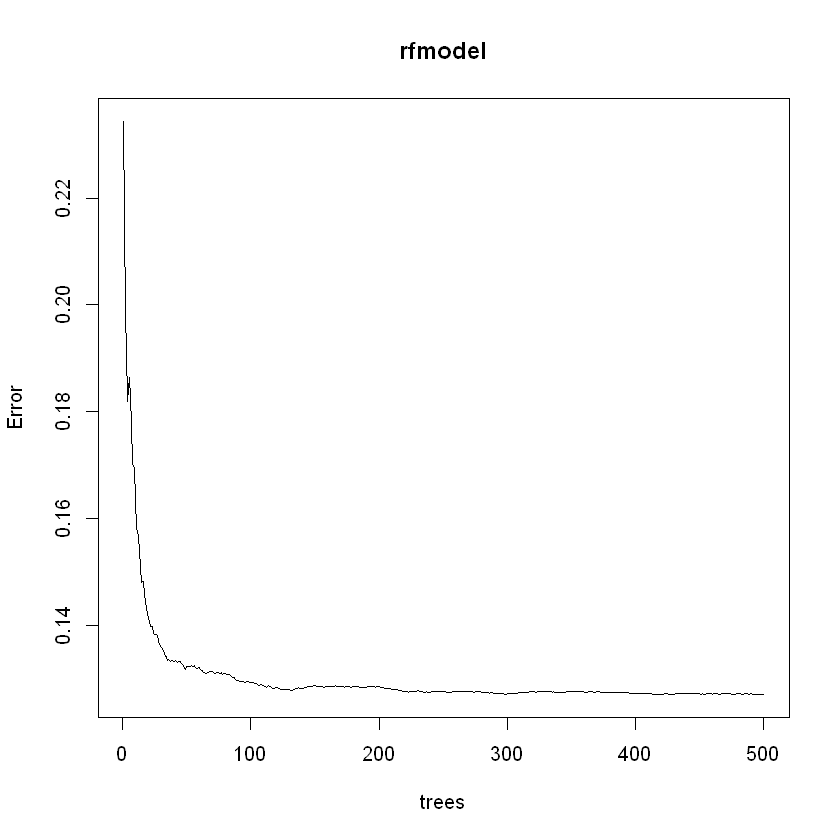

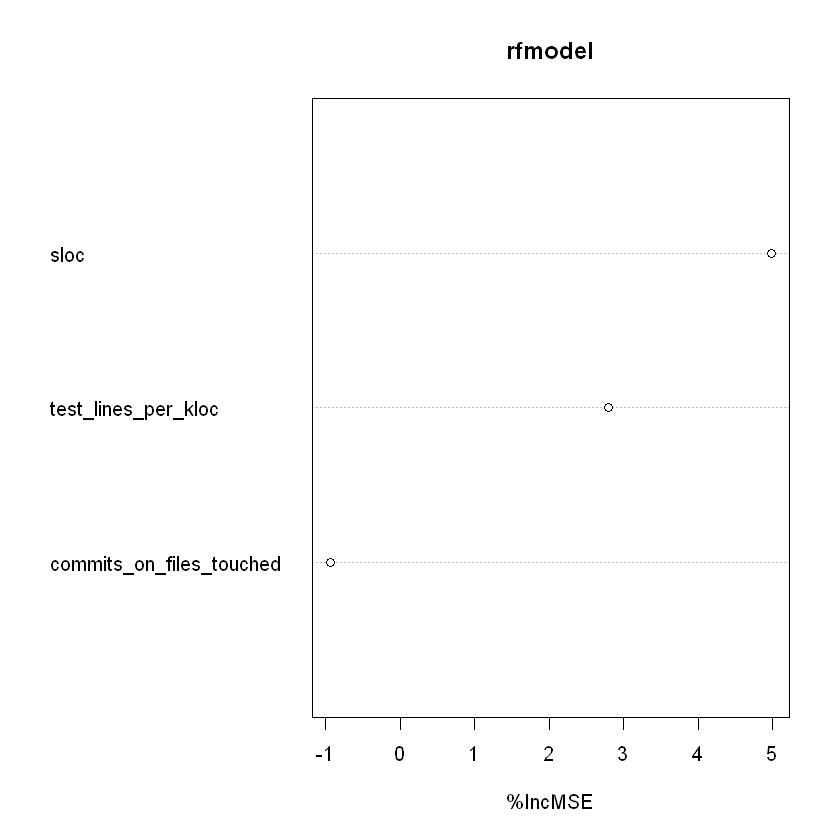

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.537283, ACC 0.505000, PREC 0.897436, REC 0.500000"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.837778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

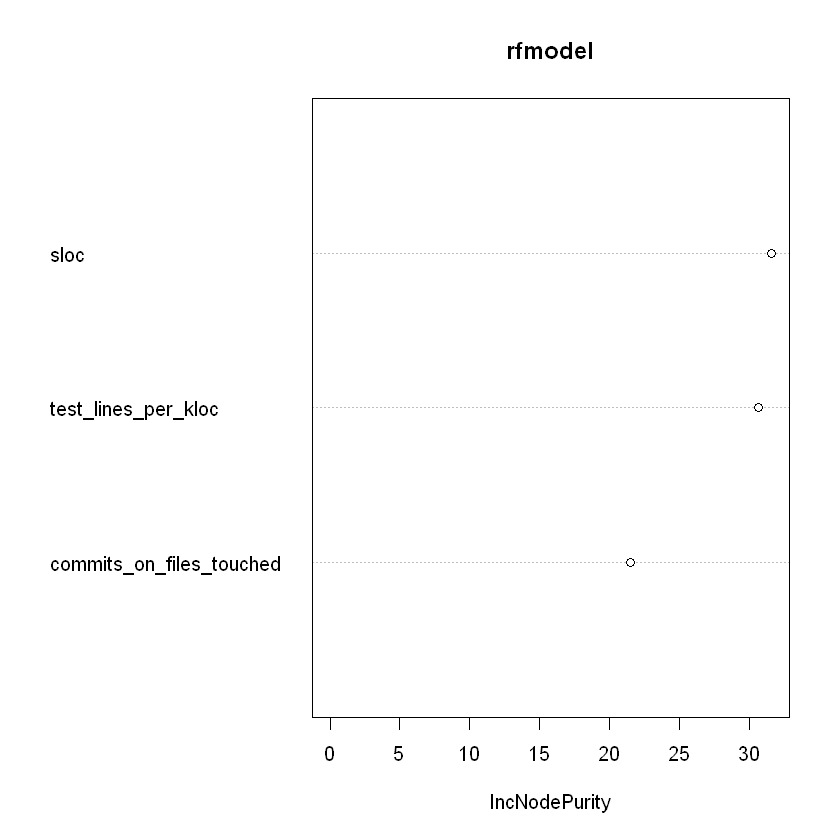


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1435614
                    % Var explained: -5.63
                          %IncMSE IncNodePurity
sloc                     5.551439      35.57401
test_lines_per_kloc      5.130853      33.37542
commits_on_files_touched 2.643510      23.87657


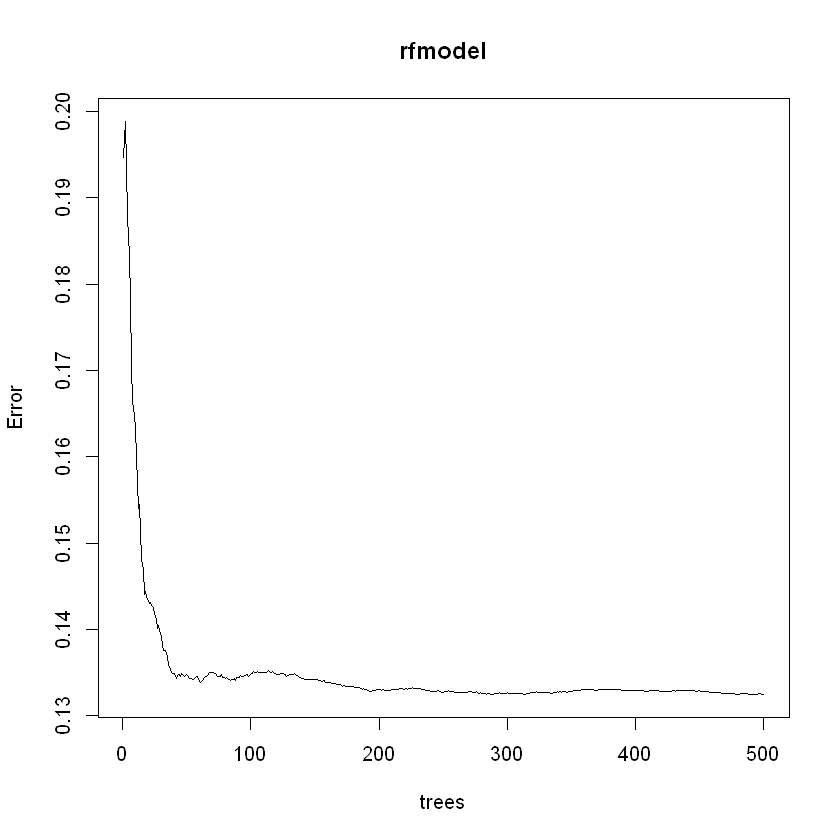

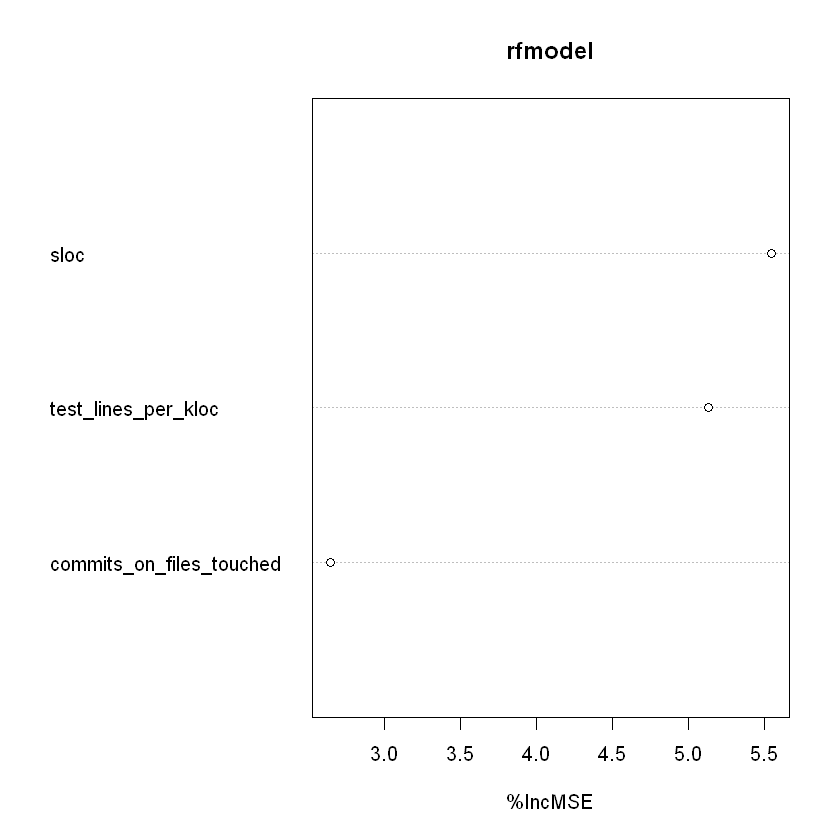

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.600784, ACC 0.550000, PREC 0.875000, REC 0.529412"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.856667"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

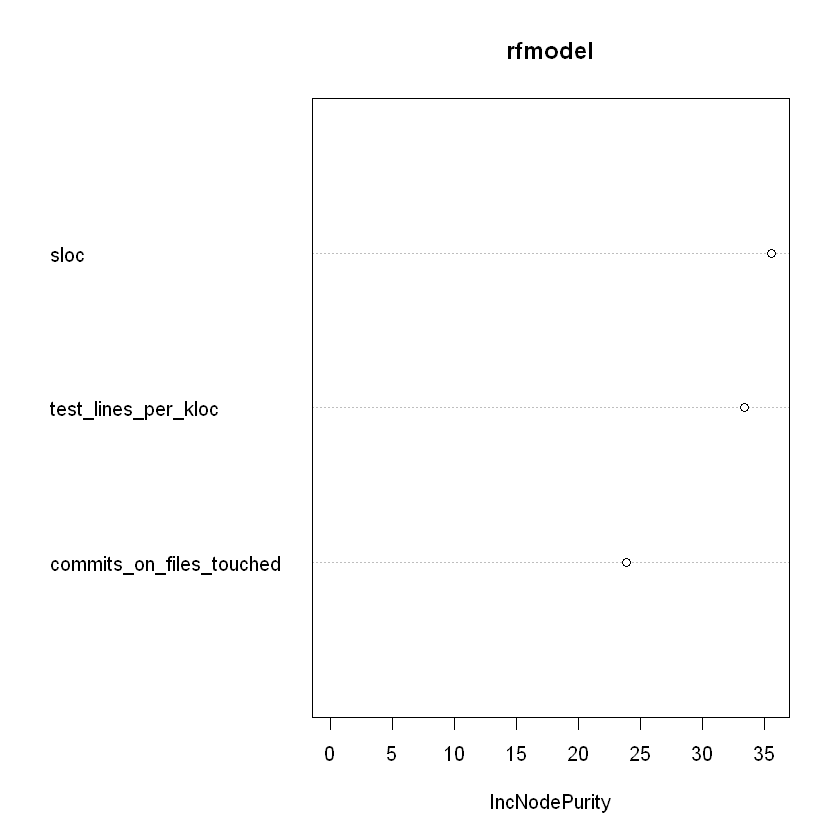


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1318515
                    % Var explained: -7.38
                          %IncMSE IncNodePurity
sloc                     2.444527      31.05199
test_lines_per_kloc      1.371562      28.90070
commits_on_files_touched 5.673683      23.40593


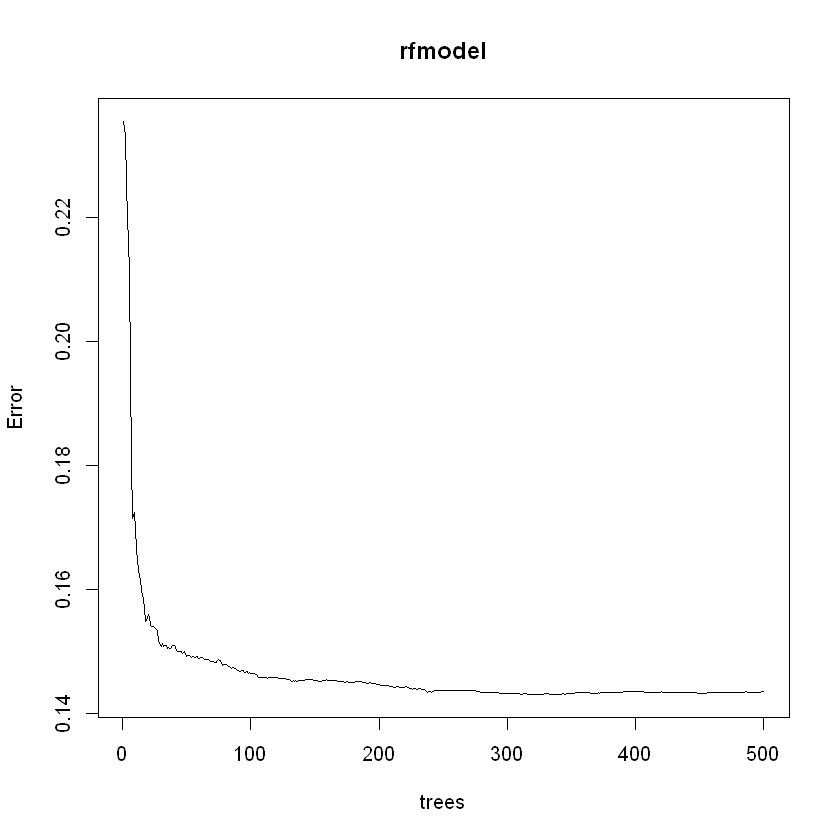

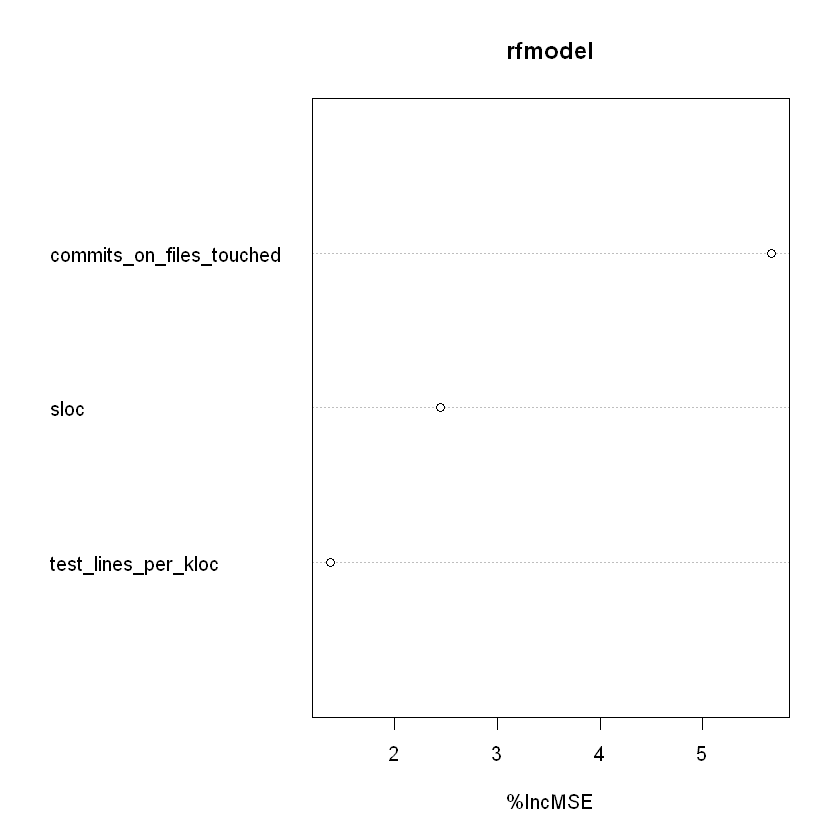

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.521118, ACC 0.530000, PREC 0.820971, REC 0.518519"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.844444"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

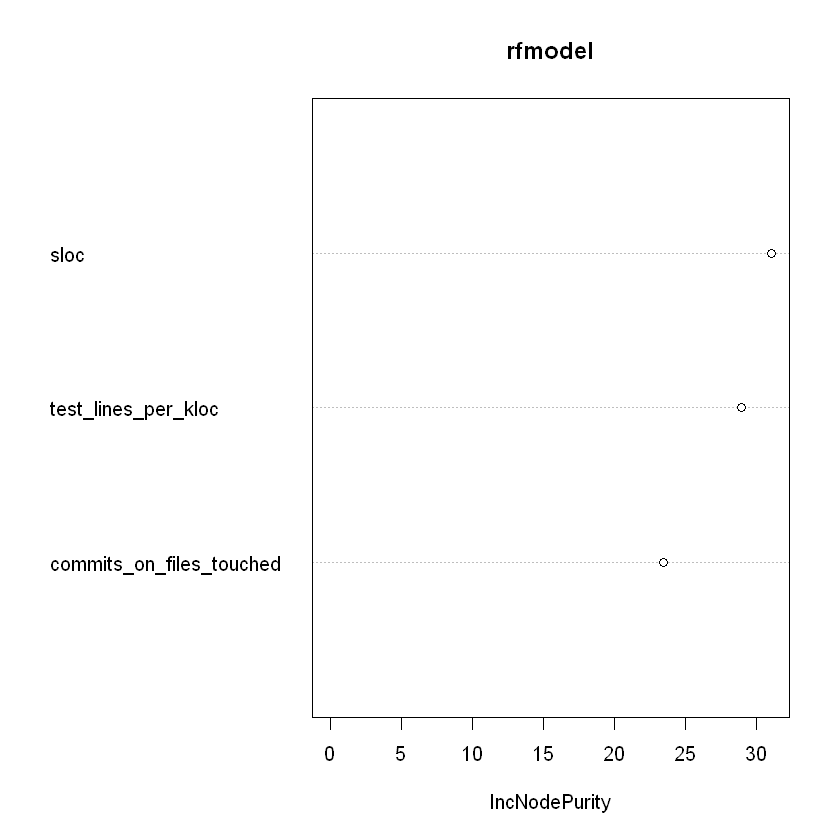


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1396873
                    % Var explained: -6.34
                            %IncMSE IncNodePurity
sloc                     3.39216725      30.58835
test_lines_per_kloc      5.69453153      30.04945
commits_on_files_touched 0.02755268      20.70402


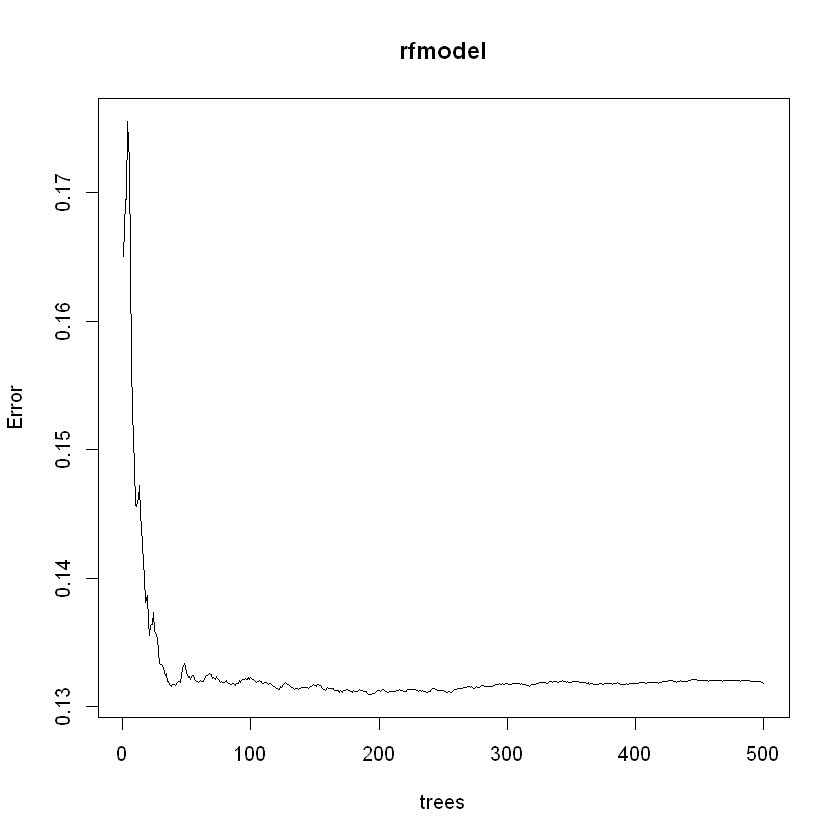

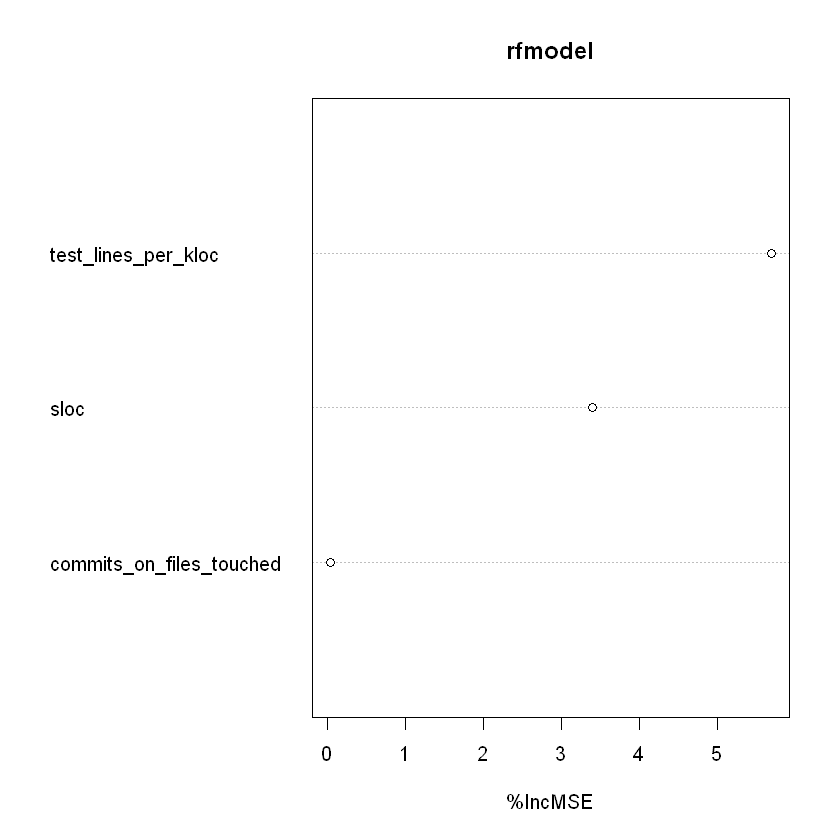

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.541528, ACC 0.500000, PREC 0.870250, REC 0.500000"
[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.837778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

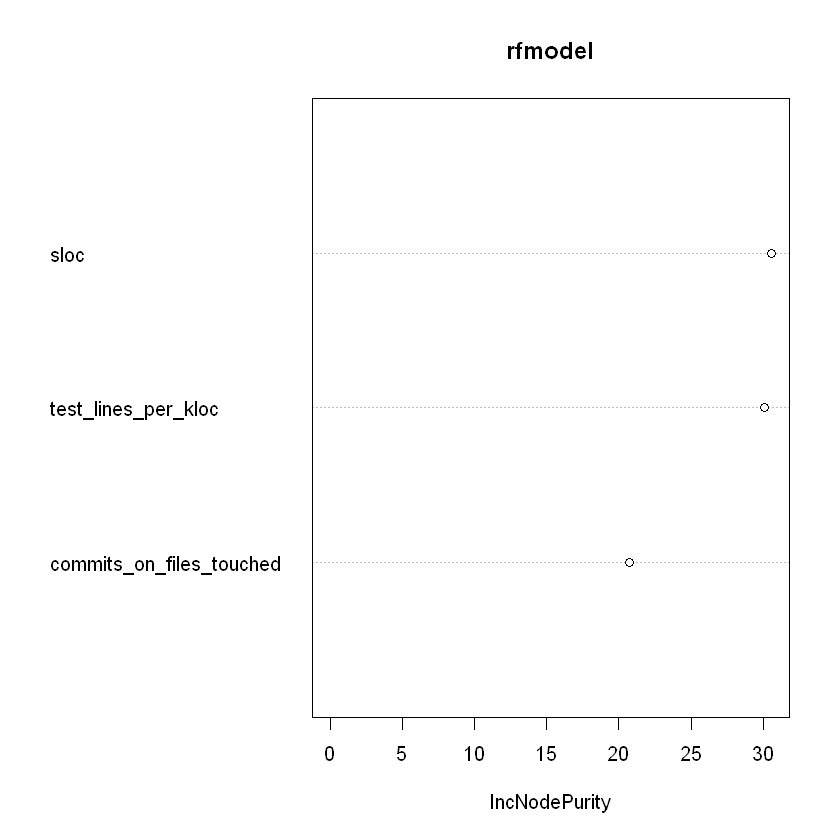


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1375744
                    % Var explained: -1.23
                           %IncMSE IncNodePurity
sloc                      3.356574      33.91630
test_lines_per_kloc      12.157960      33.66781
commits_on_files_touched  4.875564      24.04329


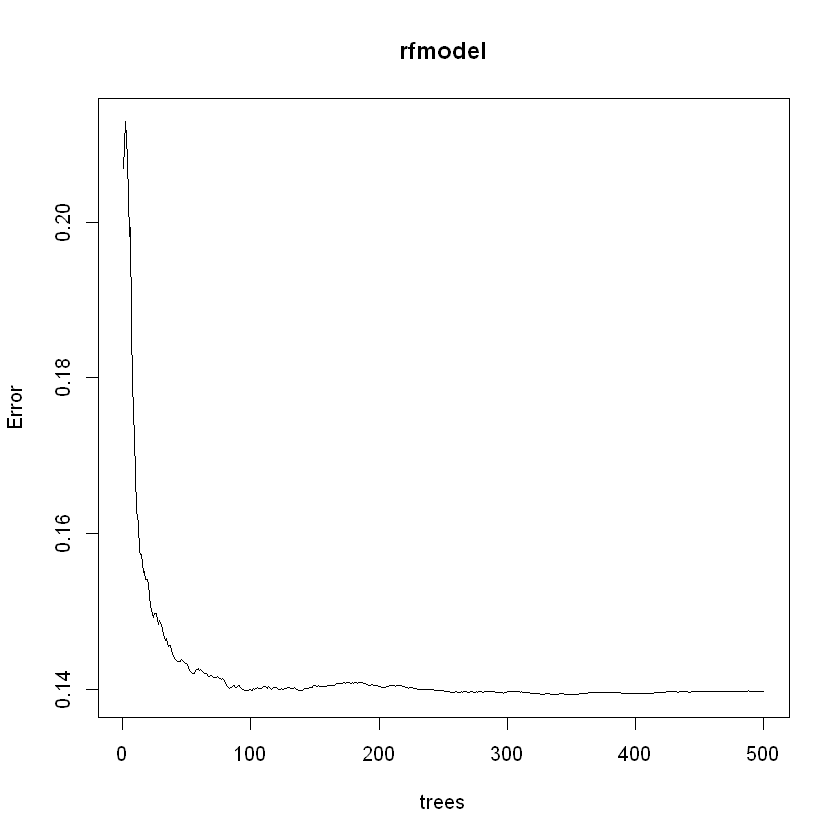

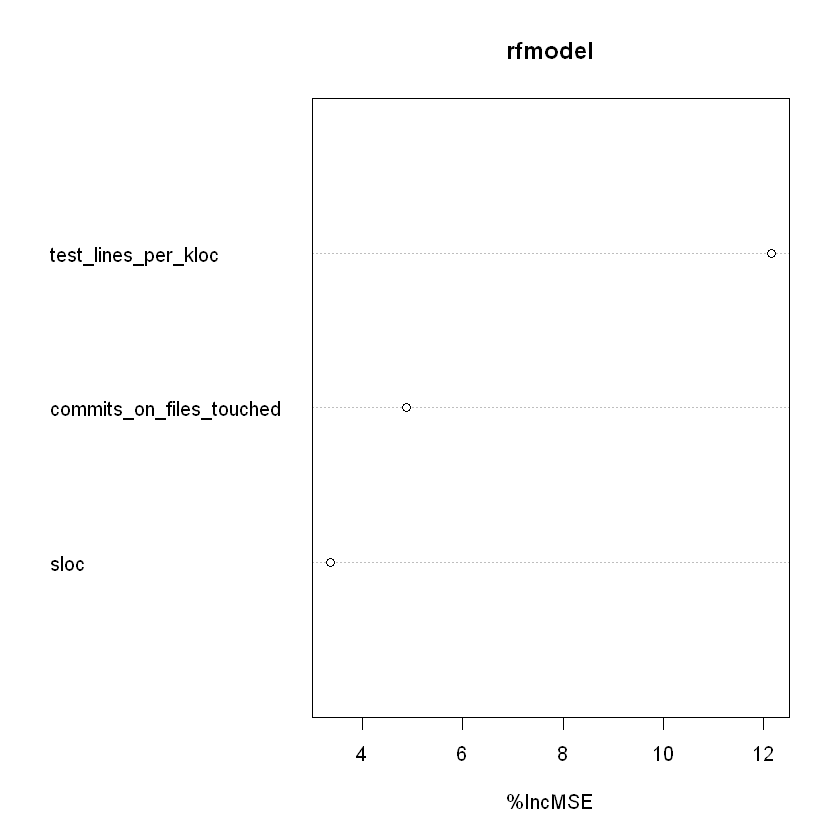

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.522353, ACC 0.510000, PREC 0.852941, REC 0.500000"
[1] "Finished Loop, converting restuls"
[1] "return restuls"
[1] "Outputing Restuls"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.849444"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

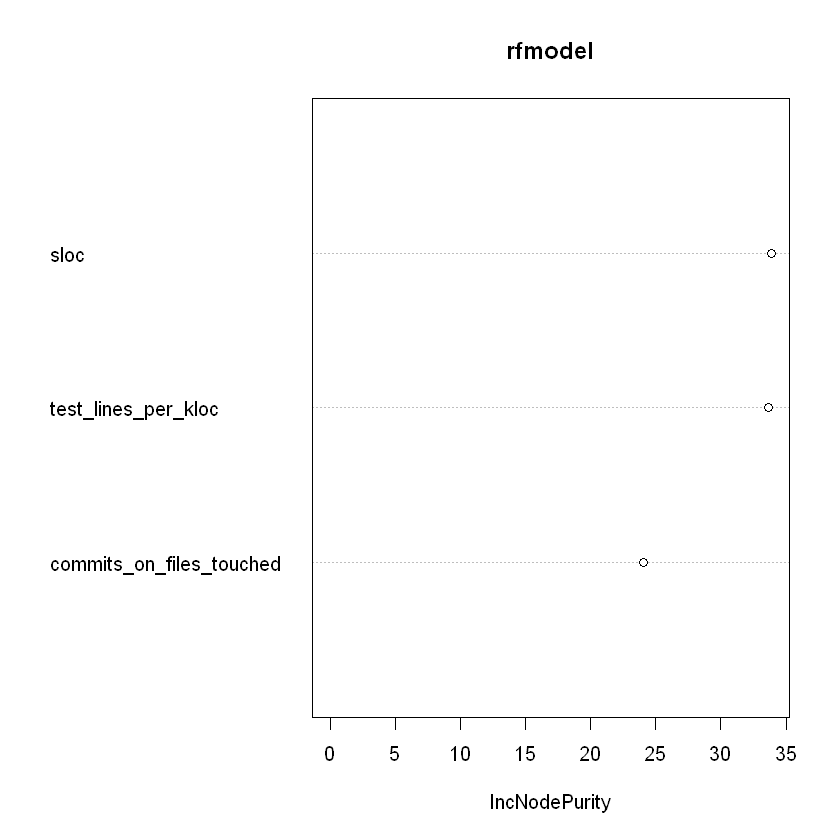


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.129412
                    % Var explained: -1.19
                          %IncMSE IncNodePurity
sloc                     22.60267      265.4380
test_lines_per_kloc      19.70684      244.5818
commits_on_files_touched 17.14047      148.6698


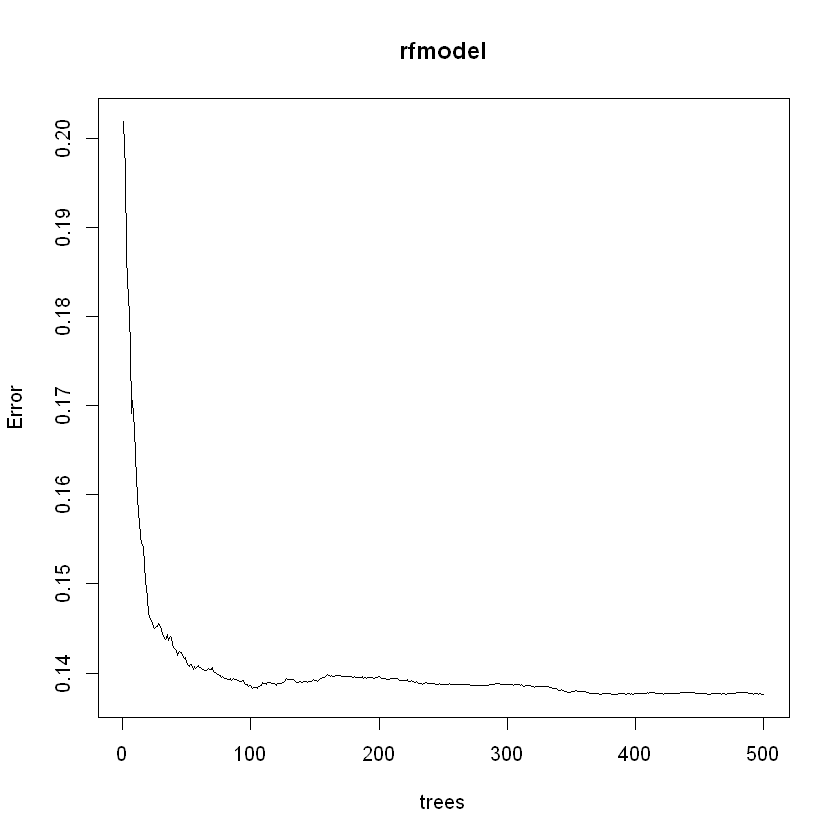

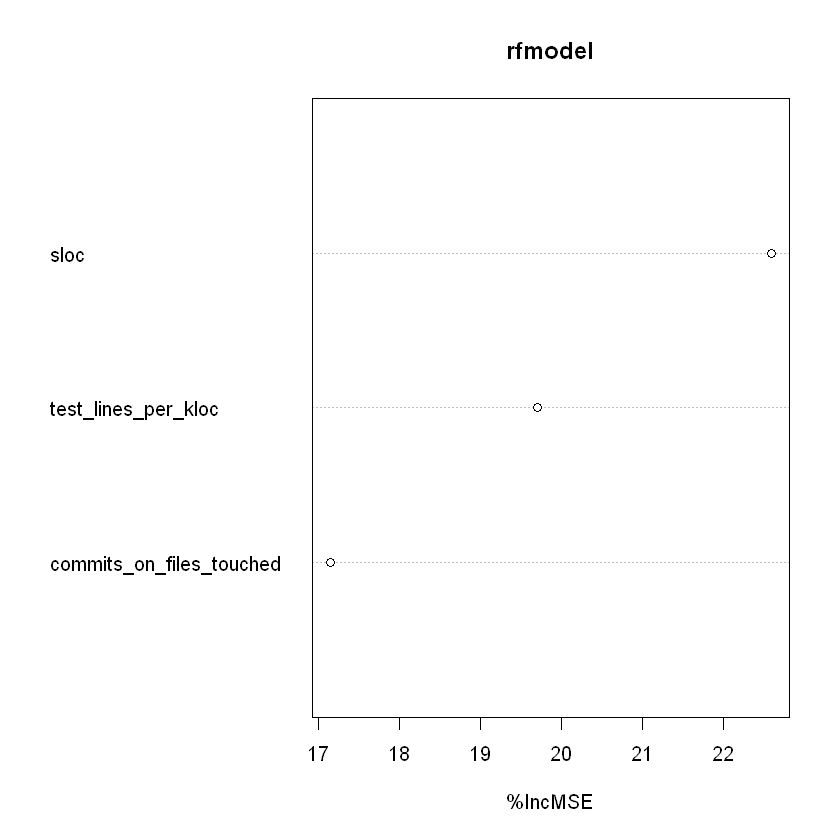

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.587445, ACC 0.524000, PREC 0.896194, REC 0.514943"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.846444"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

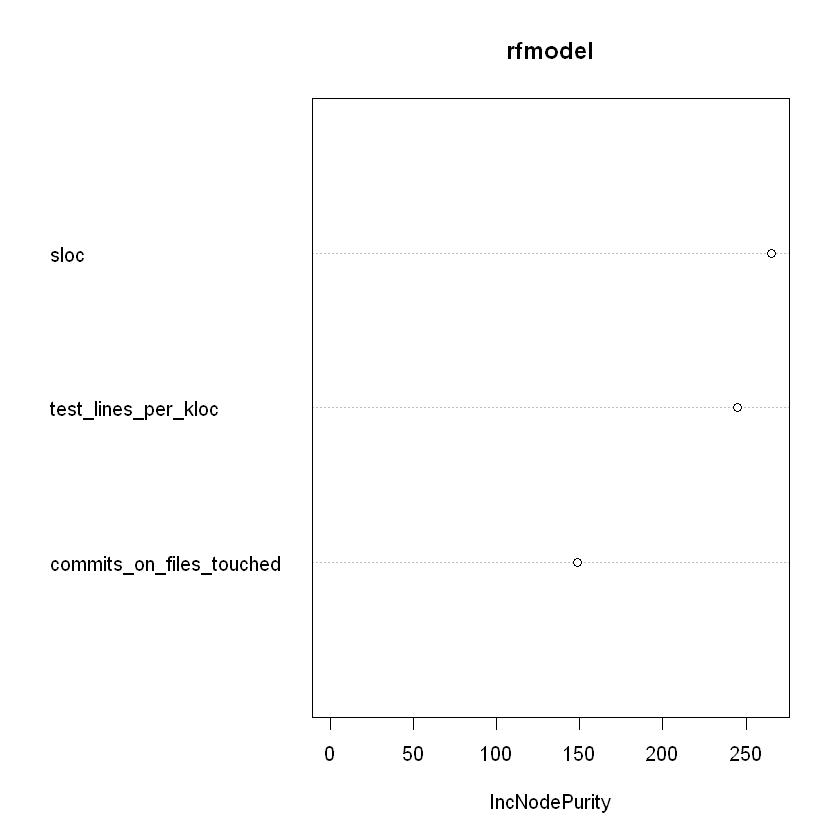


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1301588
                    % Var explained: -0.14
                          %IncMSE IncNodePurity
sloc                     31.66138      270.4341
test_lines_per_kloc      23.10490      248.7565
commits_on_files_touched 21.44052      152.2680


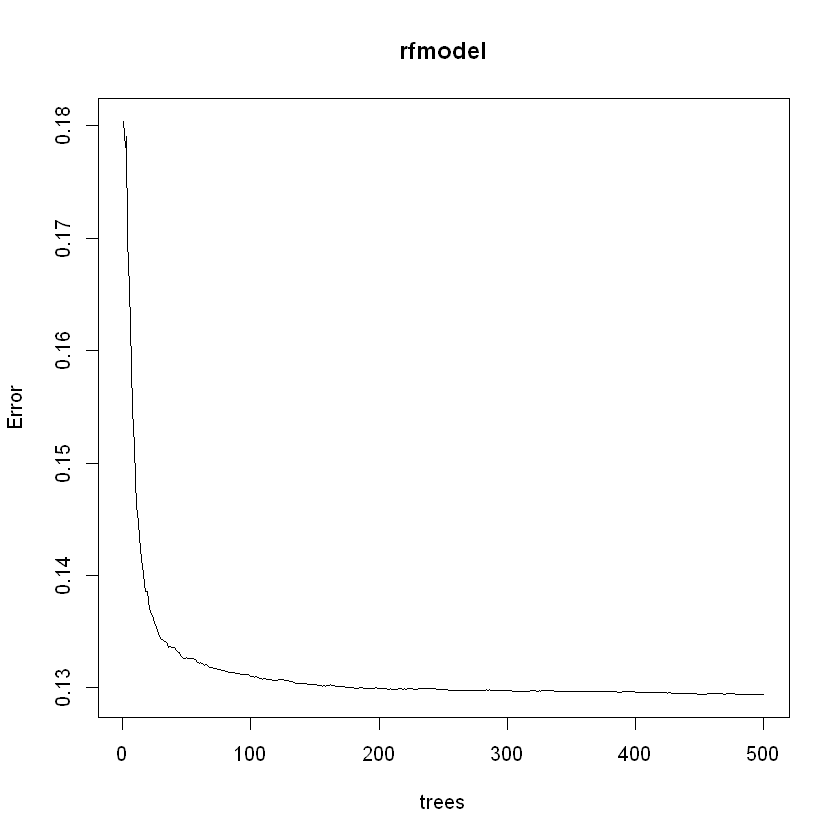

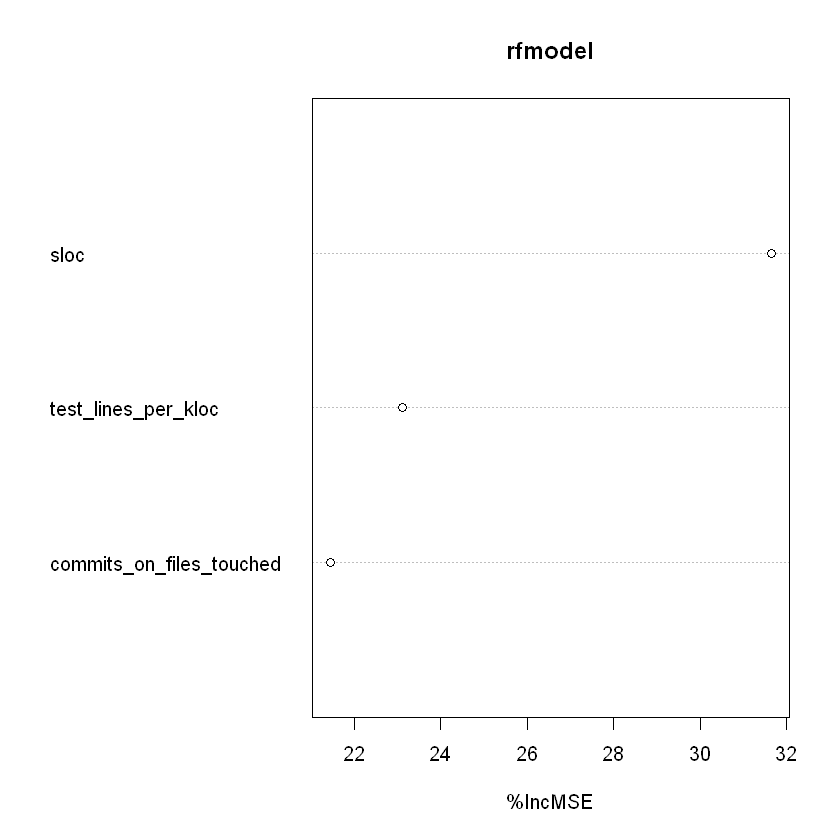

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.534411, ACC 0.500500, PREC 0.854167, REC 0.501183"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.854556"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

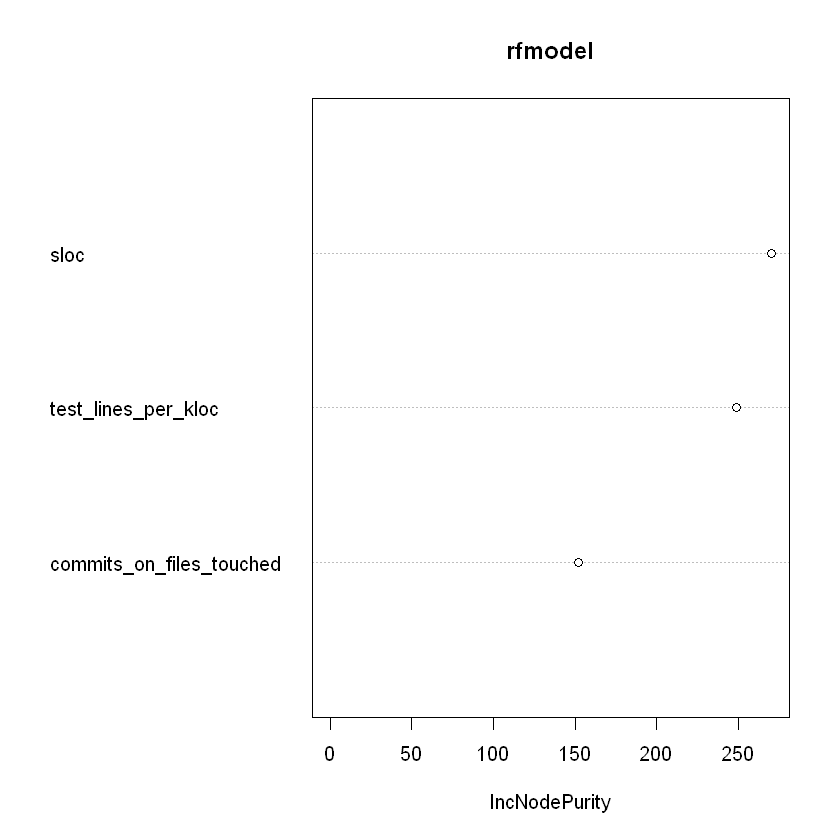


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1259845
                    % Var explained: -1.36
                          %IncMSE IncNodePurity
sloc                     20.76353      252.4395
test_lines_per_kloc      24.91252      236.7362
commits_on_files_touched  9.22947      139.1022


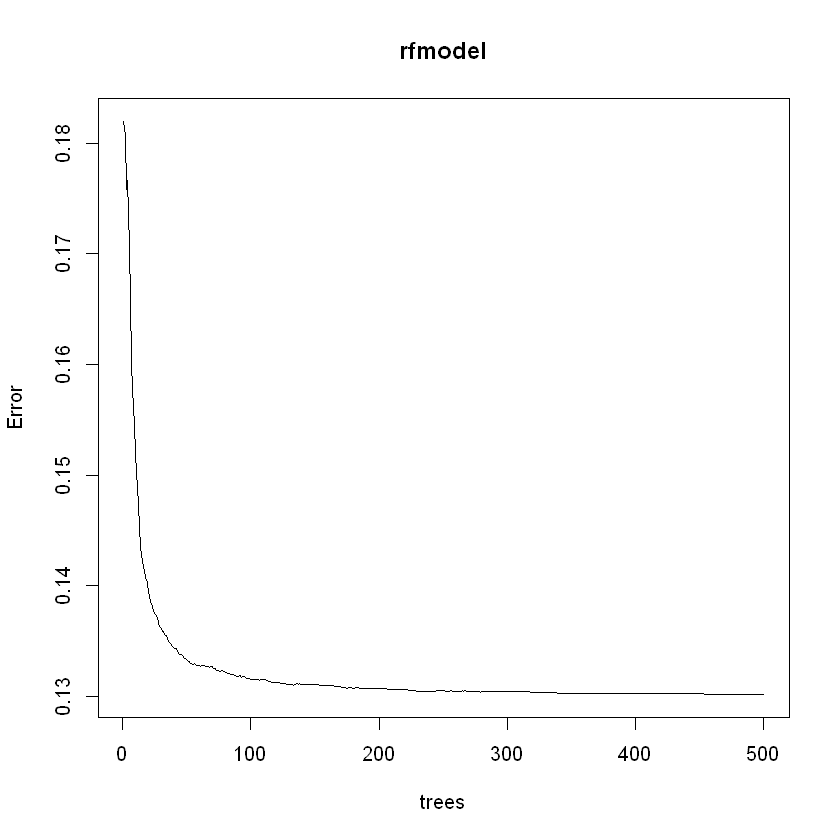

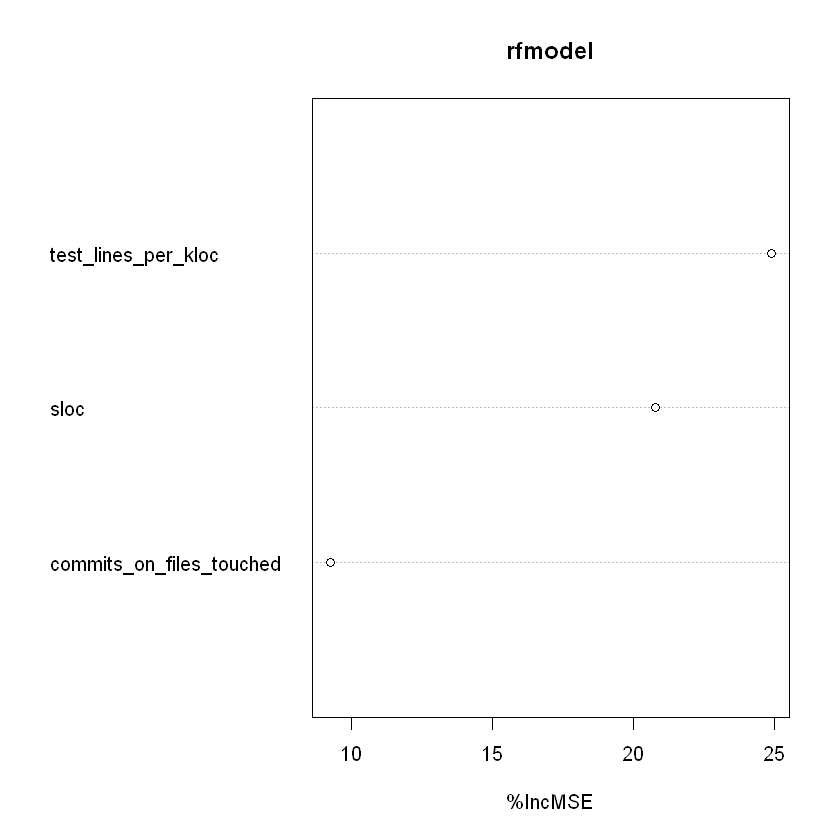

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.588592, ACC 0.533500, PREC 0.881356, REC 0.519412"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.851333"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

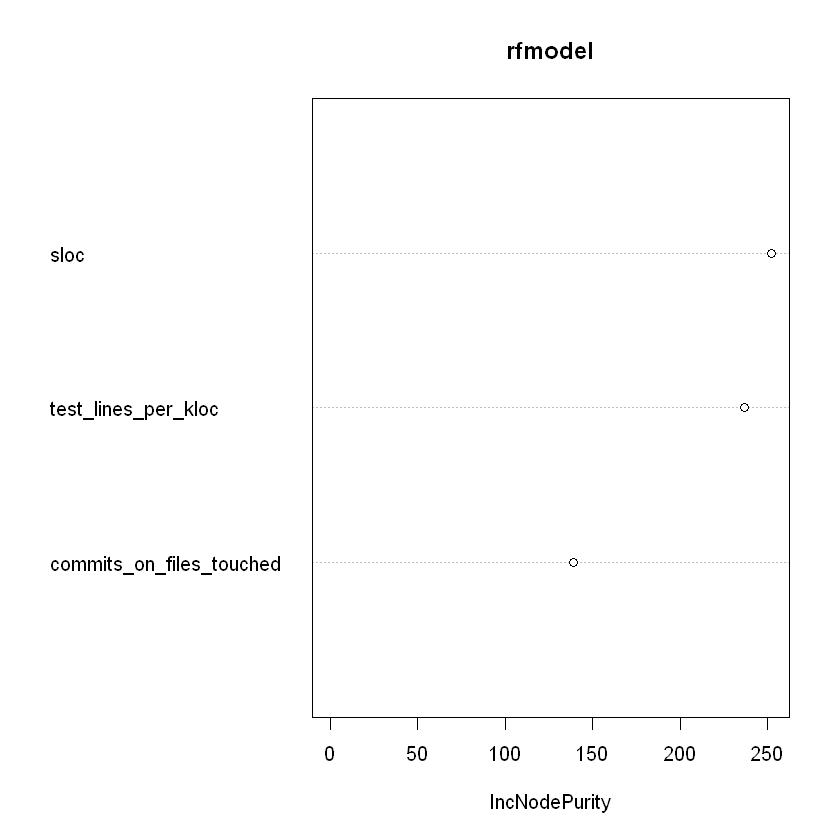


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.128769
                    % Var explained: -1.74
                          %IncMSE IncNodePurity
sloc                     22.10887      254.2581
test_lines_per_kloc      21.22705      237.6053
commits_on_files_touched 15.51778      139.3473


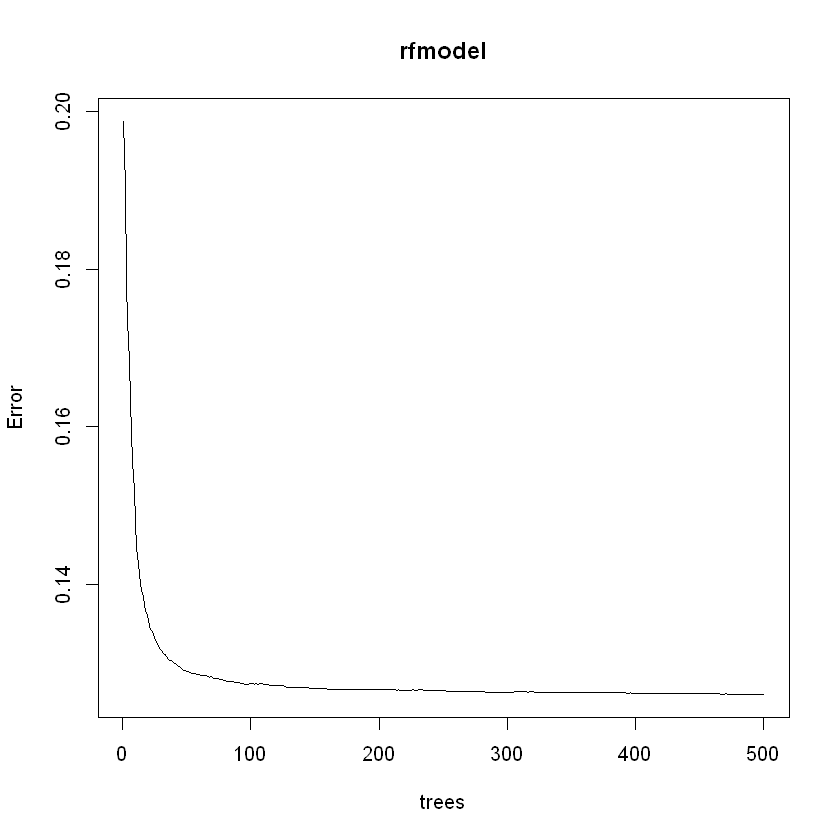

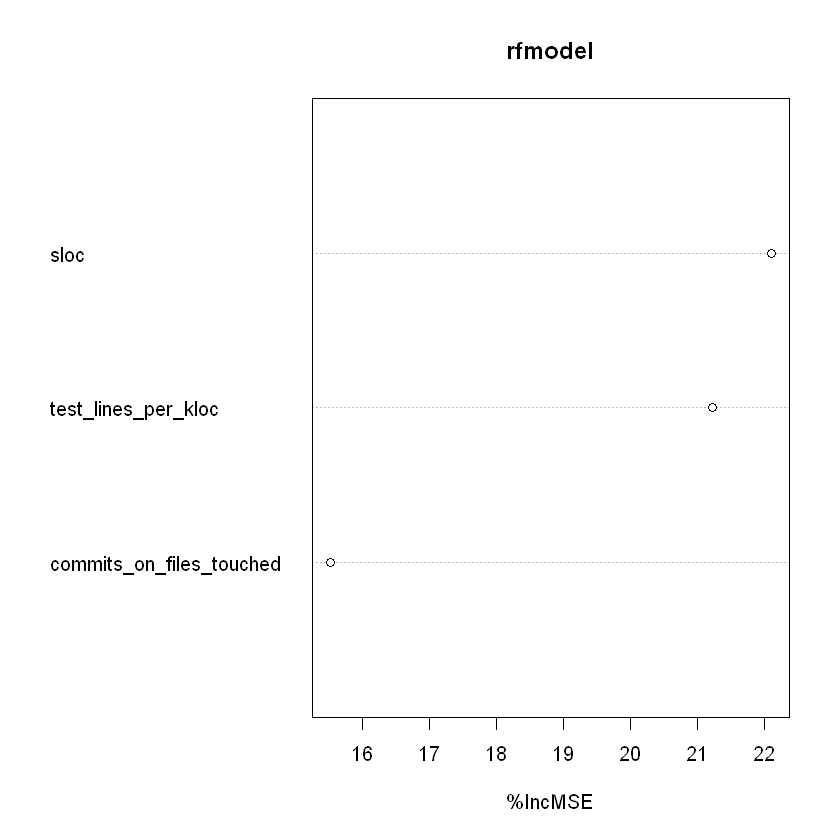

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.582954, ACC 0.531000, PREC 0.879438, REC 0.518214"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.843778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

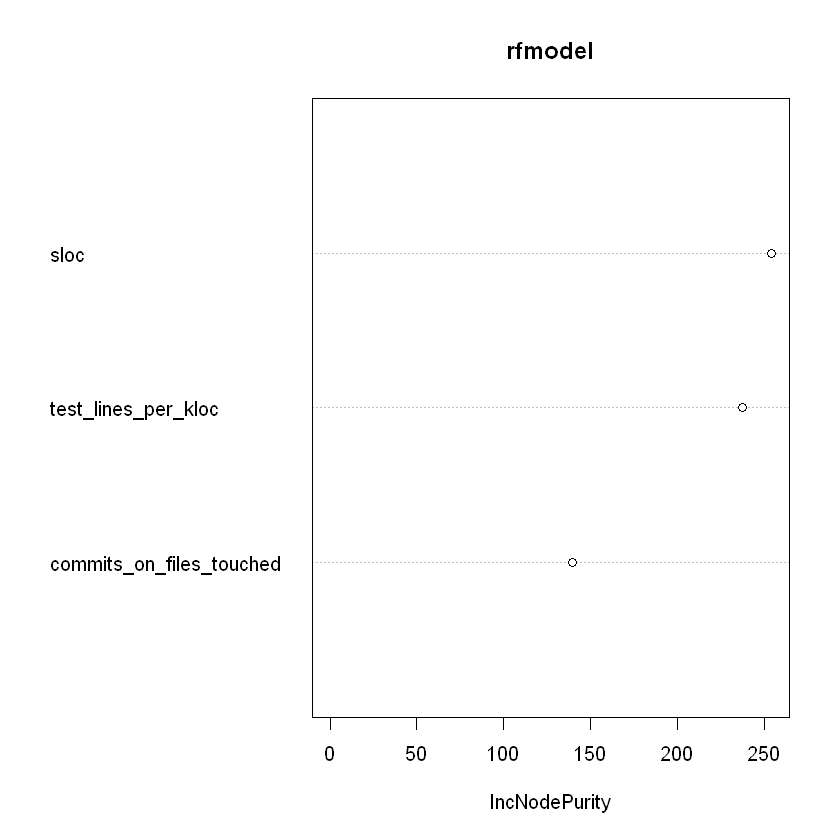


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1340549
                    % Var explained: -1.7
                          %IncMSE IncNodePurity
sloc                     22.94334      272.5717
test_lines_per_kloc      22.57466      254.3792
commits_on_files_touched 15.01001      146.7620


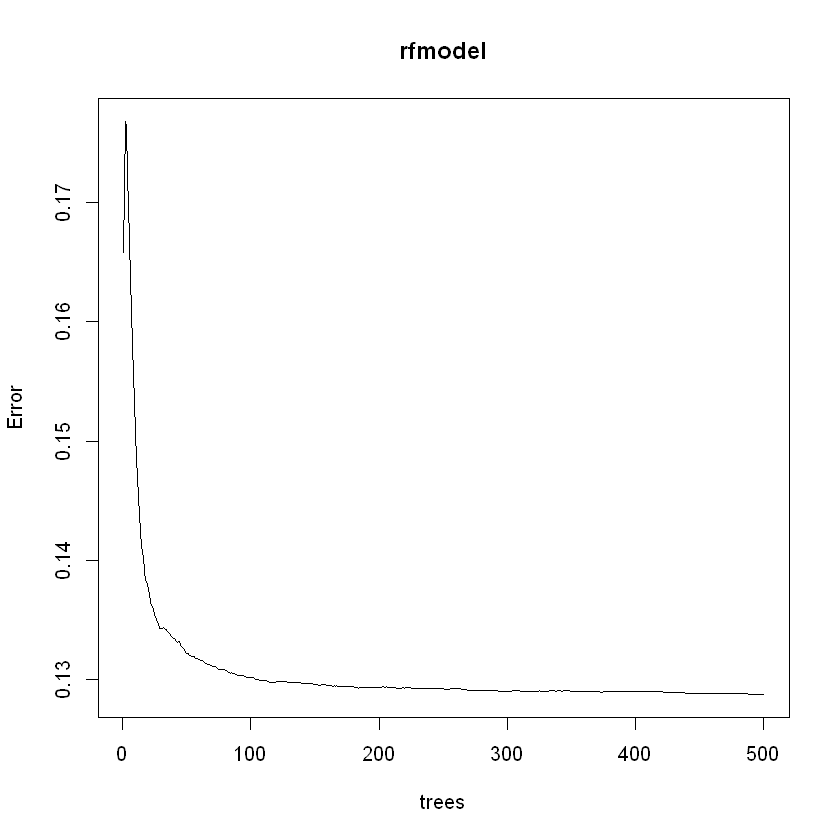

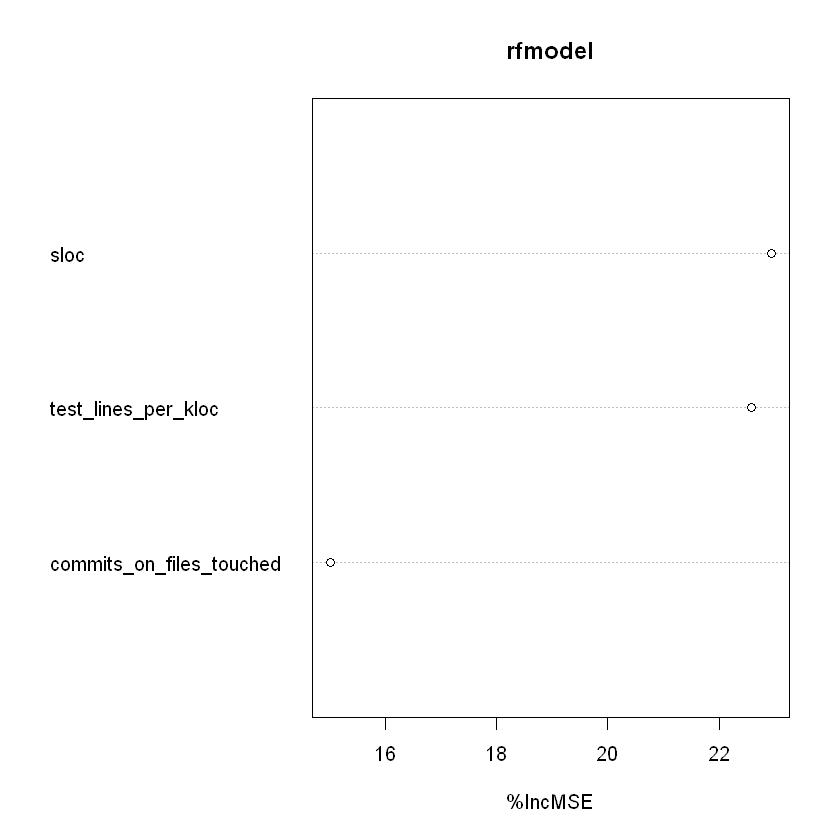

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.574890, ACC 0.529000, PREC 0.879645, REC 0.516959"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.842333"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

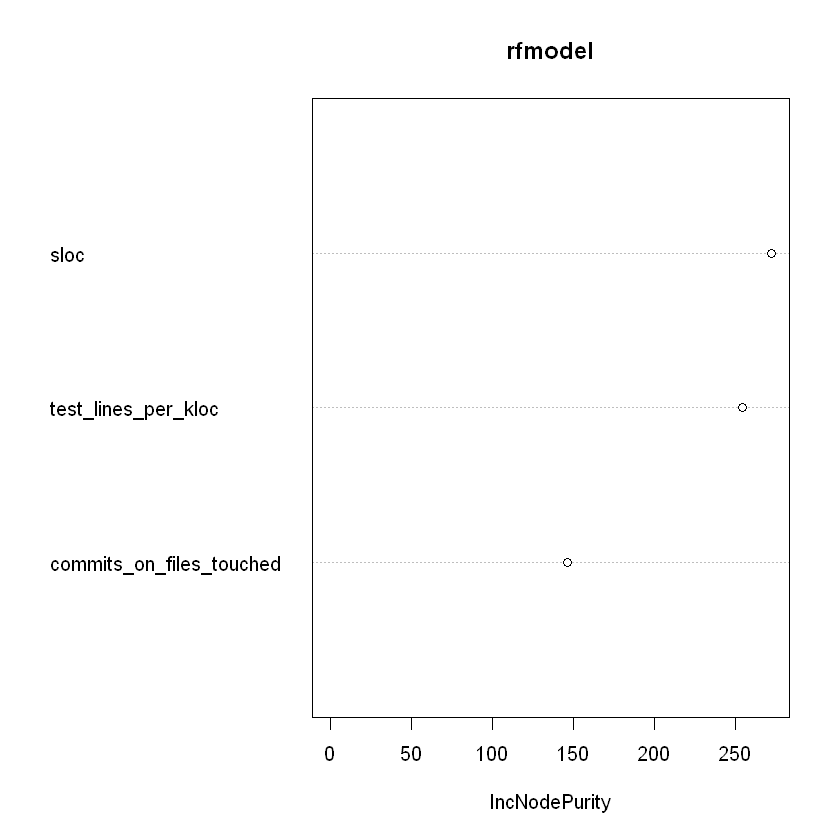


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.134674
                    % Var explained: -1.41
                          %IncMSE IncNodePurity
sloc                     17.94235      259.3393
test_lines_per_kloc      21.53971      245.5925
commits_on_files_touched 11.10089      151.6032


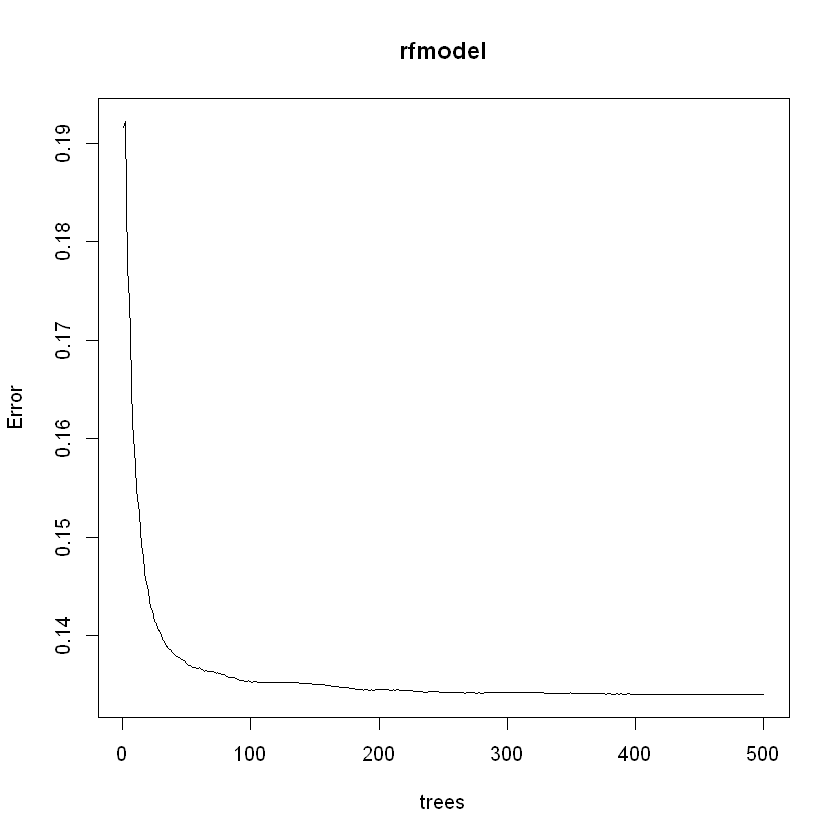

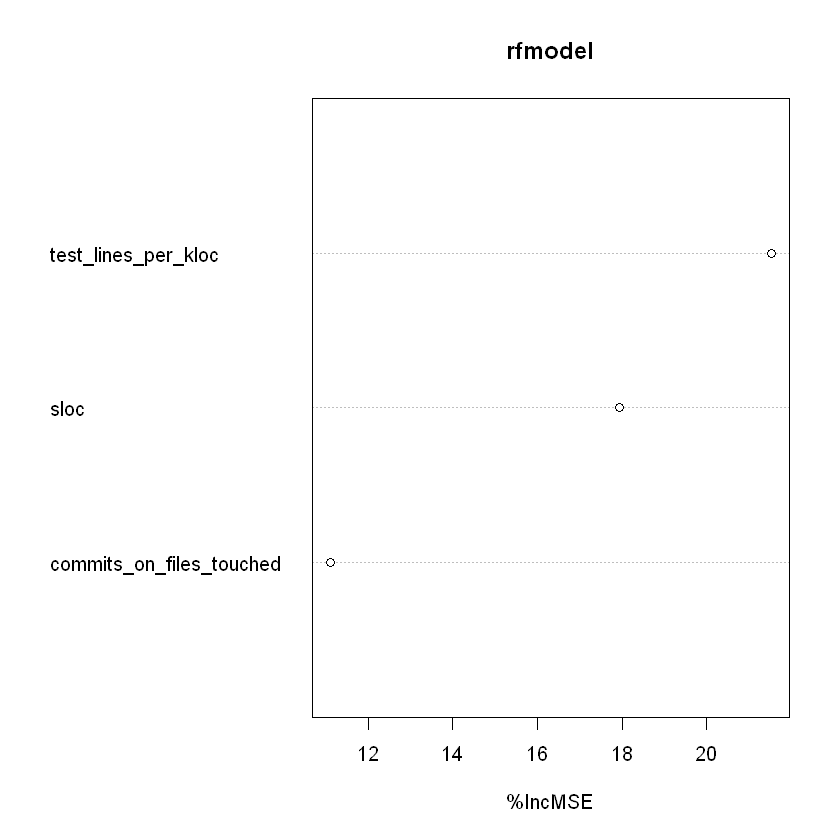

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.581118, ACC 0.521500, PREC 0.892537, REC 0.512069"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.842667"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

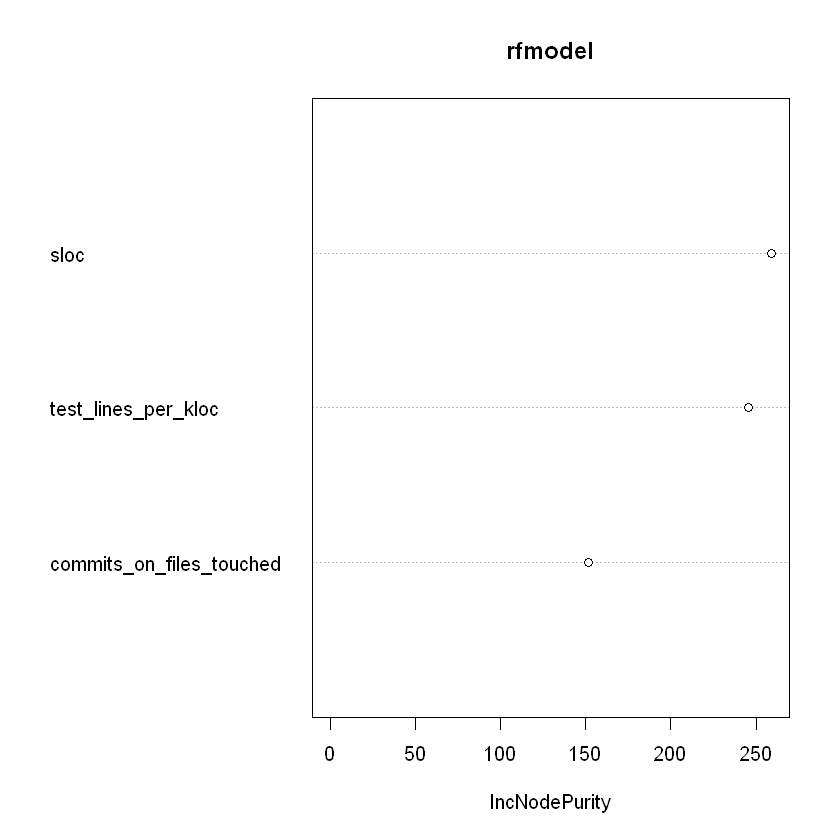


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1355787
                    % Var explained: -2.26
                           %IncMSE IncNodePurity
sloc                     18.507006      266.0490
test_lines_per_kloc      15.487041      249.5070
commits_on_files_touched  9.366998      145.0524


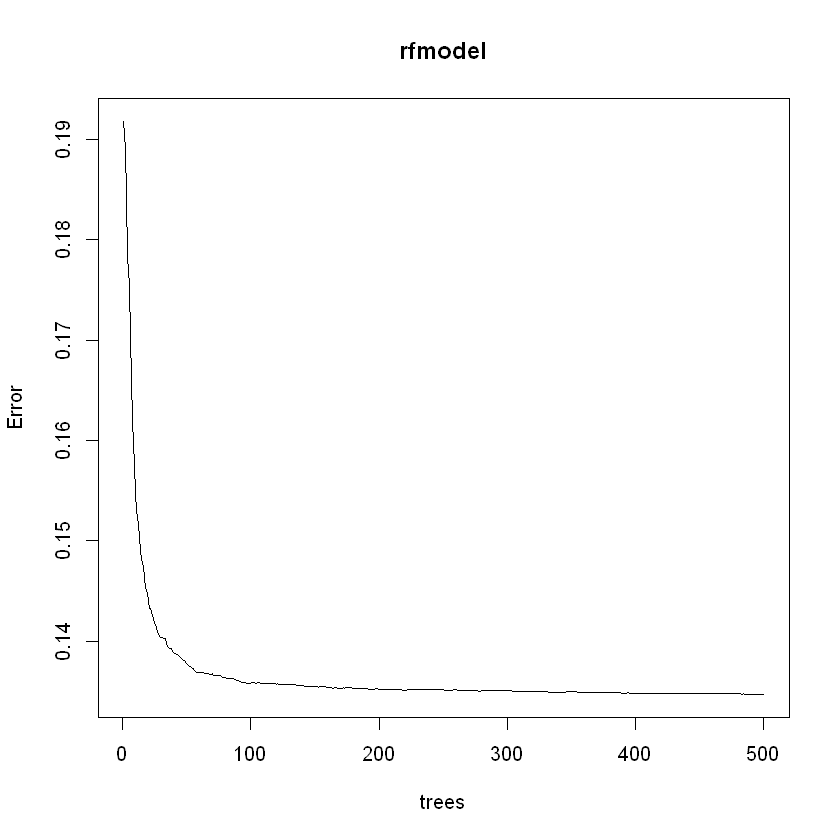

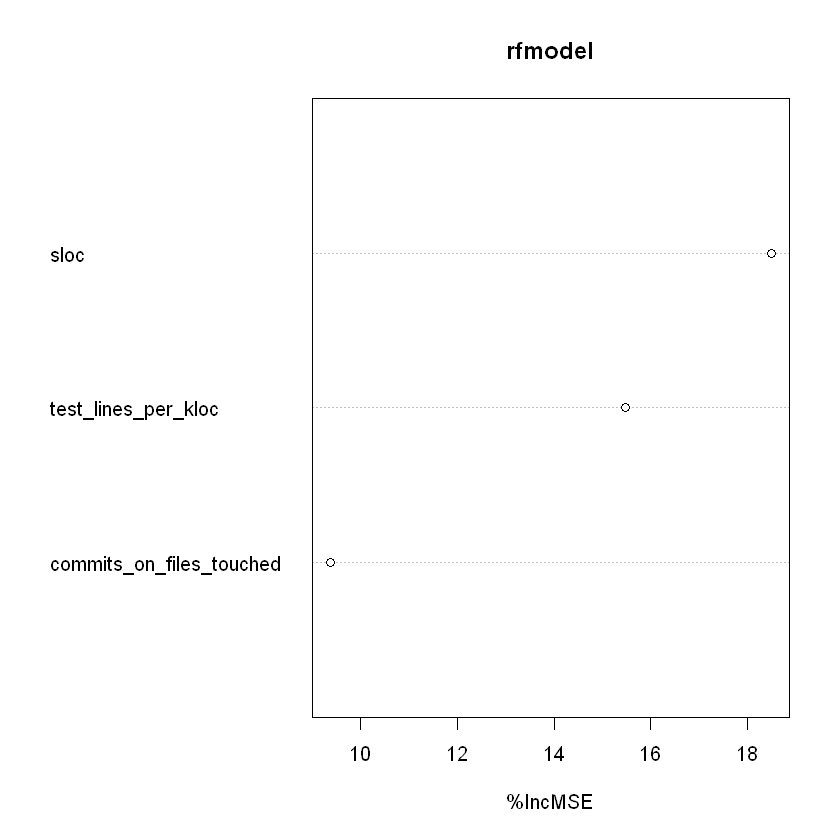

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.588359, ACC 0.528000, PREC 0.883675, REC 0.515222"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.851111"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

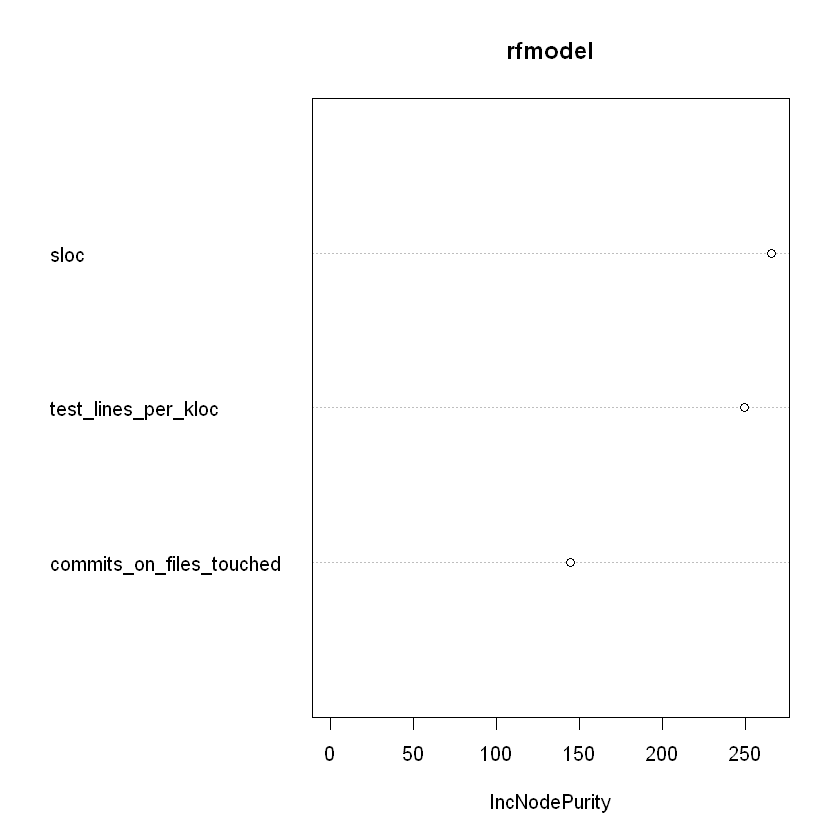


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1280486
                    % Var explained: -1.05
                          %IncMSE IncNodePurity
sloc                     25.69741      270.9913
test_lines_per_kloc      23.02948      247.0664
commits_on_files_touched 12.40321      144.6240


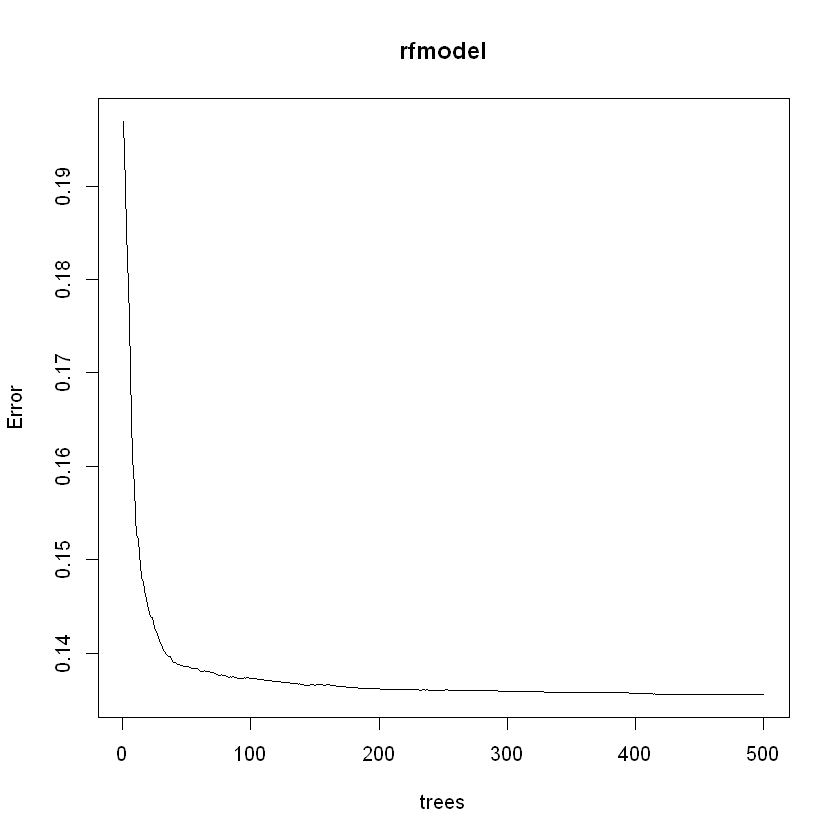

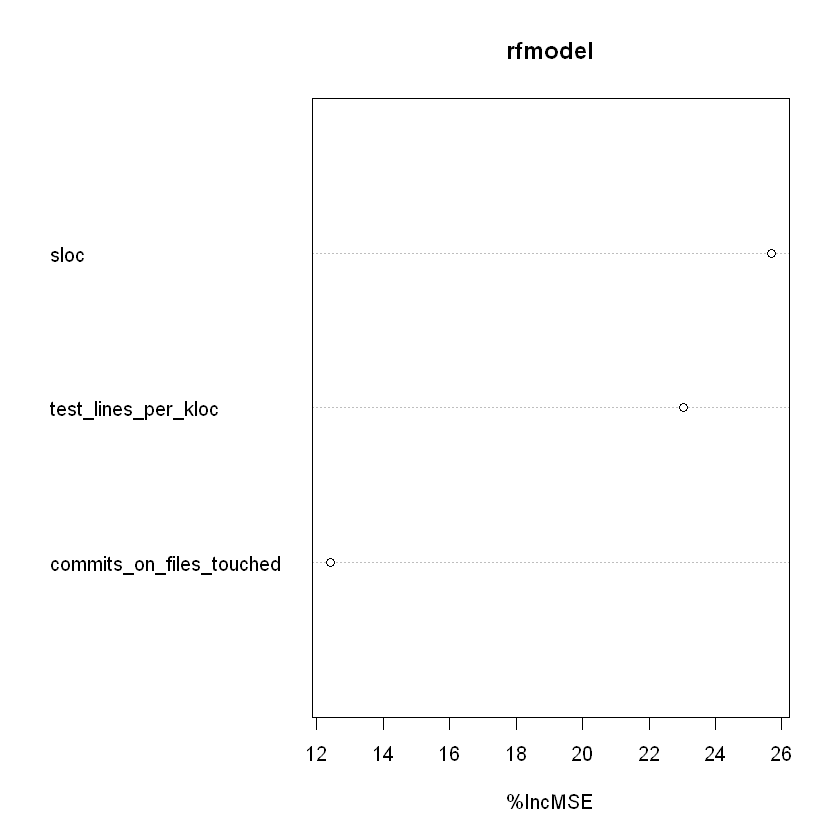

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.647447, ACC 0.563500, PREC 0.894737, REC 0.539521"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.846000"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

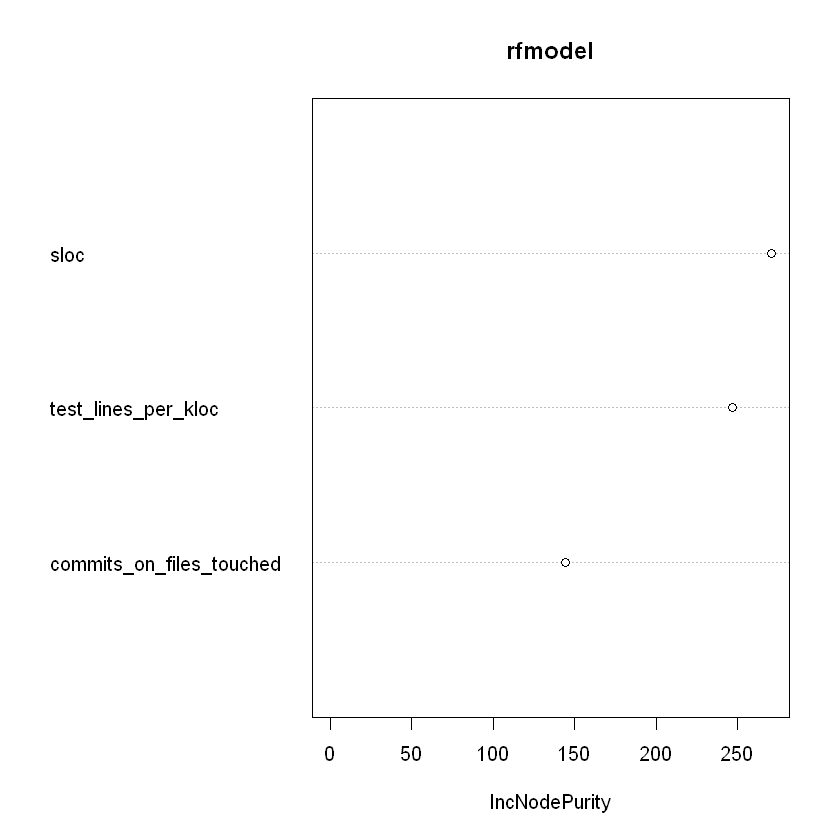


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.132312
                    % Var explained: -1.56
                          %IncMSE IncNodePurity
sloc                     15.56436      267.1038
test_lines_per_kloc      20.29082      252.9818
commits_on_files_touched 14.28044      145.3407


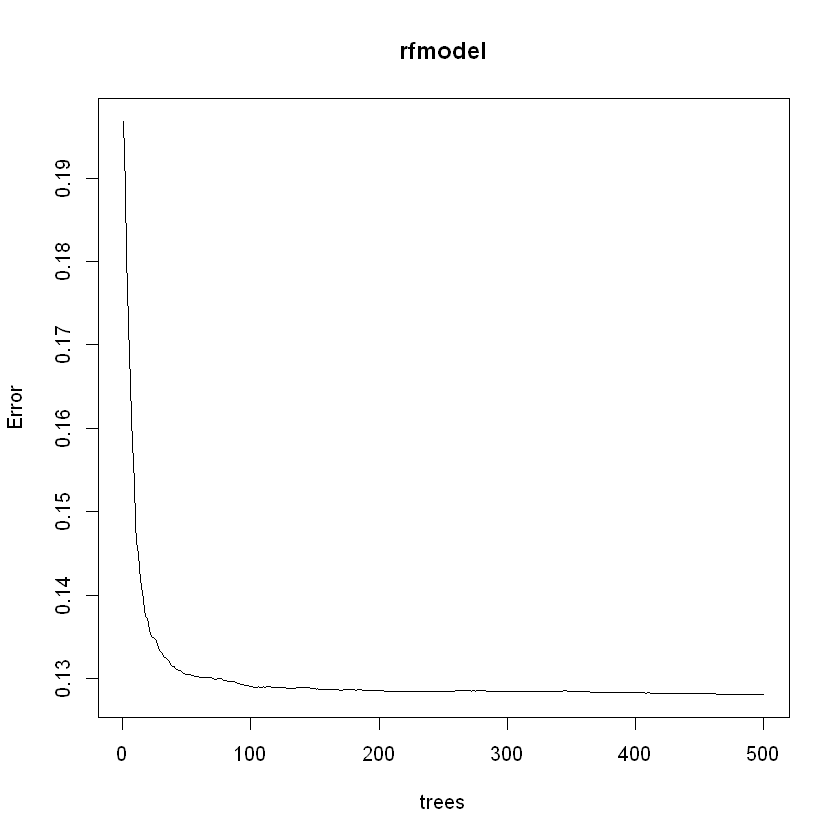

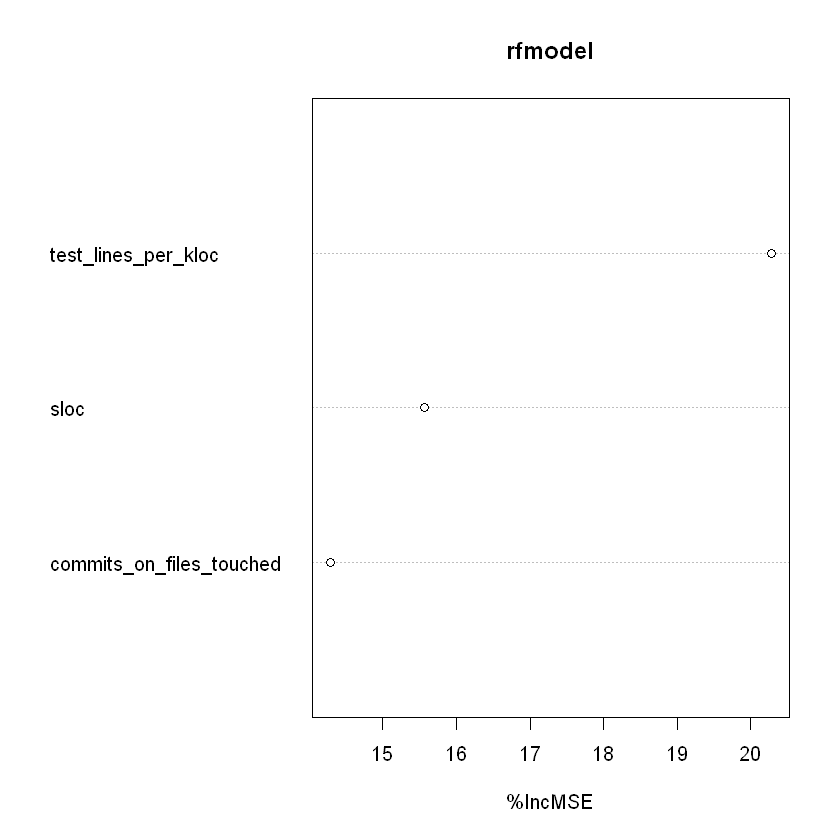

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.561490, ACC 0.525500, PREC 0.862411, REC 0.514810"
[1] "Running cross.val num_samples: 10000, run: 1"
[1] "Prior propability: 0.854000"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

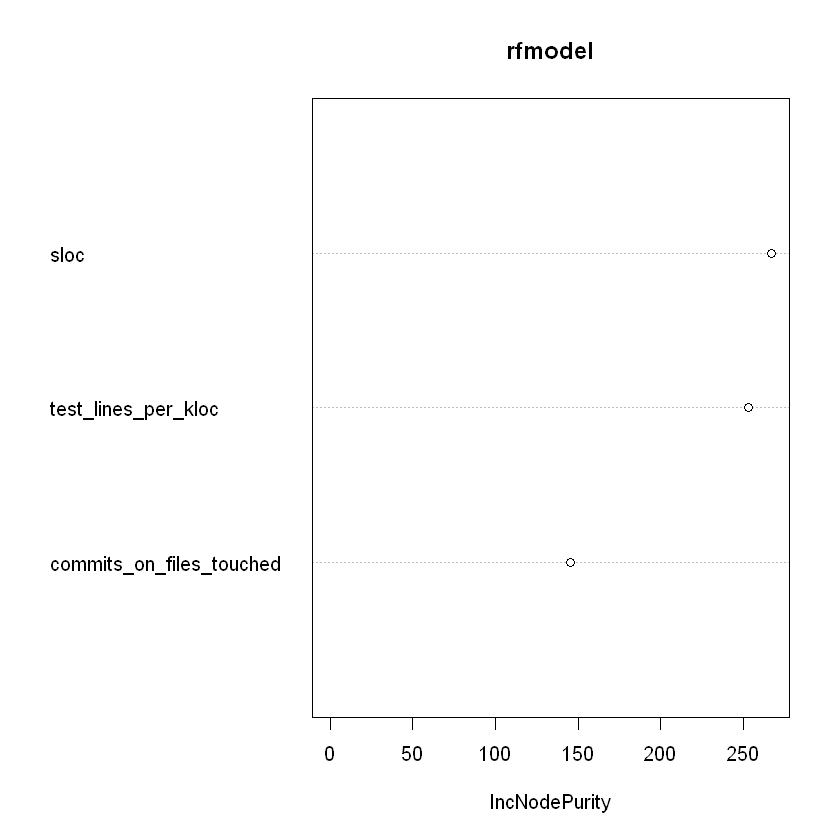


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1257184
                    % Var explained: -0.83
                          %IncMSE IncNodePurity
sloc                     29.94335      250.3789
test_lines_per_kloc      22.15933      230.3600
commits_on_files_touched 20.13580      137.4365


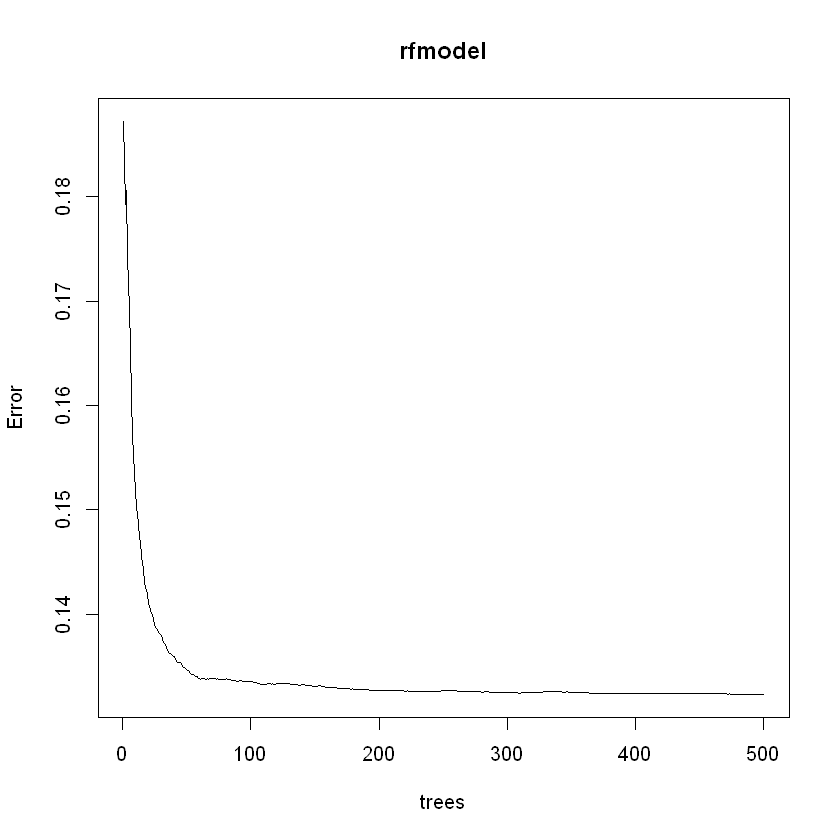

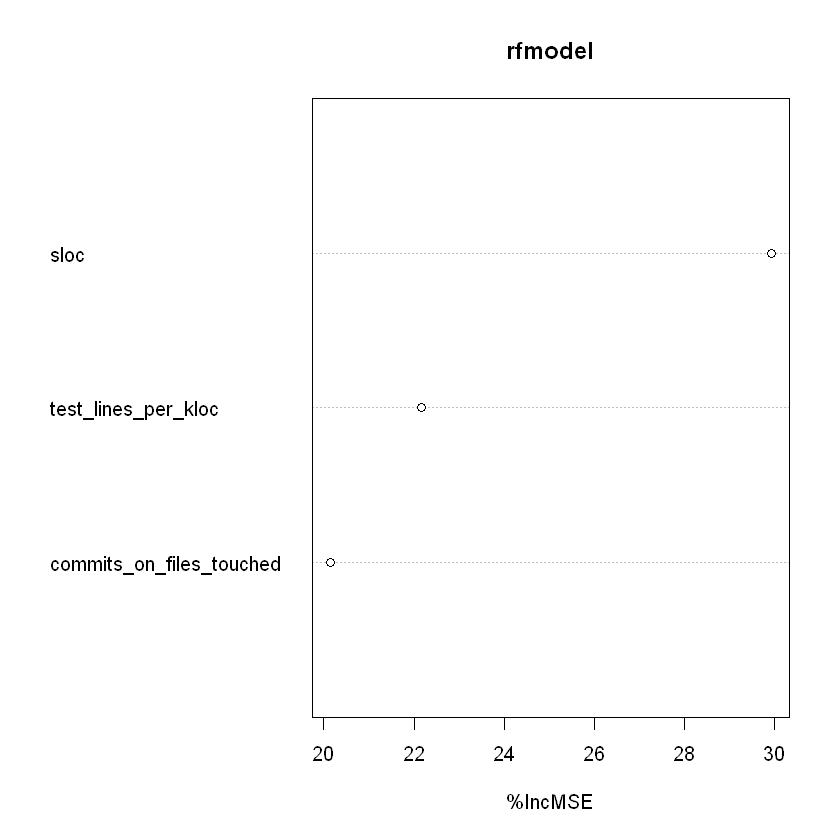

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.594793, ACC 0.537500, PREC 0.899614, REC 0.521167"
[1] "Finished Loop, converting restuls"
[1] "return restuls"
[1] "Outputing Restuls"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.846533"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

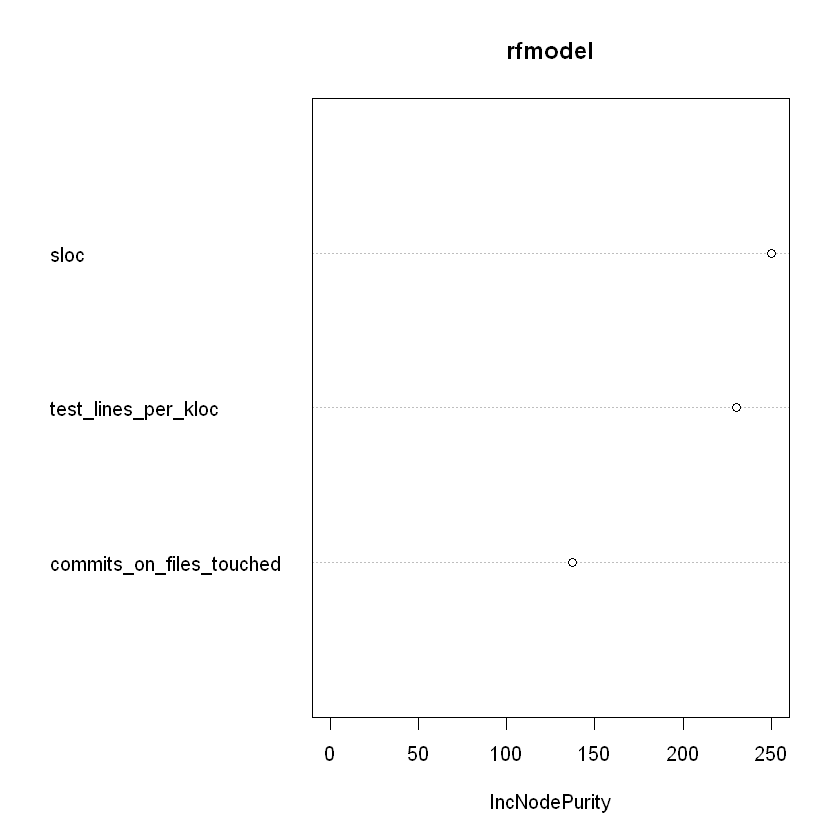


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1273764
                    % Var explained: 1.95
                          %IncMSE IncNodePurity
sloc                     65.46081     1057.9113
test_lines_per_kloc      59.82971     1000.8752
commits_on_files_touched 44.93975      553.8619


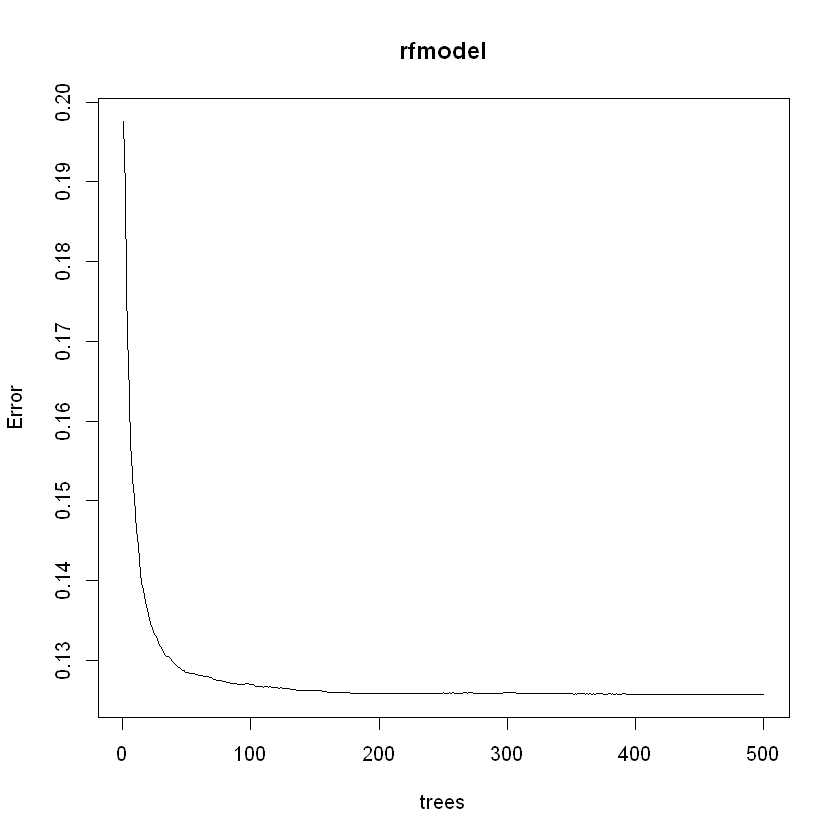

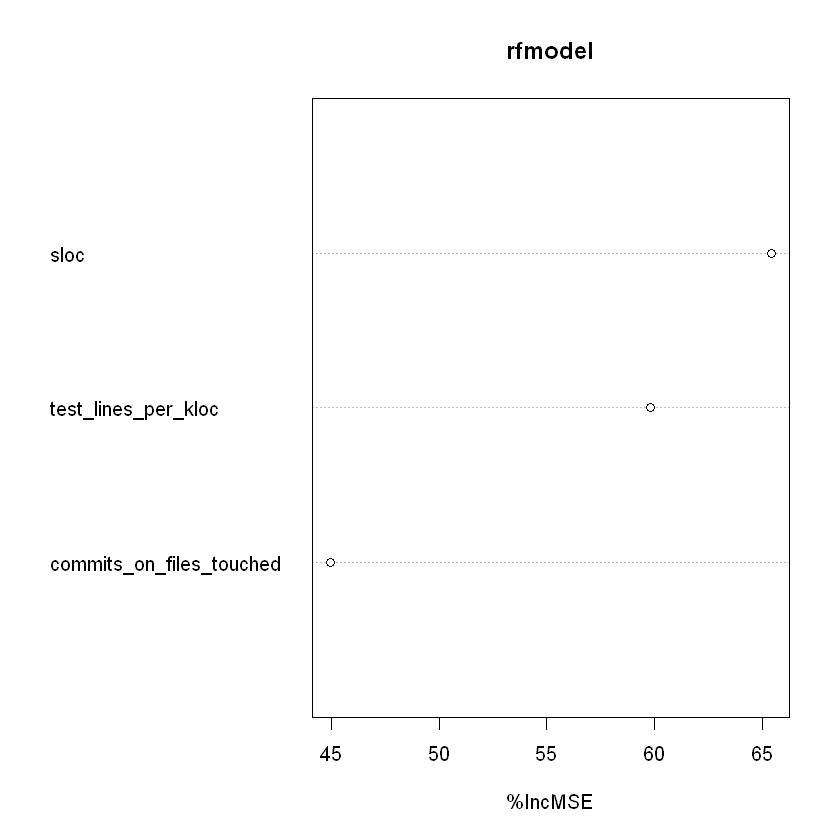

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.598636, ACC 0.526900, PREC 0.873894, REC 0.514560"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.849467"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

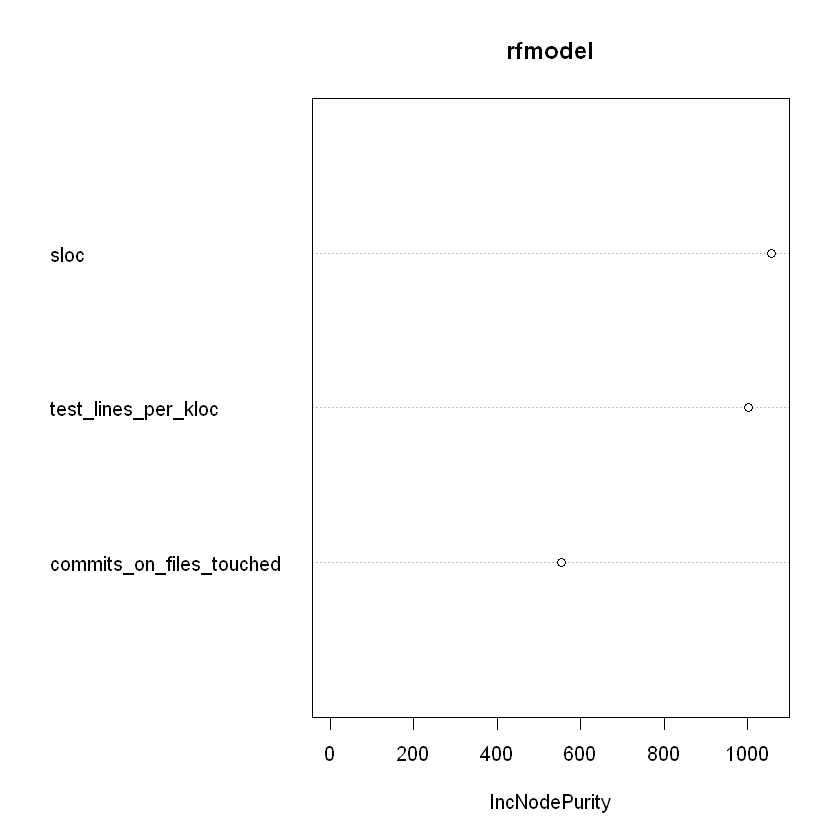


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1250906
                    % Var explained: 2.18
                          %IncMSE IncNodePurity
sloc                     68.39808     1047.9097
test_lines_per_kloc      63.18615      991.3641
commits_on_files_touched 47.16895      520.9909


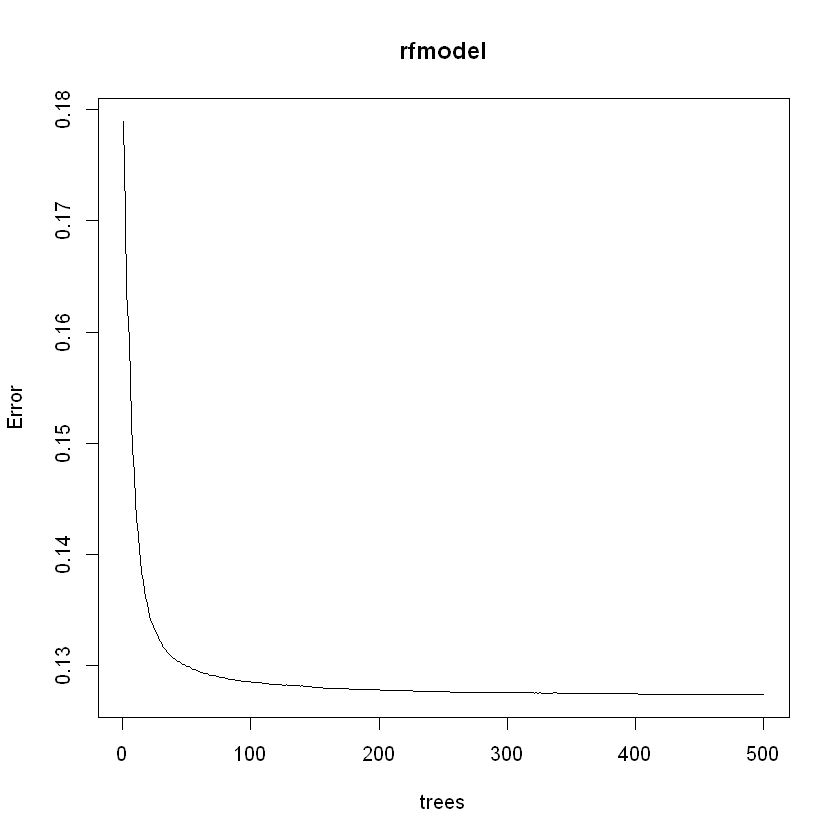

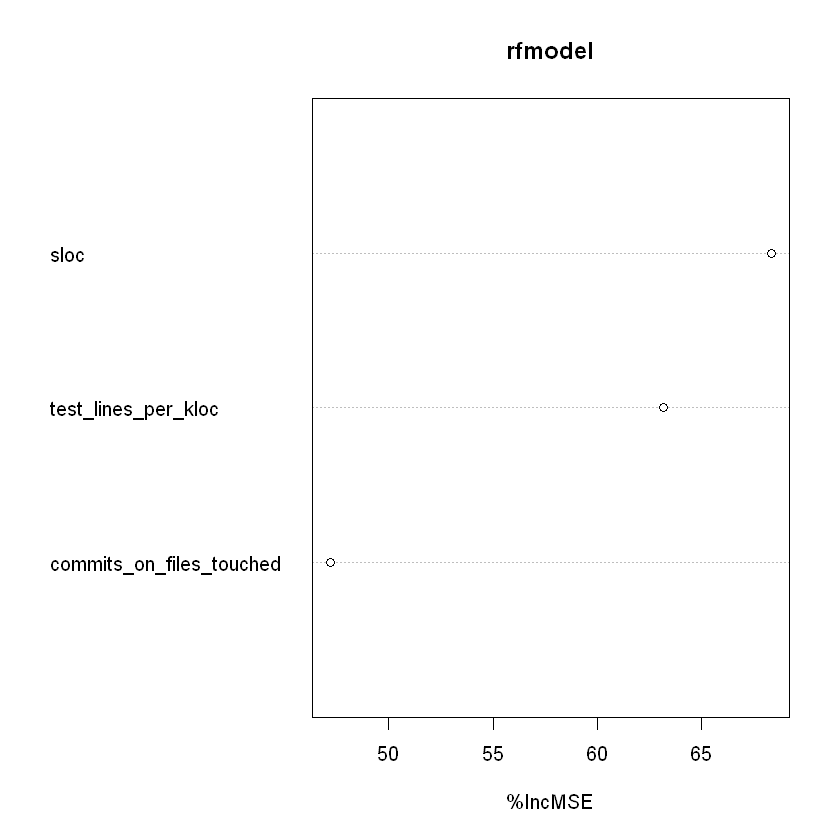

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.598606, ACC 0.529700, PREC 0.878157, REC 0.516529"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.846511"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

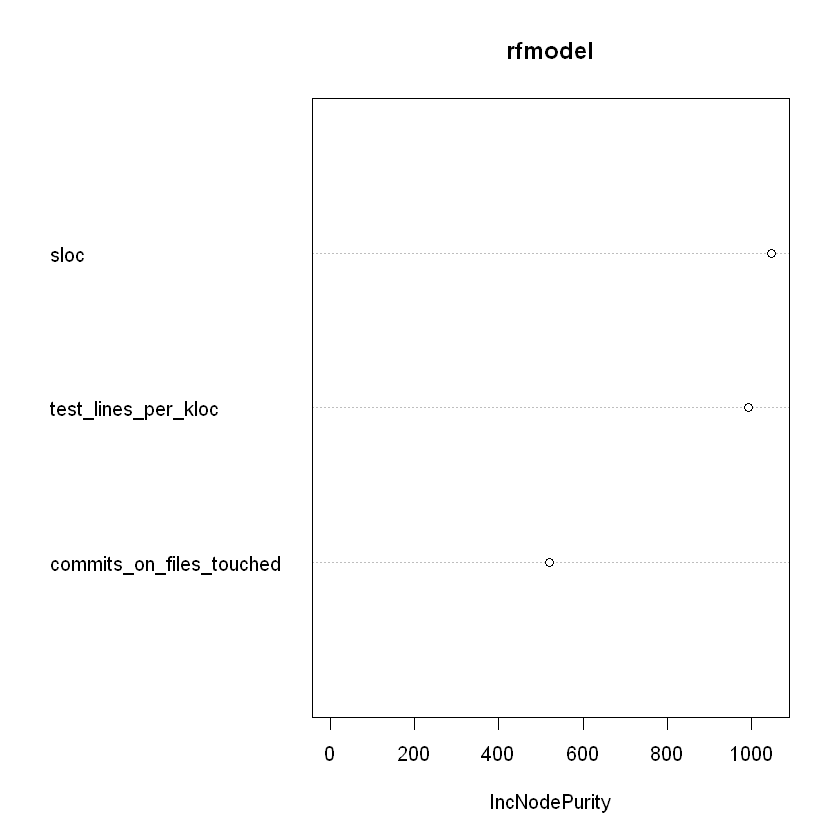


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1275379
                    % Var explained: 1.84
                          %IncMSE IncNodePurity
sloc                     62.70312     1074.7580
test_lines_per_kloc      63.15083     1021.5529
commits_on_files_touched 53.13573      559.5845


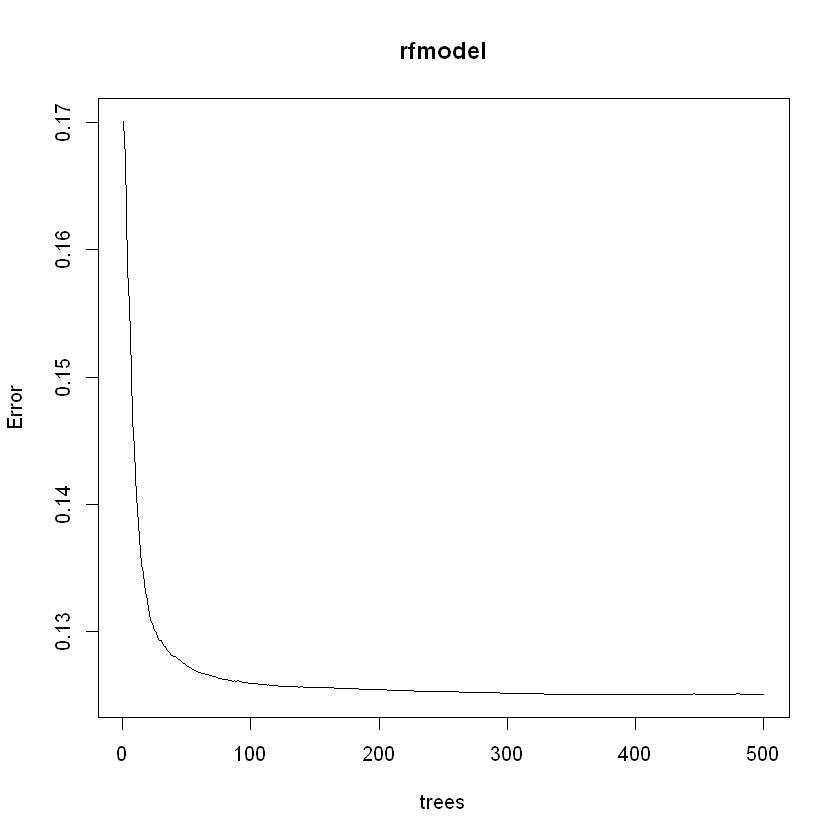

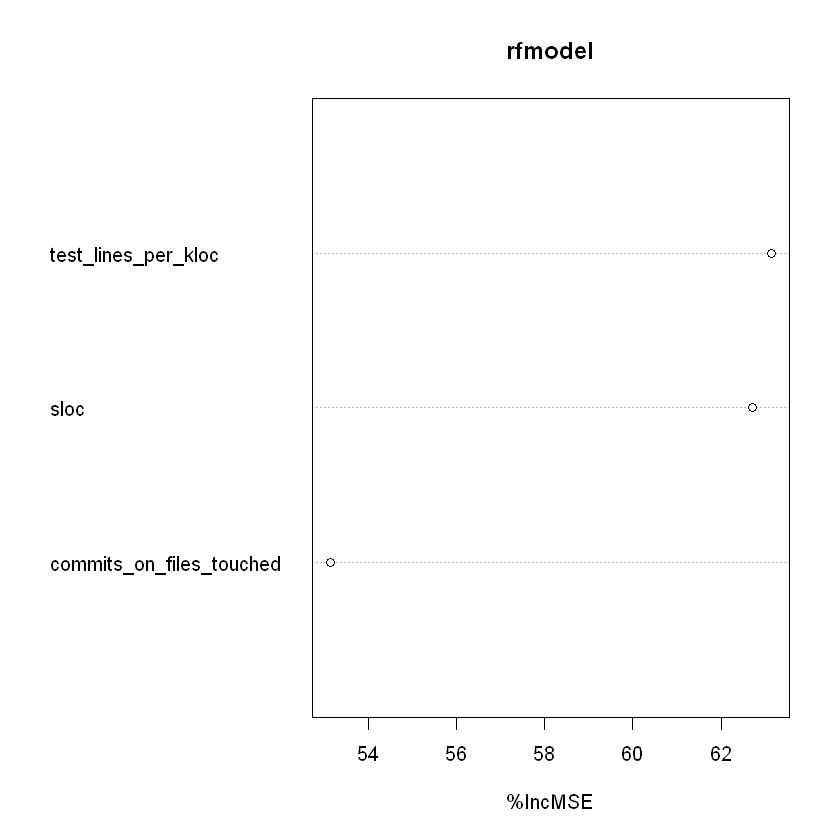

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.614688, ACC 0.539400, PREC 0.894195, REC 0.522839"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.849778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

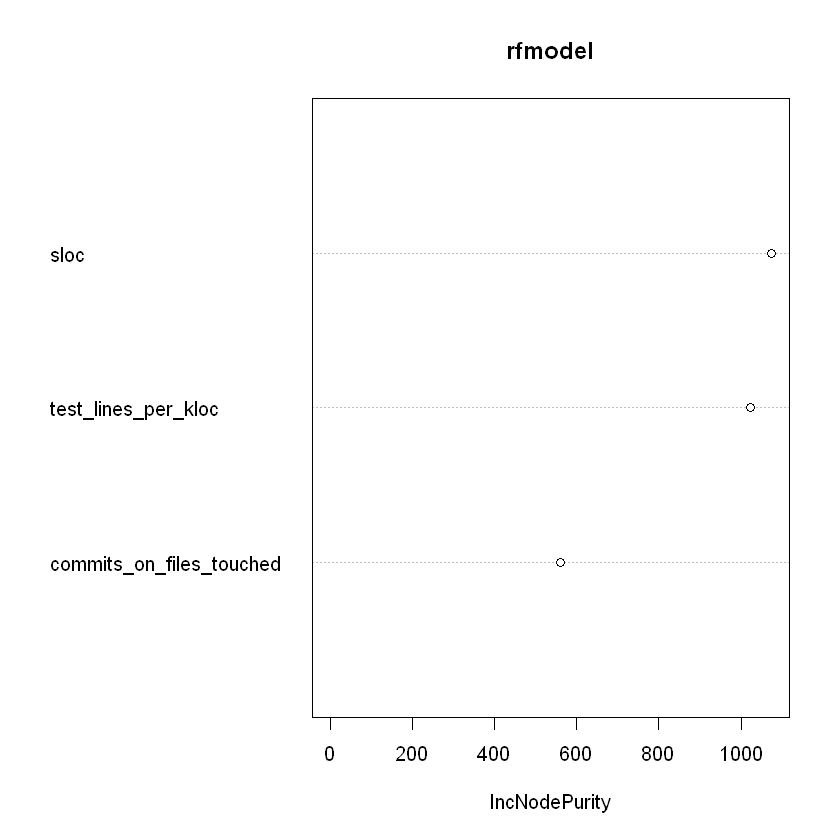


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.12525
                    % Var explained: 1.88
                          %IncMSE IncNodePurity
sloc                     65.49451     1070.8451
test_lines_per_kloc      58.89904     1017.4521
commits_on_files_touched 48.29122      567.2642


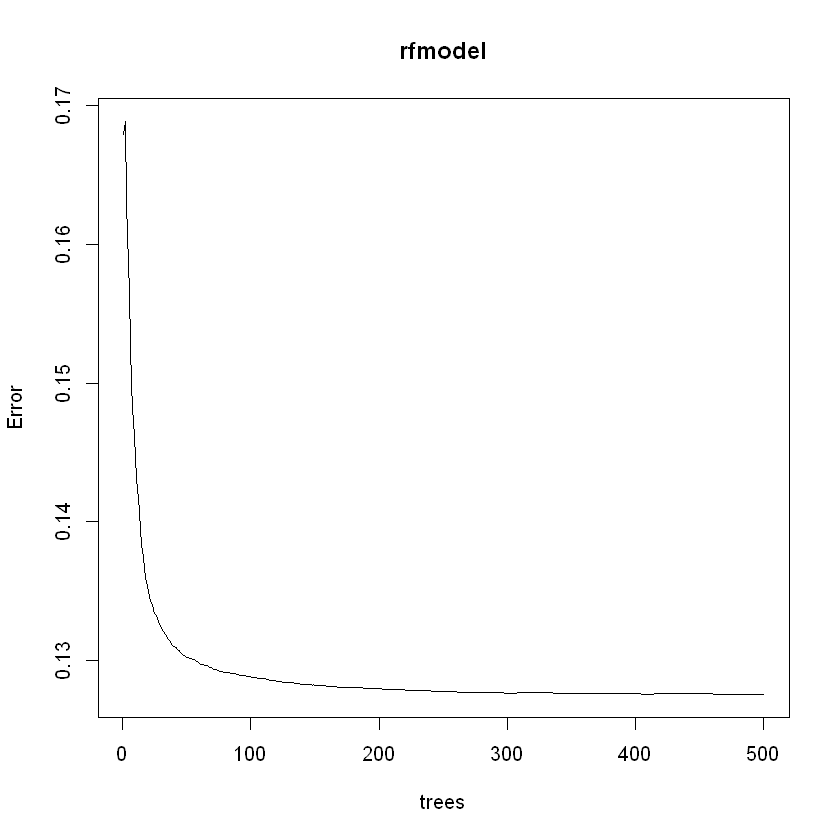

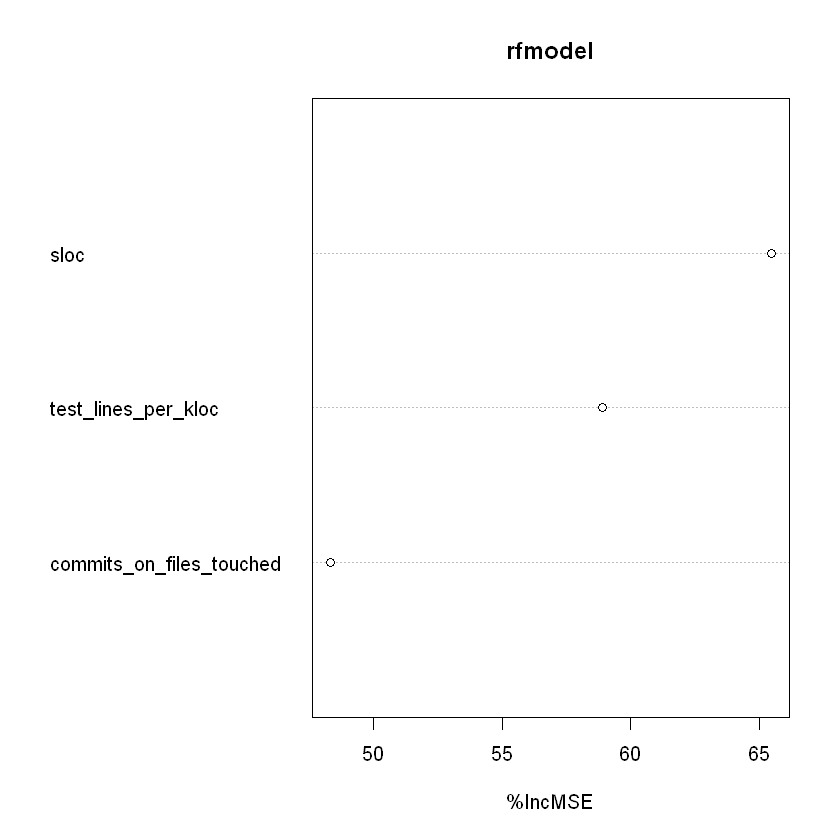

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.609114, ACC 0.532100, PREC 0.884615, REC 0.516839"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.850800"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

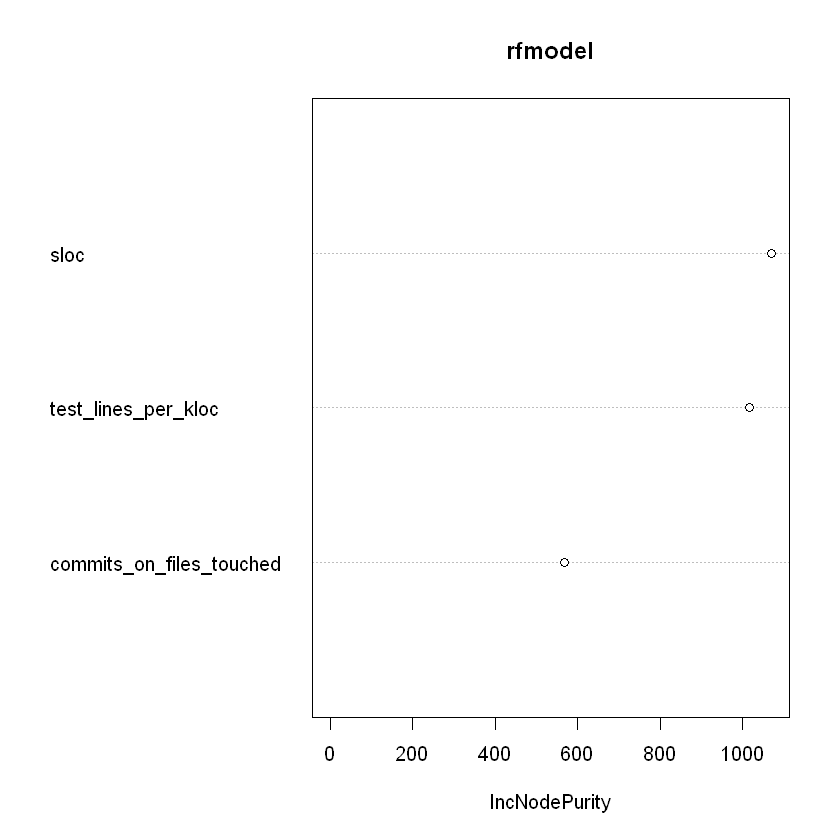


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1242463
                    % Var explained: 2.12
                          %IncMSE IncNodePurity
sloc                     66.78255     1038.7075
test_lines_per_kloc      69.60364      992.0030
commits_on_files_touched 47.93599      546.9141


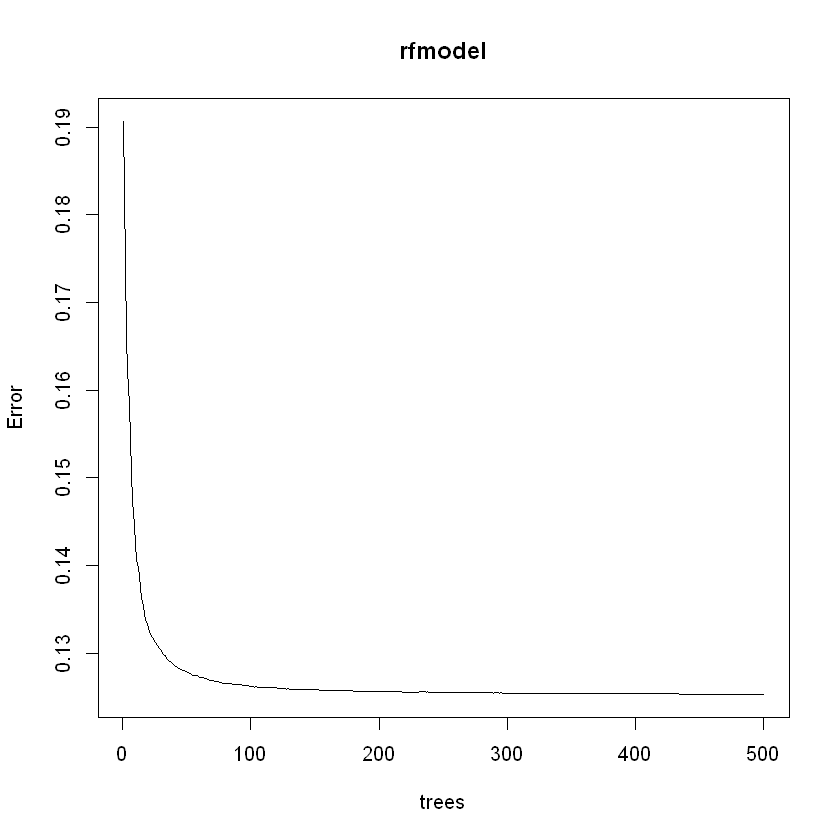

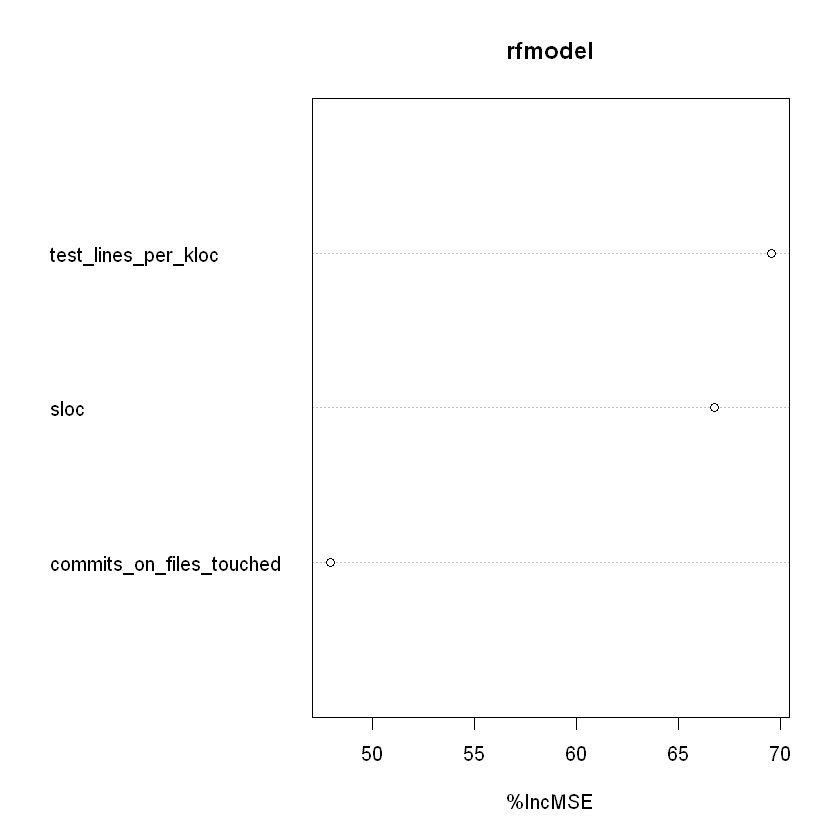

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.588001, ACC 0.525100, PREC 0.878315, REC 0.513047"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848489"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

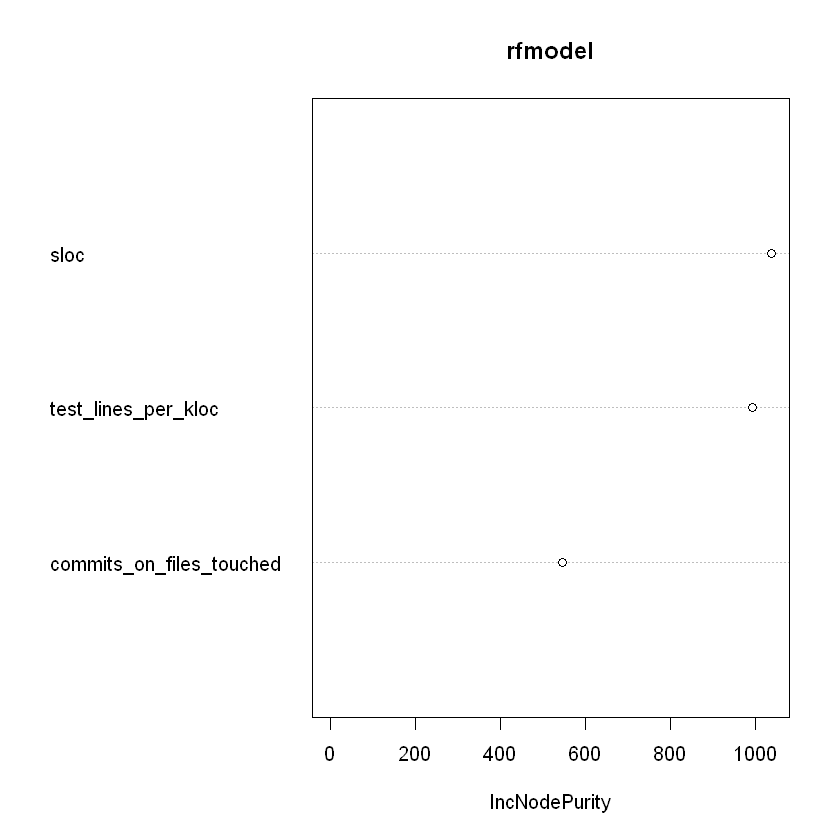


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1256571
                    % Var explained: 2.25
                          %IncMSE IncNodePurity
sloc                     64.69059     1028.9809
test_lines_per_kloc      65.96915      983.5421
commits_on_files_touched 46.32978      532.8030


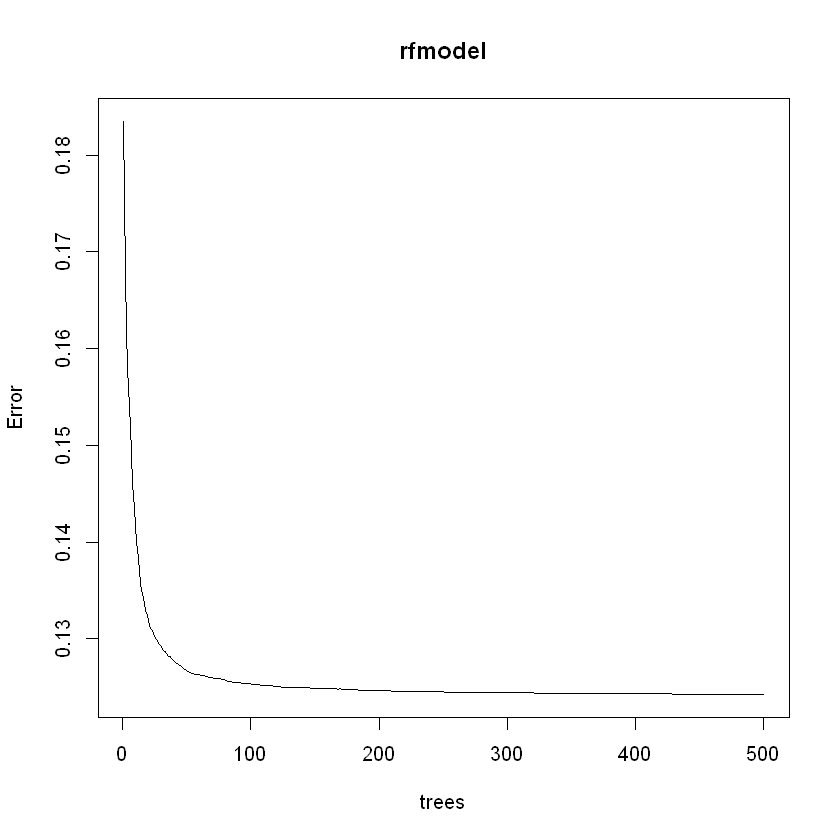

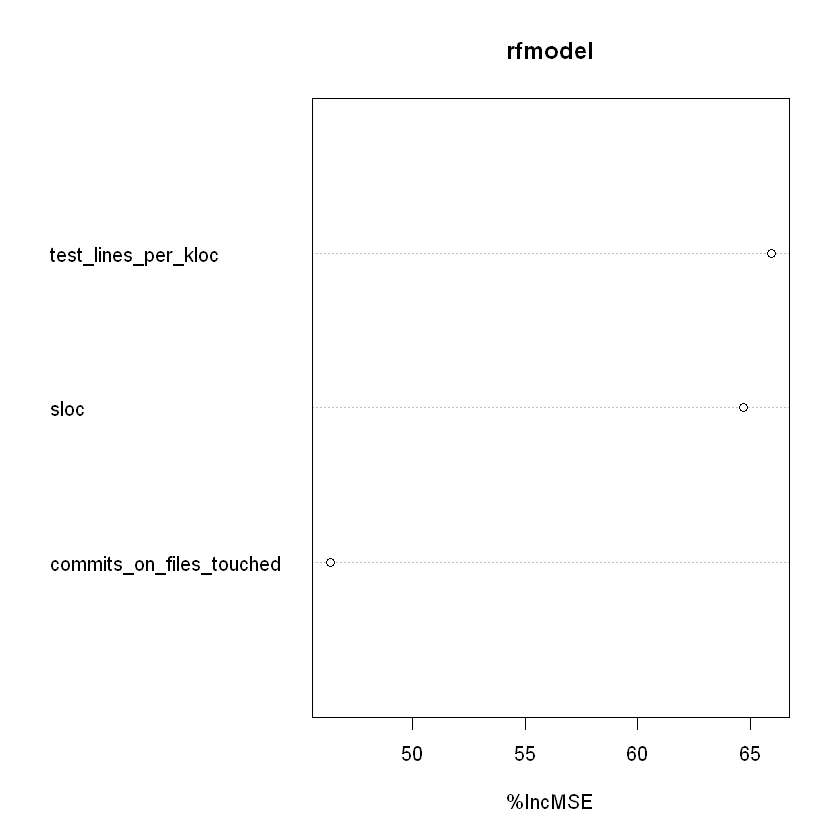

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.598368, ACC 0.531300, PREC 0.875672, REC 0.517916"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848778"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

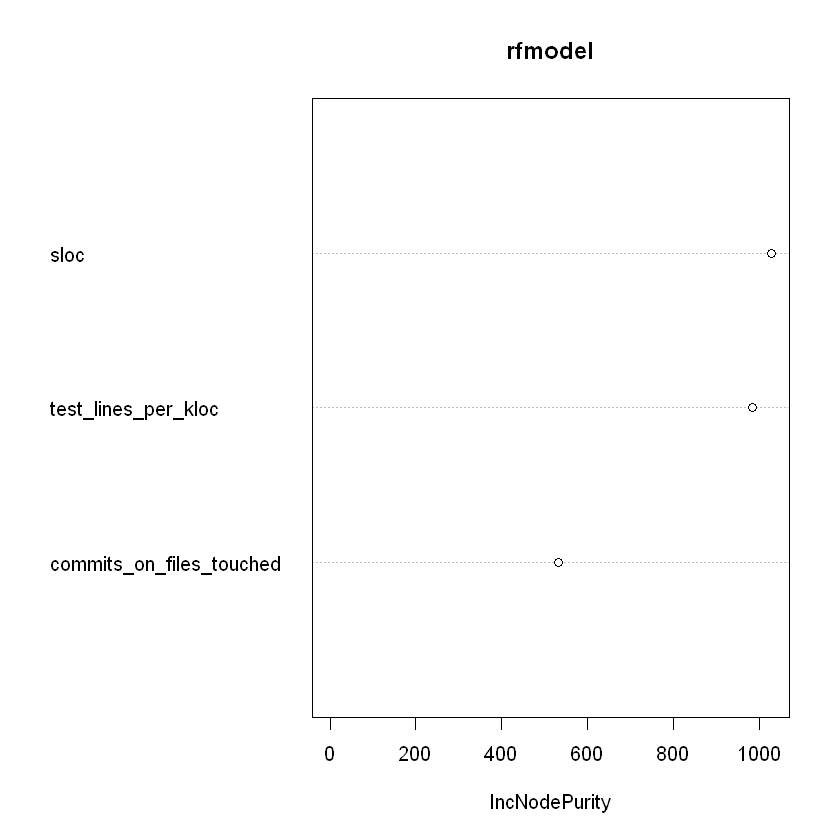


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1259093
                    % Var explained: 1.9
                          %IncMSE IncNodePurity
sloc                     65.52987     1046.3404
test_lines_per_kloc      58.44838      986.3034
commits_on_files_touched 48.99990      520.4909


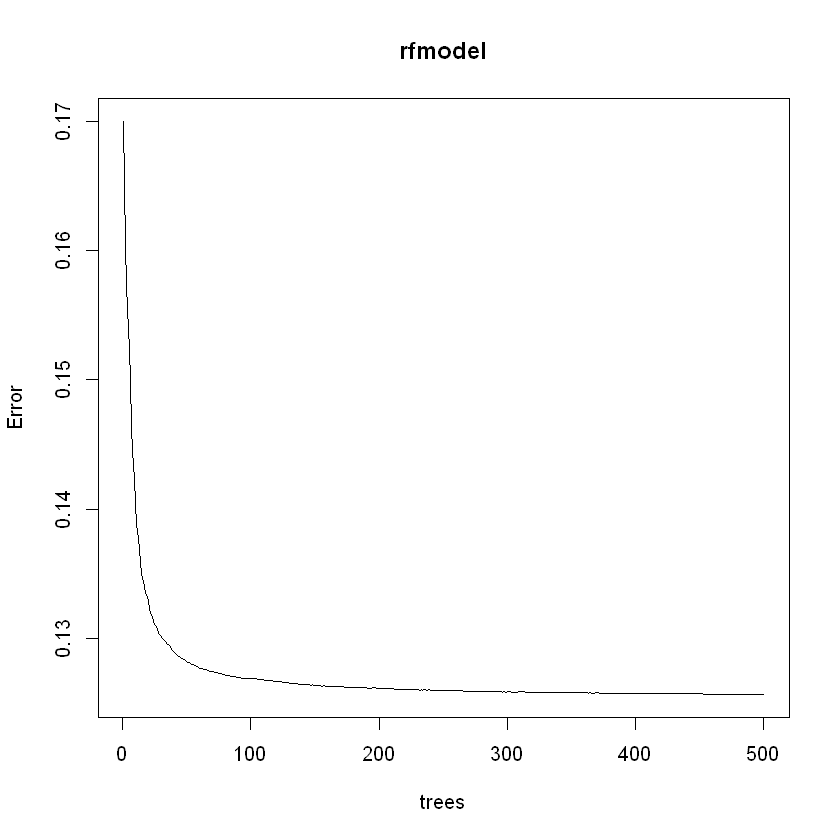

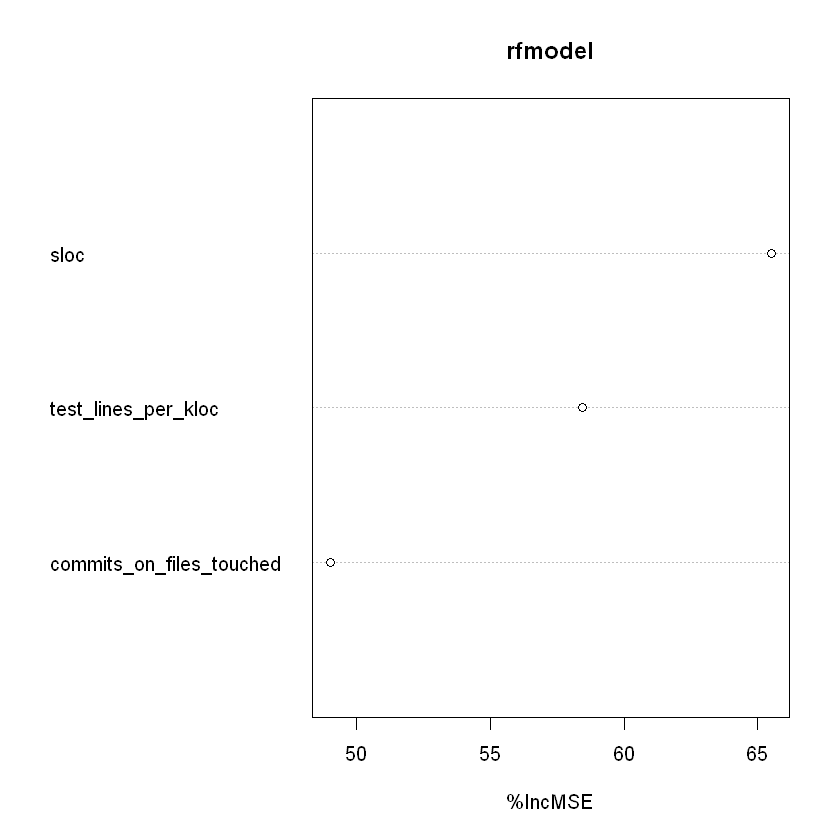

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.608543, ACC 0.539400, PREC 0.886448, REC 0.522701"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.851067"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

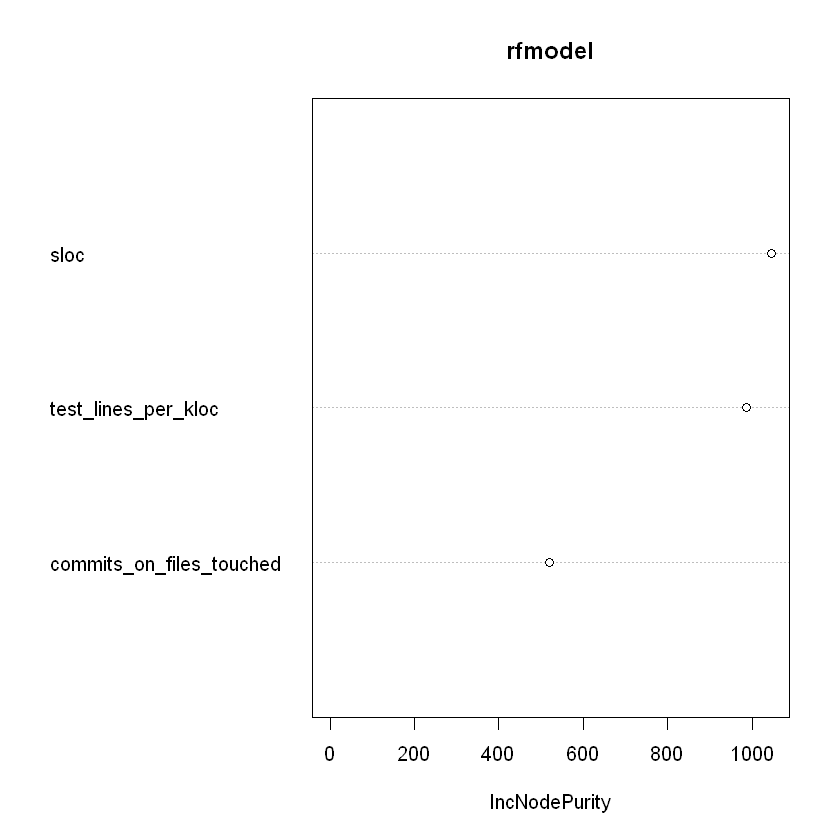


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1245675
                    % Var explained: 1.72
                          %IncMSE IncNodePurity
sloc                     59.91083     1016.0443
test_lines_per_kloc      58.77668      965.5769
commits_on_files_touched 42.96824      521.3287


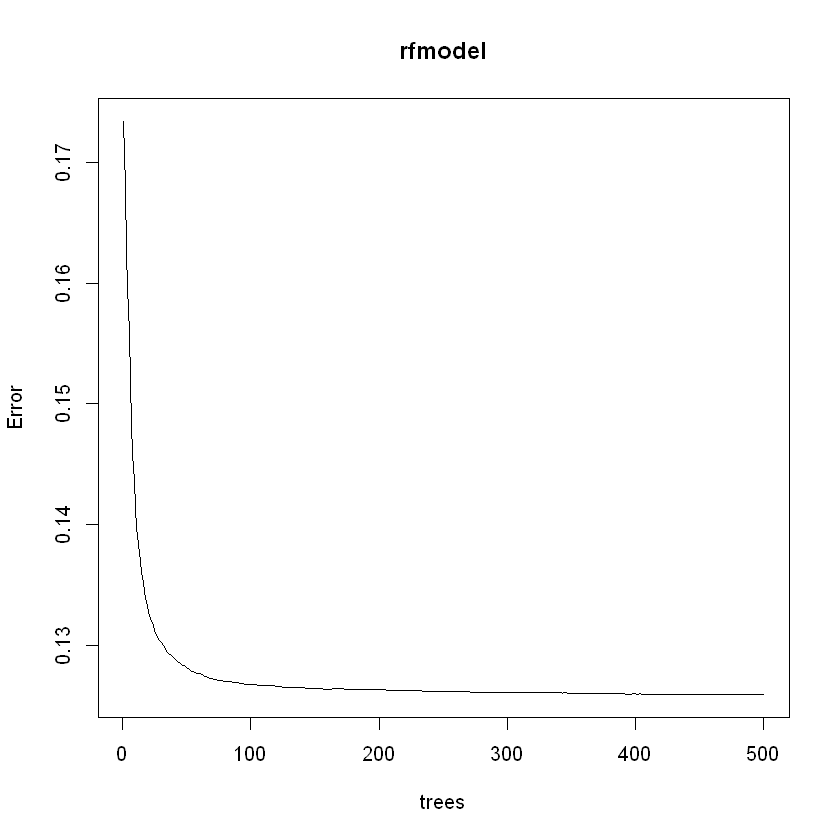

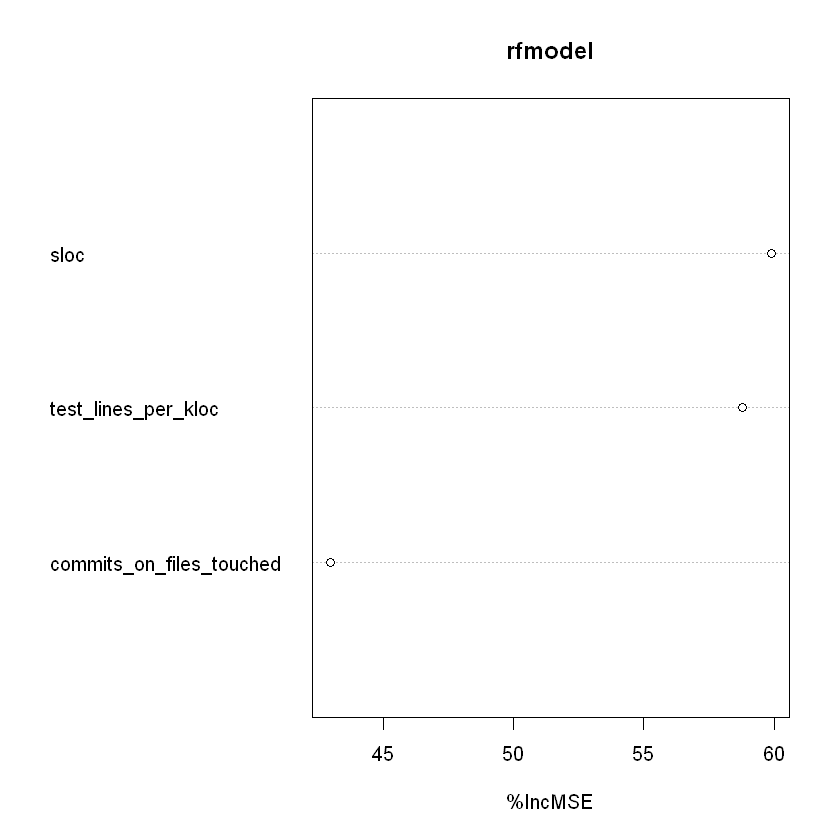

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.589354, ACC 0.526200, PREC 0.881581, REC 0.514286"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.848289"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

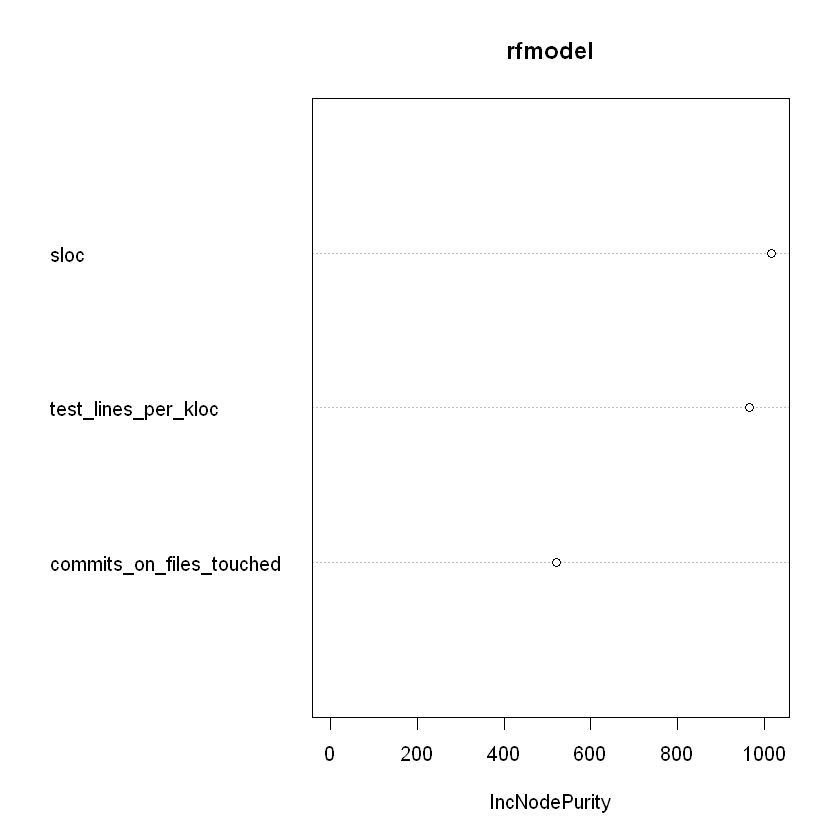


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1262332
                    % Var explained: 1.91
                          %IncMSE IncNodePurity
sloc                     63.56150     1044.3879
test_lines_per_kloc      66.28279      985.3921
commits_on_files_touched 48.93195      525.8223


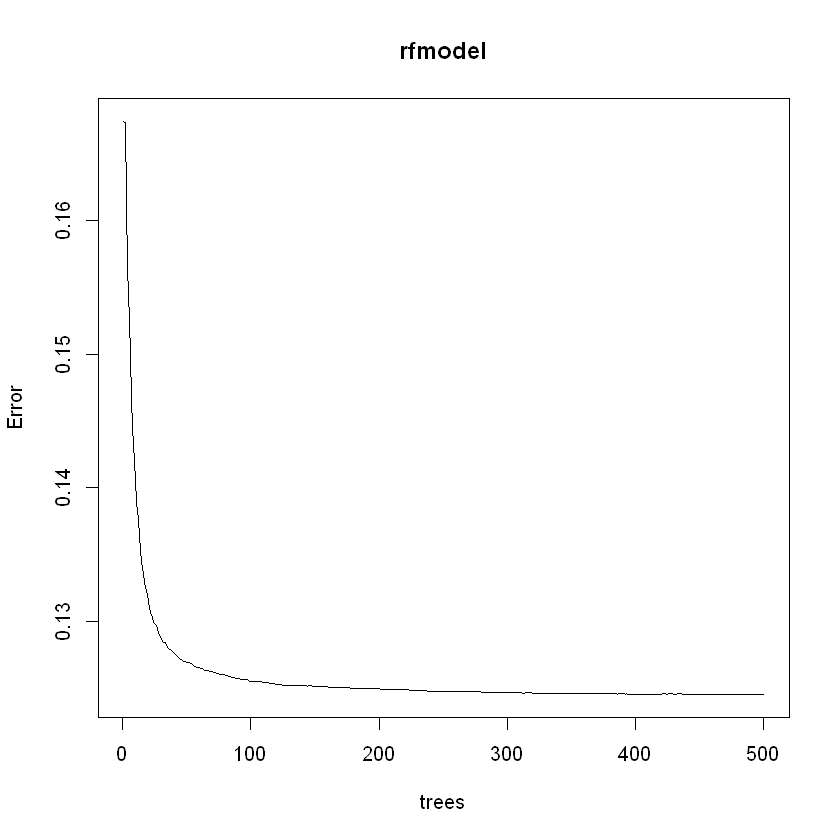

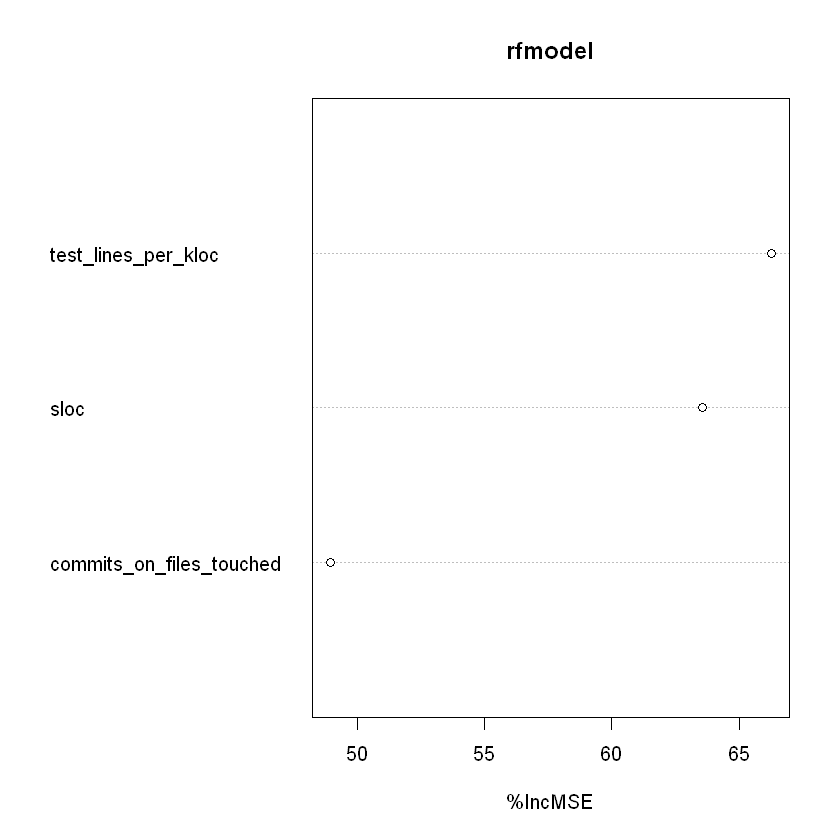

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.612619, ACC 0.536600, PREC 0.894233, REC 0.520653"
[1] "Running cross.val num_samples: 50000, run: 1"
[1] "Prior propability: 0.845711"
[1] "Training"


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

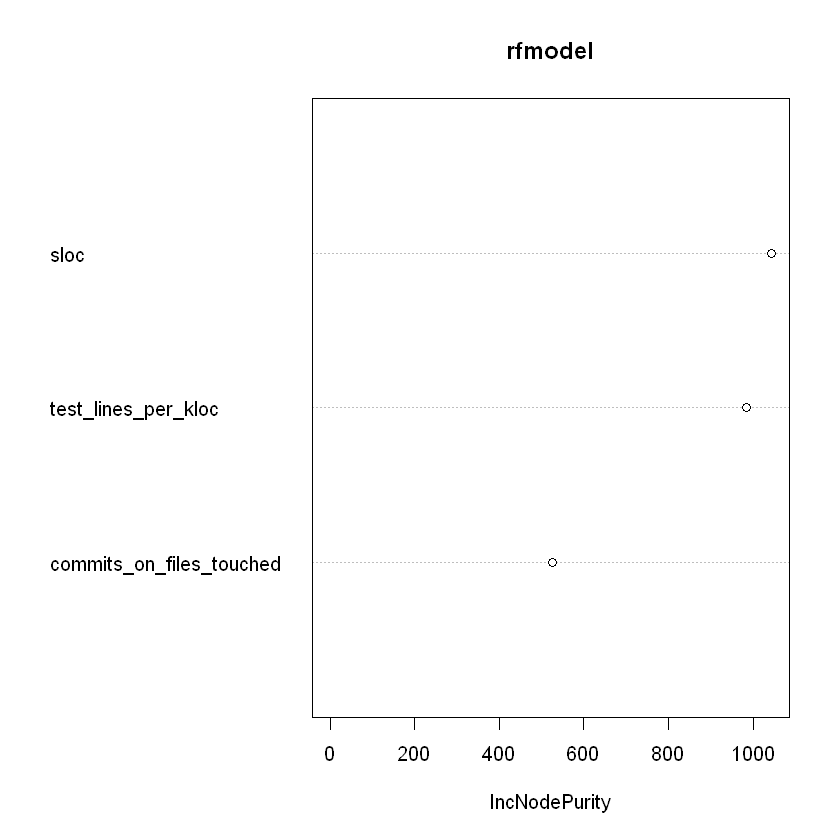


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1279644
                    % Var explained: 1.93
                          %IncMSE IncNodePurity
sloc                     63.87977     1067.3880
test_lines_per_kloc      62.28762     1012.9747
commits_on_files_touched 46.24003      546.4374


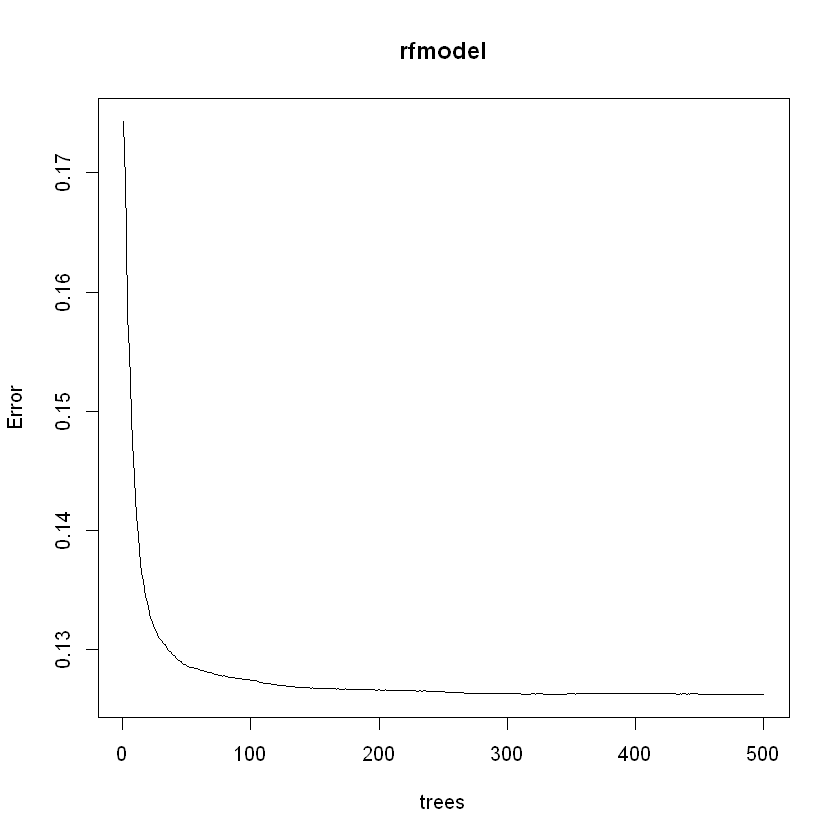

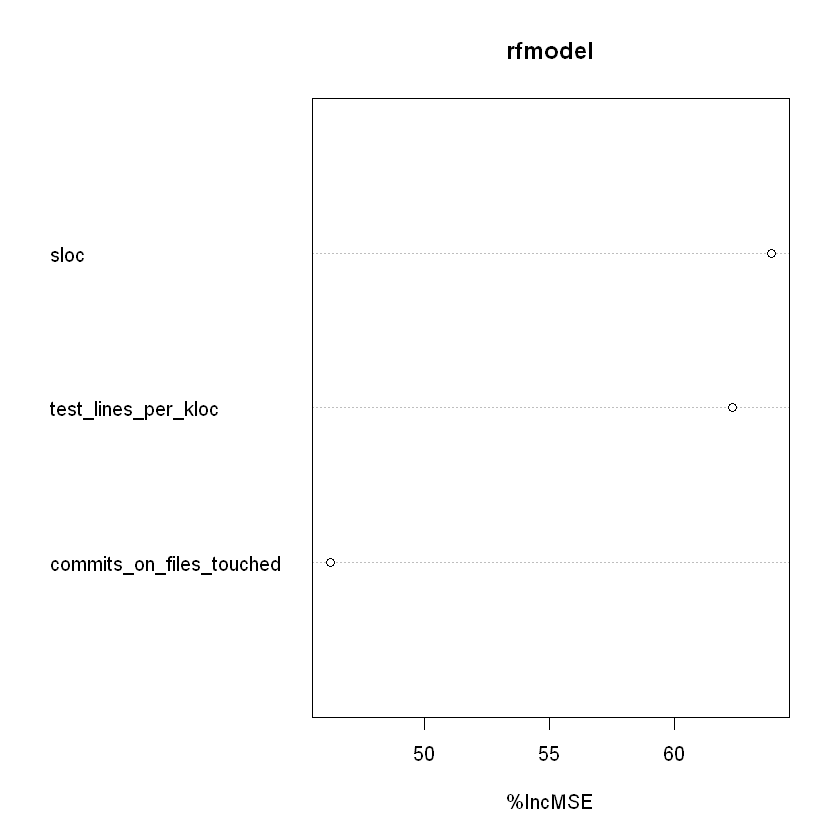

[1] "Predicting"
[1] "Predictions"
[1] "randomforest: AUC 0.600404, ACC 0.532700, PREC 0.884380, REC 0.517756"
[1] "Finished Loop, converting restuls"
[1] "return restuls"
[1] "Outputing Restuls"


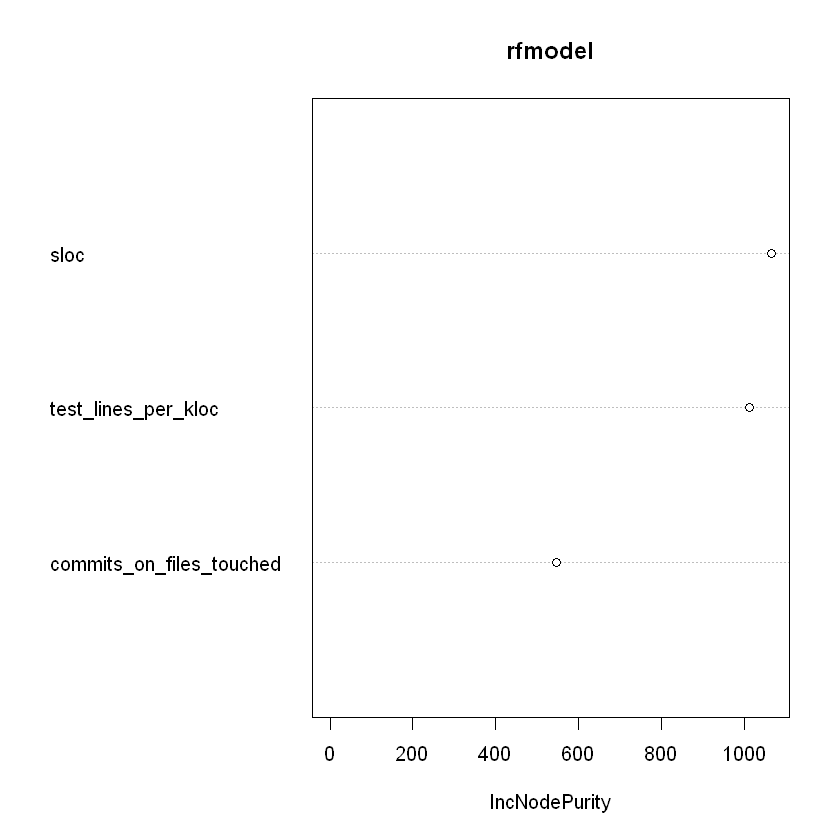

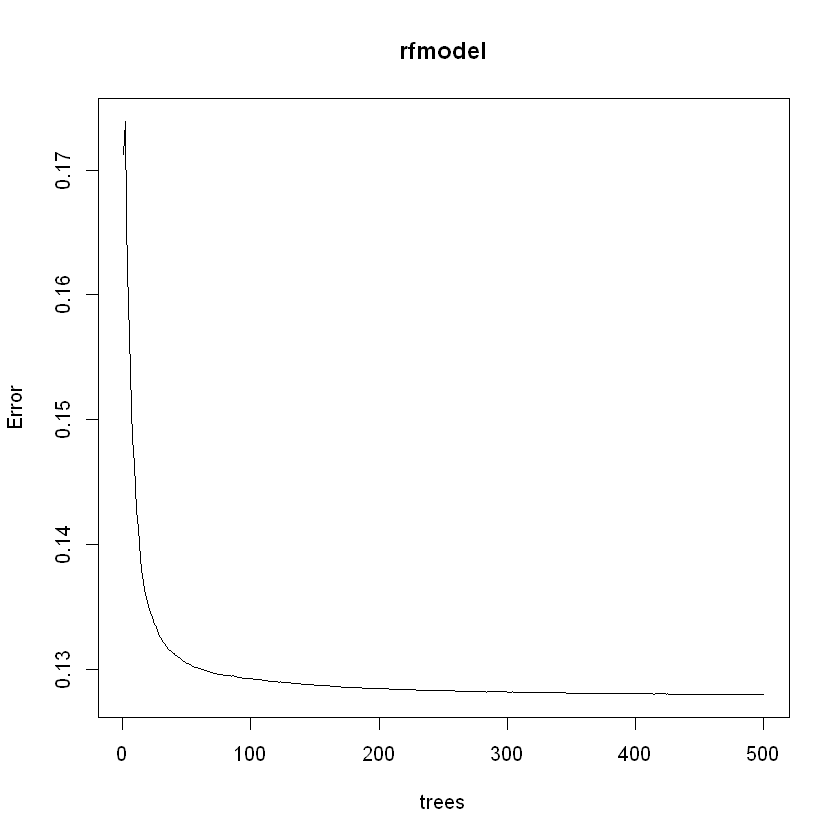

In [17]:
# Redefine the merge decision model with the dominant characteristics and rerun
merge.decision.model = merged ~ sloc + test_lines_per_kloc + commits_on_files_touched
run.mergedecision.classifiers(all, suffix = "-dominant")

# SCRAP

In [158]:
model <- merged ~ team_size + num_commits + files_changed +
  perc_external_contribs + sloc + src_churn + test_churn + num_comments +
  commits_on_files_touched +  test_lines_per_kloc + prev_pullreqs +
  requester_succ_rate + main_team_member + conflict + forward_links

In [179]:
sampleddata <- prepare.data.mergedecision(all, 100)


NULL

In [187]:
train <- na.omit(sampleddata$train)
test <- na.omit(sampleddata$test)

## Random Forest Regression

[1] "Training"


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1838392
                    % Var explained: -10.39
                             %IncMSE IncNodePurity
team_size                -0.08944050    1.19050832
num_commits               3.85385609    0.46538841
files_changed             2.32325076    0.63097772
perc_external_contribs    3.40606354    2.02712560
sloc                      3.22832506    1.74683735
src_churn                 0.58004240    1.22675483
test_churn               -0.27634219    0.26741130
num_comments             -0.66398748    0.58853174
commits_on_files_touched  4.15878601    1.69603175
test_lines_per_kloc      -4.31790795    1.40552518
prev_pullreqs             3.35321030    0.85900118
requester_succ_rate       2.53102098    0.79180537
main_team_member          0.53018743  

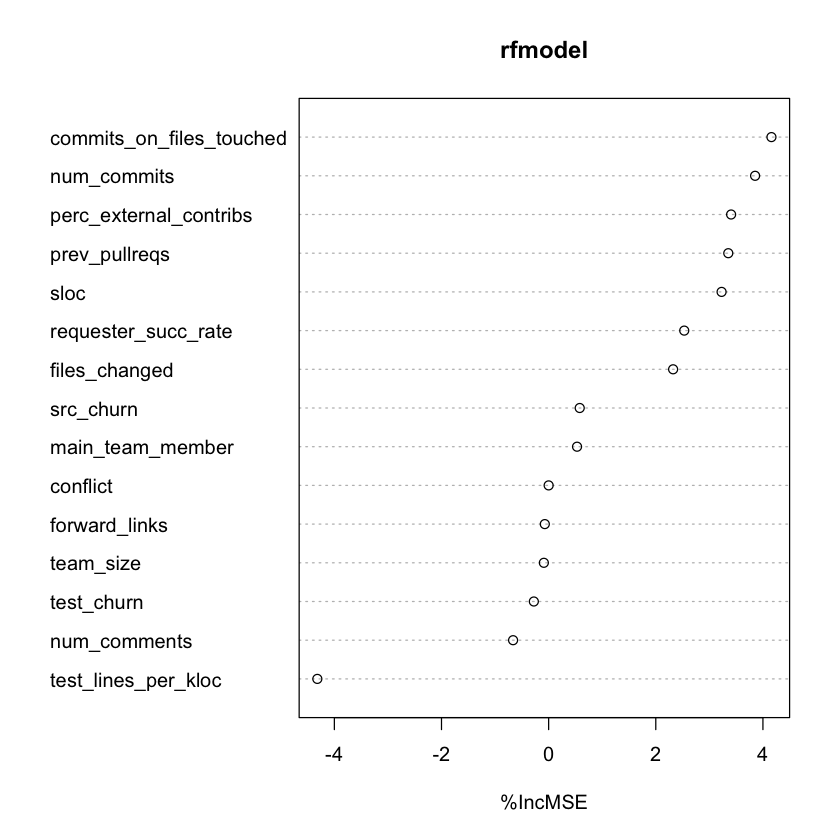

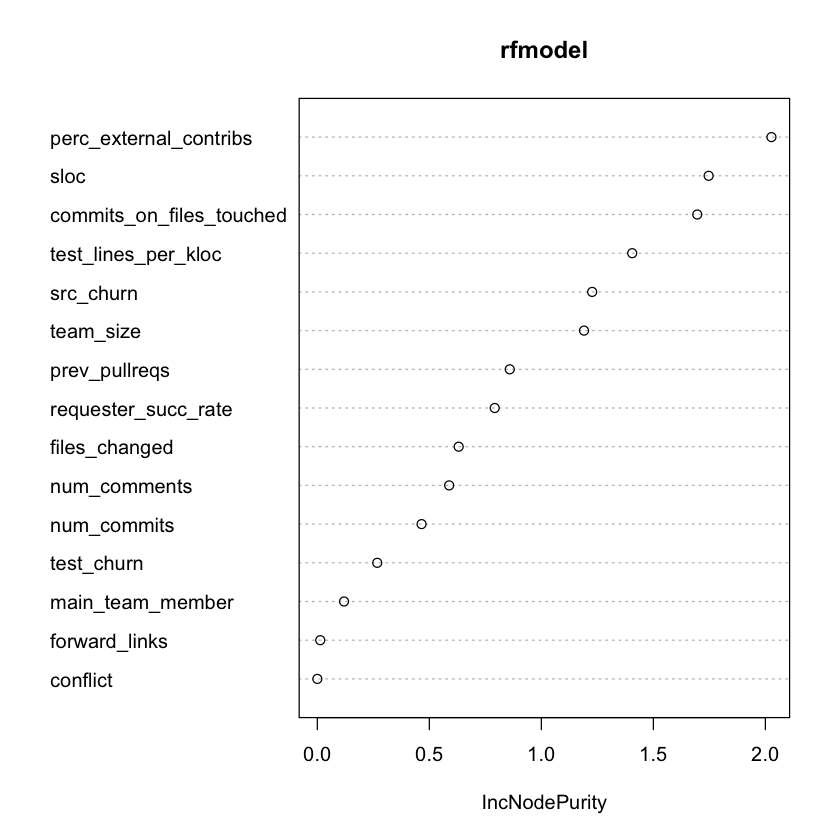

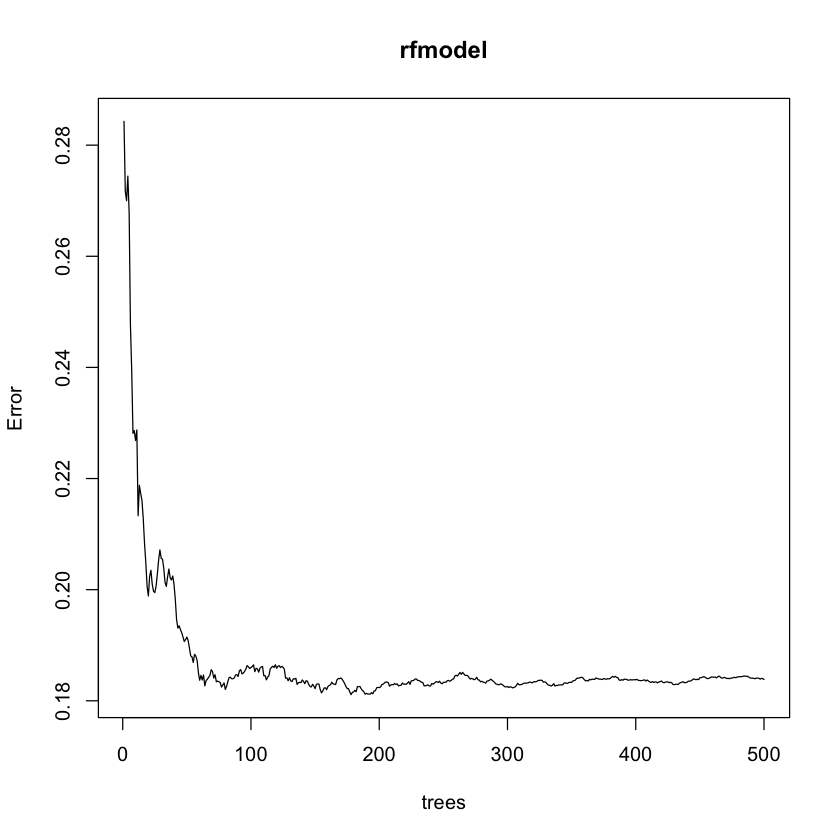

In [188]:
print("Training")
rfmodel <- rf.train(model, train)

In [189]:
print("Preditcing")
predictions <- predict(rfmodel, test)

[1] "Preditcing"


In [209]:
pred.obj <- prediction(predictions, as.numeric(test$merged))

In [205]:
metrics <- classification.perf.metrics("randomforest", pred.obj)

[1] "randomforest: AUC 0.444444, ACC 0.500000, PREC 0.894444, REC 0.444444"


In [207]:
performance(pred.obj, "acc")

An object of class "performance"
Slot "x.name":
[1] "Cutoff"

Slot "y.name":
[1] "Accuracy"

Slot "alpha.name":
[1] "none"

Slot "x.values":
[[1]]
 [1]       Inf 0.9953333 0.9872667 0.9837667 0.9673667 0.9557667 0.9363333
 [8] 0.9281333 0.9112000 0.8992333 0.6764000


Slot "y.values":
[[1]]
 [1] 0.1 0.2 0.3 0.4 0.5 0.4 0.5 0.6 0.7 0.8 0.9


Slot "alpha.values":
list()


In [210]:
performance(pred.obj, "prec", "rec")

An object of class "performance"
Slot "x.name":
[1] "Recall"

Slot "y.name":
[1] "Precision"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
 [1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000 1.0000000


Slot "y.values":
[[1]]
 [1] NaN 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.9


Slot "alpha.values":
[[1]]
 [1]       Inf 0.9646000 0.8809667 0.8746667 0.8737000 0.8729667 0.8693000
 [8] 0.6995667 0.6012333 0.5616333 0.4104000



In [196]:
test$merged

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE

In [208]:
predictions

307736    773660    294334    427943    568911     93505    513699    579104 
0.5616333 0.9646000 0.8737000 0.8809667 0.6995667 0.4104000 0.8729667 0.8693000 
   564100    373410 
0.8746667 0.6012333

In [153]:
testPred <- c(TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE)

In [172]:
testPred2 <- c(
0.987266666666667
,
0.9112
,
0.6764
,
0.967366666666667
,
0.928133333333333
,
0.955766666666667
,
0.995333333333333
,
0.983766666666667
,
0.936333333333333,0.899233333333333)

In [201]:
testPred2

[1] 0.9872667 0.9112000 0.6764000 0.9673667 0.9281333 0.9557667 0.9953333
 [8] 0.9837667 0.9363333 0.8992333

## Binary Logistic Regresion

In [218]:
model <- merged ~ team_size + num_commits + files_changed +
  perc_external_contribs + sloc + src_churn + test_churn + num_comments +
  commits_on_files_touched +  test_lines_per_kloc + prev_pullreqs +
  requester_succ_rate + main_team_member + conflict + forward_links

In [219]:
logmodel <- binlog.train(model, train)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [212]:
## remove incomplete cases
dat <- na.omit(train)
## extract factor columns and drop redundant levels
fctr <- lapply(dat[sapply(dat, is.factor)], droplevels)
## count levels
sapply(fctr, nlevels)

merged_using         conflict    forward_links        requester 
               4                1                2               90 
    intra_branch main_team_member 
               2                2

In [220]:
  binlog <- glm(model, data=train);
  print(summary(binlog))

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [197]:
data(ROCR.simple)

In [198]:
pred <- prediction( ROCR.simple$predictions, ROCR.simple$labels )

In [199]:
ROCR.simple$predictions

[1] 0.612547843 0.364270971 0.432136142 0.140291078 0.384895941 0.244415489
  [7] 0.970641299 0.890172812 0.781781371 0.868751832 0.716680598 0.360168796
 [13] 0.547983407 0.385240464 0.423739359 0.101699993 0.628095575 0.744769966
 [19] 0.657732644 0.490119891 0.072369921 0.172741714 0.105722115 0.890078186
 [25] 0.945548941 0.984667270 0.360180429 0.448687336 0.014823599 0.543533783
 [31] 0.292368449 0.701561487 0.715459280 0.714985914 0.120604738 0.319672178
 [37] 0.911723615 0.757325590 0.090988280 0.529402244 0.257402979 0.589909284
 [43] 0.708412104 0.326672910 0.086546283 0.879459891 0.362693564 0.230157183
 [49] 0.779771989 0.876086217 0.353281048 0.212014560 0.703293499 0.689075677
 [55] 0.627012496 0.240911145 0.402801992 0.134794140 0.120473353 0.665444679
 [61] 0.536339509 0.623494622 0.885179651 0.353777439 0.408939895 0.265686095
 [67] 0.932159806 0.248500489 0.858876675 0.491735594 0.151350957 0.694457482
 [73] 0.496513160 0.123504905 0.499788081 0.310718619 0.907651100 0.340078180
 [79] 0.195097957 0.371936985 0.517308606 0.419560072 0.865639036 0.018527600
 [85] 0.539086009 0.005422562 0.772728821 0.703885141 0.348213542 0.277656869
 [91] 0.458674210 0.059045866 0.133257805 0.083685883 0.531958184 0.429650397
 [97] 0.717845453 0.537091350 0.212404891 0.930846938 0.083048377 0.468610247
[103] 0.393378108 0.663367560 0.349540913 0.194398425 0.844415442 0.959417835
[109] 0.211378771 0.943432189 0.598162949 0.834803976 0.576836208 0.380396459
[115] 0.161874325 0.912325837 0.642933593 0.392173971 0.122284044 0.586857799
[121] 0.180631658 0.085993218 0.700501359 0.060413627 0.531464015 0.084254795
[127] 0.448484671 0.938583020 0.531006532 0.785213140 0.905121019 0.748438143
[133] 0.605235403 0.842974300 0.835981859 0.364288579 0.492596896 0.488179708
[139] 0.259278968 0.991096434 0.757364019 0.288258273 0.773336236 0.040906997
[145] 0.110241034 0.760726142 0.984599159 0.253271061 0.697235328 0.620501132
[151] 0.814586047 0.300973098 0.378092079 0.016694412 0.698826511 0.658692553
[157] 0.470206008 0.501489336 0.239143340 0.050999138 0.088450984 0.107031842
[163] 0.746588080 0.480100183 0.336592126 0.579511087 0.118555284 0.233160827
[169] 0.461150807 0.370549294 0.770178504 0.537336015 0.463227453 0.790240205
[175] 0.883431431 0.745110673 0.007746305 0.012653524 0.868331219 0.439399995
[181] 0.540221346 0.567043171 0.035815400 0.806543942 0.248707470 0.696702150
[187] 0.081439129 0.336315317 0.126480399 0.636728451 0.030235062 0.268138293
[193] 0.983494405 0.728536415 0.739554341 0.522384507 0.858970526 0.383807972
[199] 0.606960209 0.138387070

In [200]:
ROCR.simple$labels 

[1] 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1
 [38] 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 [75] 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1
[112] 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1
[149] 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0
[186] 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0

In [13]:
data.frame(classifier = rep(NA, 3), auc = rep(0, 3), acc = rep(0,3),
                       prec = rep(0, 3), rec = rep(0, 3), stringsAsFactors=FALSE)

classifier,auc,acc,prec,rec
NA,0,0,0,0
NA,0,0,0,0
NA,0,0,0,0


In [12]:
sampleddata$test

,mergetime_minutes,merged_using,conflict,forward_links,team_size,num_commits,num_comments,files_changed,perc_external_contribs,sloc,⋯,test_cases_per_kloc,asserts_per_kloc,stars,requester,prev_pullreqs,requester_succ_rate,followers,intra_branch,main_team_member,merged
140549,25,github,false,false,33,1,0,2,0.2326007,36028,⋯,24.5364716,75.3858110,414,nouiz,197,0.9746193,32,false,true,TRUE
496496,1,github,false,false,9,1,1,1,0.7777778,437,⋯,22.8832952,485.1258581,7,zzen,2,1.0000000,46,false,false,TRUE
897042,0,github,false,false,12,2,0,40,0.4447761,179527,⋯,0.1893866,0.3007904,1,sagara-gunathunga,0,0.0000000,1,true,true,TRUE
326567,119,github,false,false,29,1,0,1,0.3775510,13518,⋯,1.7754106,13.1676283,2240,nikicat,0,0.0000000,20,false,false,TRUE
557486,9117,commits_in_master,false,false,5,1,4,4,0.6594203,998,⋯,0.0000000,333.6673347,1,vladikoff,19,1.0000000,574,false,true,TRUE
101525,24,github,false,false,2,1,0,4,0.7647059,475,⋯,0.0000000,157.8947368,765,azakus,7,1.0000000,222,true,true,TRUE
688113,92,commits_in_master,false,false,10,1,1,1,0.1082750,10239,⋯,143.5687079,276.5895107,44,kivattik,15,0.8666667,2,true,true,TRUE
276815,34,commits_in_master,false,false,7,1,3,1,0.2203390,15436,⋯,22.7390516,55.1956465,18,tmtmtmtm,9,1.0000000,45,true,true,TRUE
462150,25,commits_in_master,false,false,5,2,3,1,0.7014925,8908,⋯,0.3367759,0.4490346,44,haliphax,53,0.8867925,12,false,true,TRUE
412082,146902,merged_in_comments,false,true,10,2,1,8,0.6500000,5833,⋯,38.0593177,132.1789817,567,MichaelAllenMiller,0,0.0000000,4,false,false,TRUE


In [40]:
subset(sampleddata$train, select=c("merged", "forward_links"))

ERROR: Error in `[.data.frame`(x, r, vars, drop = drop): undefined columns selected


In [47]:
ncol(all)

[1] 76

In [62]:
subset(all, select=c('lifetime_minutes', 'mergetime_minutes', 'merged_using', 'conflict',
       'forward_links', 'team_size', 'num_commits', 'num_comments',
       'files_changed', 'perc_external_contribs', 'sloc', 'src_churn',
       'test_churn', 'commits_on_files_touched', 'test_lines_per_kloc',
       'test_cases_per_kloc', 'asserts_per_kloc', 'stars', 'requester',
       'prev_pullreqs', 'requester_succ_rate', 'followers', 'intra_branch',
       'main_team_member', 'merged'))

lifetime_minutes,mergetime_minutes,merged_using,conflict,forward_links,team_size,num_commits,num_comments,files_changed,perc_external_contribs,⋯,test_cases_per_kloc,asserts_per_kloc,stars,requester,prev_pullreqs,requester_succ_rate,followers,intra_branch,main_team_member,merged
125,125,commits_in_master,false,false,2,4,0,6,0.1872510,⋯,0.0000000,0.0000000,9,0xc0170,19,0.9473684,43,true,true,TRUE
0,0,commits_in_master,false,false,2,1,0,1,0.1821862,⋯,0.0000000,0.0000000,9,0xc0170,18,0.9444444,43,true,true,TRUE
4517,4517,commits_in_master,false,false,2,2,2,1,0.1762295,⋯,0.0000000,0.0000000,9,0xc0170,17,0.9411765,43,true,true,TRUE
1,1,commits_in_master,false,false,2,1,0,1,0.1645570,⋯,0.0000000,0.0000000,9,0xc0170,16,0.9375000,43,true,true,TRUE
1769,NA,unknown,false,false,2,3,4,2,0.1659574,⋯,0.0000000,0.0000000,9,0xc0170,15,1.0000000,43,true,true,FALSE
1281,1281,commits_in_master,false,false,2,3,1,3,0.1608696,⋯,0.0000000,0.0000000,9,0xc0170,14,1.0000000,42,true,true,TRUE
2312,2312,commits_in_master,false,false,2,1,0,4,0.1615721,⋯,0.0000000,0.0000000,9,0xc0170,13,1.0000000,42,true,true,TRUE
23,23,commits_in_master,false,false,2,1,0,4,0.1396396,⋯,0.0000000,0.0000000,9,0xc0170,12,1.0000000,42,true,true,TRUE
976,976,commits_in_master,false,false,2,1,0,2,0.1363636,⋯,0.0000000,0.0000000,9,sg-,8,0.8750000,15,false,false,TRUE
31,31,commits_in_master,false,false,2,1,0,1,0.1330275,⋯,0.0000000,0.0000000,9,sg-,7,0.8571429,15,false,false,TRUE


In [61]:
subset(all, select=c('stars'))

stars
9
9
9
9
9
9
9
9
9
9
